First i will work with table and clean it to make working with it easier

In [2]:
import pandas as pd 
df = pd.read_csv("dataseet.csv")

for col in df.columns:
    print(f"\n {col}:")
    print(df[col].unique())


 id:
[     2      8     26 ... 140689 140690 140699]

 Gender:
['Male' 'Female']

 Age:
[33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]

 City:
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']

 Profession:
['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']

 Academic Pressure:
[5. 2. 3. 4. 1. 0.]

 

In [3]:
df.isnull().sum()
# to check where we have space 

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [4]:
df = df.dropna(subset=["Financial Stress"])
# drop this three rows

In [5]:
df["Financial Stress"].isnull().sum()
# checking the result

np.int64(0)

In [6]:
# encoding text data
df_encoded = df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':  
        unique_vals, labels = pd.factorize(df_encoded[col])
        mapping = dict(enumerate(labels))  
        print(f"{col}:")
        for k, v in mapping.items():
            print(f"   {v} → {k}")
        print() 
        df_encoded[col] = unique_vals 


Gender:
   Male → 0
   Female → 1

City:
   Visakhapatnam → 0
   Bangalore → 1
   Srinagar → 2
   Varanasi → 3
   Jaipur → 4
   Pune → 5
   Thane → 6
   Chennai → 7
   Nagpur → 8
   Nashik → 9
   Vadodara → 10
   Kalyan → 11
   Rajkot → 12
   Ahmedabad → 13
   Kolkata → 14
   Mumbai → 15
   Lucknow → 16
   Indore → 17
   Surat → 18
   Ludhiana → 19
   Bhopal → 20
   Meerut → 21
   Agra → 22
   Ghaziabad → 23
   Hyderabad → 24
   Vasai-Virar → 25
   Kanpur → 26
   Patna → 27
   Faridabad → 28
   Delhi → 29
   Saanvi → 30
   M.Tech → 31
   Bhavna → 32
   Less Delhi → 33
   City → 34
   3.0 → 35
   Less than 5 Kalyan → 36
   Mira → 37
   Harsha → 38
   Vaanya → 39
   Gaurav → 40
   Harsh → 41
   Reyansh → 42
   Kibara → 43
   Rashi → 44
   ME → 45
   M.Com → 46
   Nalyan → 47
   Mihir → 48
   Nalini → 49
   Nandini → 50
   Khaziabad → 51

Profession:
   Student → 0
   Civil Engineer → 1
   Architect → 2
   UX/UI Designer → 3
   Digital Marketer → 4
   Content Writer → 5
   Educational Con

<Figure size 1400x1000 with 0 Axes>

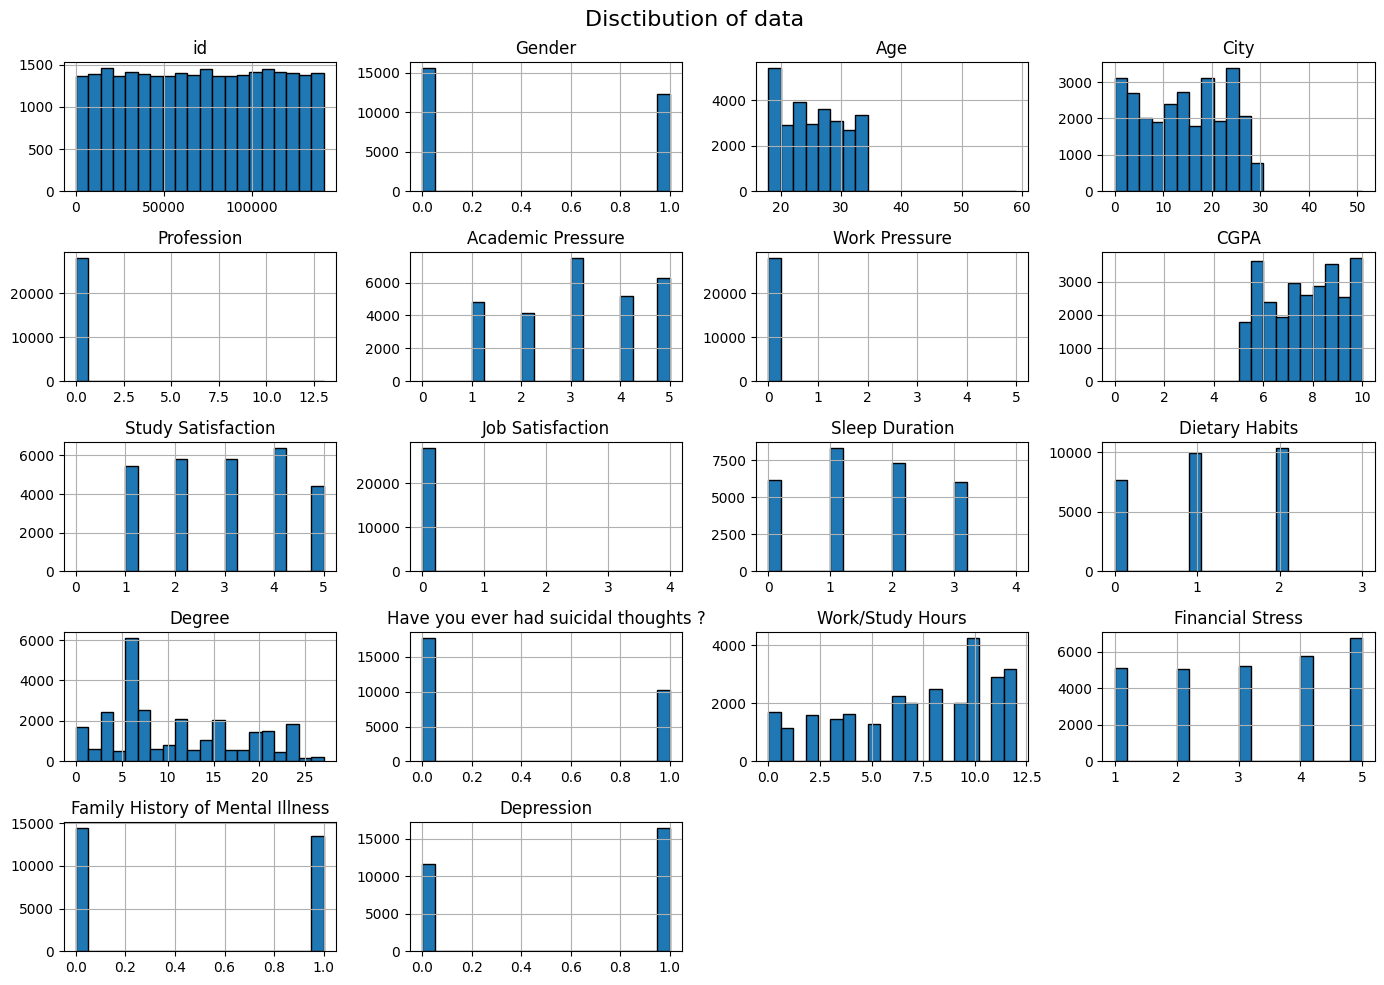

In [7]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(14, 10))
df_encoded.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle("Disctibution of data", fontsize=16)
plt.tight_layout()
plt.show()

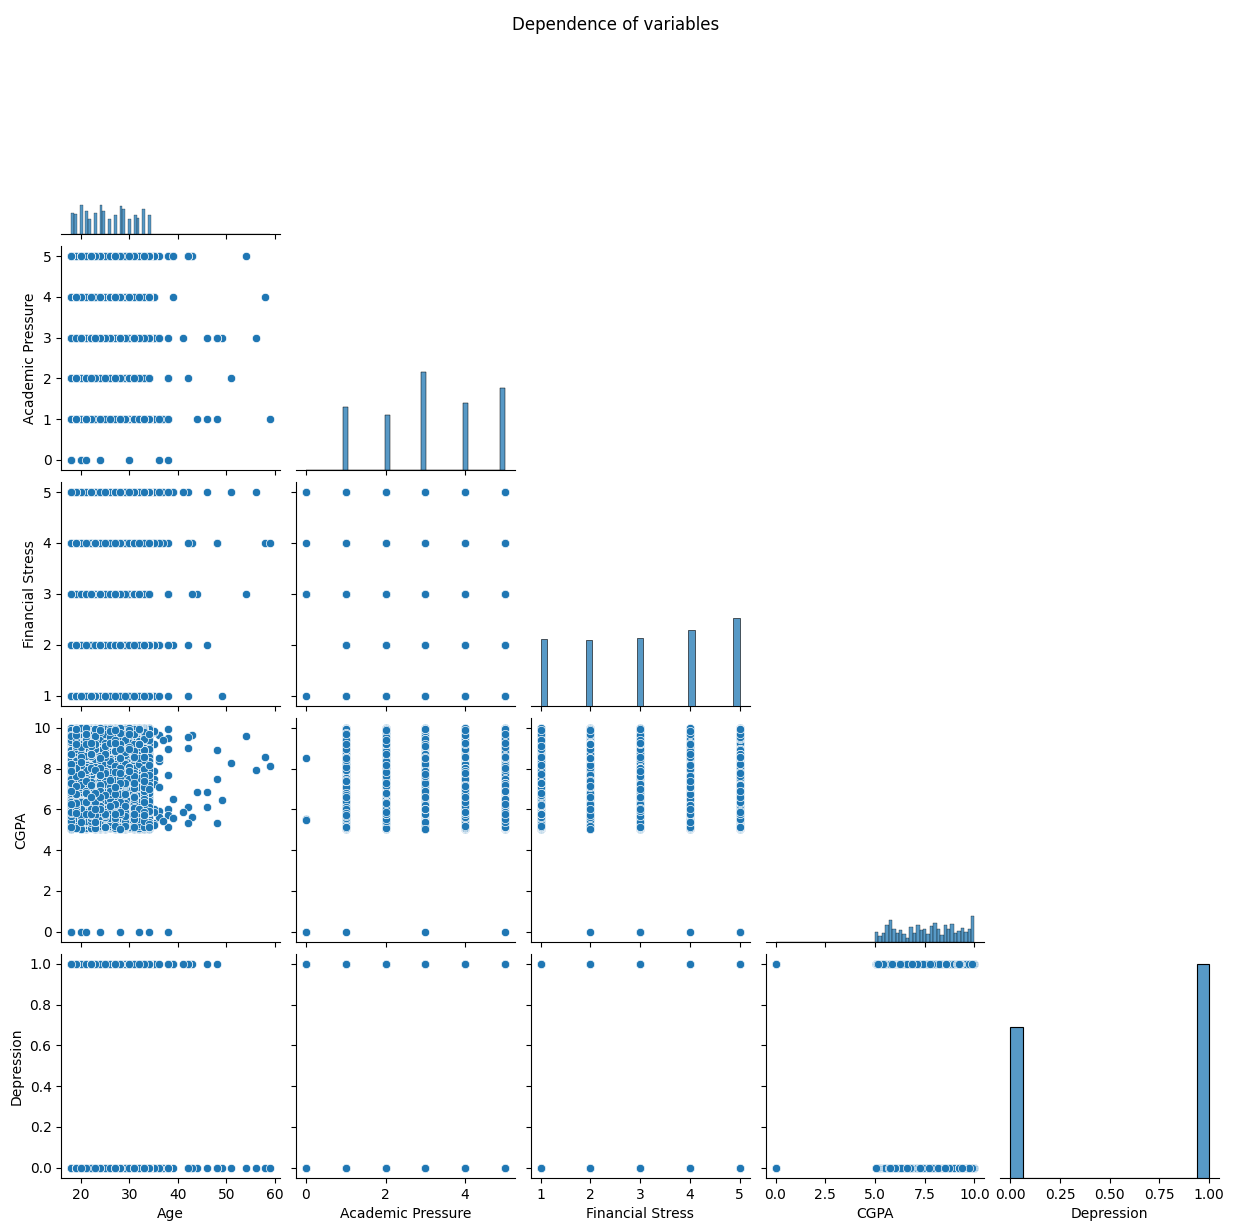

In [8]:
import seaborn as sns
cols = ["Age", "Academic Pressure", "Financial Stress", "CGPA", "Depression"]
sns.pairplot(df_encoded[cols] , diag_kind="hist",corner=True)
plt.suptitle("Dependence of variables")
plt.show()

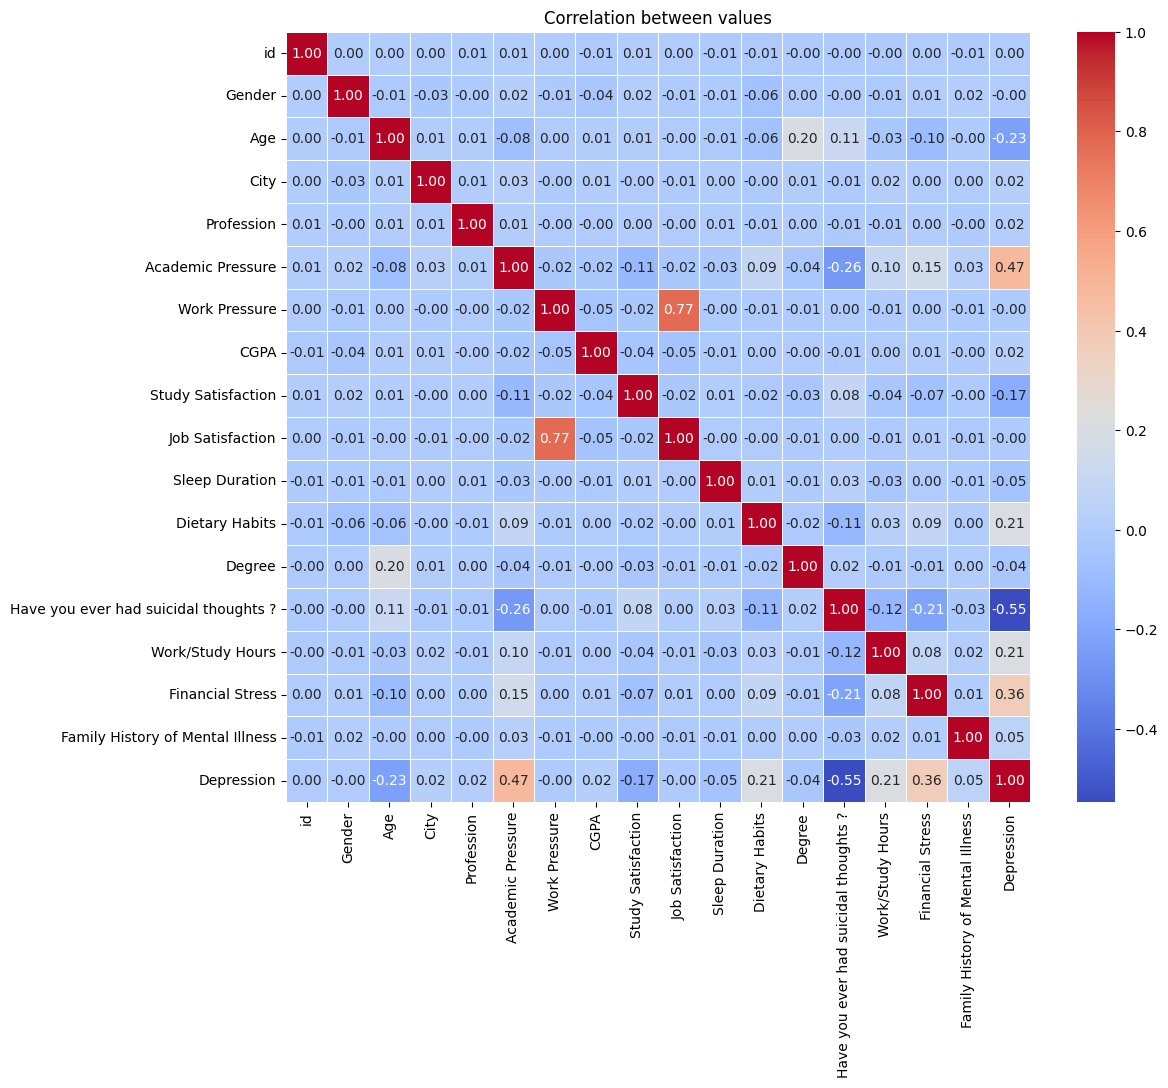

In [9]:
plt.figure(figsize=(12,10))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix,cmap= "coolwarm",annot=True,fmt=".2f",linewidths=0.5)
plt.title("Correlation between values")
plt.show()

In [10]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

X_raw = df.drop(columns=['id', 'Depression']).copy()

numeric_cols = X_raw.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_raw.select_dtypes(include=['object']).columns
X_ohe = pd.get_dummies(X_raw, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
X_ohe[numeric_cols] = scaler.fit_transform(X_ohe[numeric_cols])

y = df['Depression'].astype(int).values
X_train, X_test, y_train, y_test = train_test_split(
    X_ohe, y, test_size=0.3, random_state=42
)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train = scaler.fit_transform(X_train.values)
X_test  = scaler.transform(X_test.values)

class LogisticRegression:
    def __init__(self,learning_rate=0.00001,n_iter = 1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
    
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self,X,y):
        y = y.reshape(-1,1)
        m,n = X.shape
        self.weights = np.zeros((n,1))
        self.bias = 0
        for i in range(self.n_iter):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            
            error = y_pred - y

            dw = (1/m) * np.dot(X.T, error)
            db = (1/m) * np.sum(error)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict_prob(self,X):
        return self.sigmoid(np.dot(X,self.weights) + self.bias )
    
    def predict(self,X,threshold = 0.5):
        return (self.predict_prob(X) >= threshold).astype(int)
    
    def coefficients(self):
        return self.weights,self.bias
    
model = LogisticRegression(learning_rate=0.01,n_iter=5000)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test,y_pred)
print(acc)
weights,bias = model.coefficients()
print("Bias:",bias)
print("Weighs(w):",weights)


0.8469534050179212
Bias: 0.5899763319153121
Weighs(w): [[-5.39686300e-01]
 [ 1.13794752e+00]
 [ 2.08808167e-02]
 [ 8.59595706e-02]
 [-3.09437479e-01]
 [ 2.74348574e-03]
 [ 4.01582814e-01]
 [ 7.56408386e-01]
 [-1.65393766e-03]
 [-5.03887865e-02]
 [ 5.17571983e-02]
 [-1.59759720e-03]
 [ 9.84160935e-03]
 [ 2.17837547e-02]
 [-2.89193434e-02]
 [ 3.78140695e-02]
 [ 1.74072050e-02]
 [ 1.46724219e-02]
 [ 9.24794424e-03]
 [-1.63593914e-04]
 [ 7.75632894e-03]
 [-1.86762003e-02]
 [ 6.74646622e-02]
 [-8.56656498e-03]
 [-4.98896085e-02]
 [ 7.10835108e-03]
 [ 9.02595108e-04]
 [ 0.00000000e+00]
 [-3.40325572e-02]
 [ 3.14303776e-02]
 [-1.18263320e-02]
 [-9.79284310e-03]
 [-2.43707511e-02]
 [ 3.15053399e-03]
 [ 0.00000000e+00]
 [-1.40592248e-02]
 [-2.35508350e-02]
 [ 3.82910963e-02]
 [ 1.77500060e-02]
 [ 1.71349888e-02]
 [-3.84116946e-02]
 [-5.03622787e-02]
 [ 7.24610944e-03]
 [-3.63391297e-02]
 [ 0.00000000e+00]
 [ 3.69413957e-03]
 [ 1.75184651e-02]
 [-2.58144728e-02]
 [ 1.06183866e-02]
 [ 0.00000000e

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")


Precision: 0.851
Recall: 0.894
F1-score: 0.872


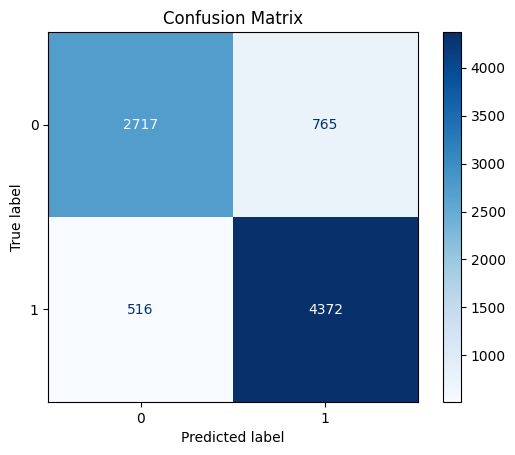

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


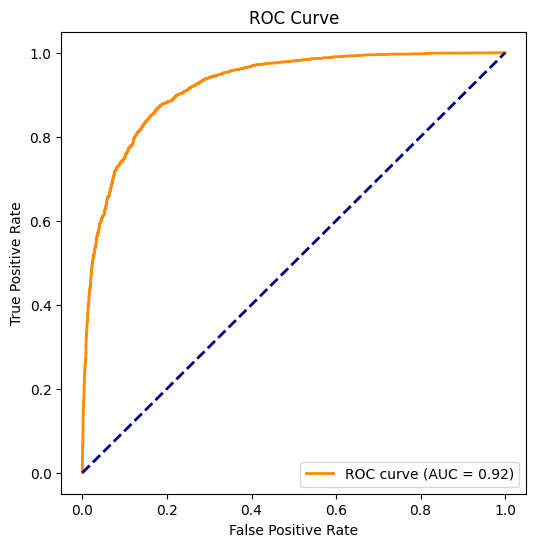

In [13]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_prob(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


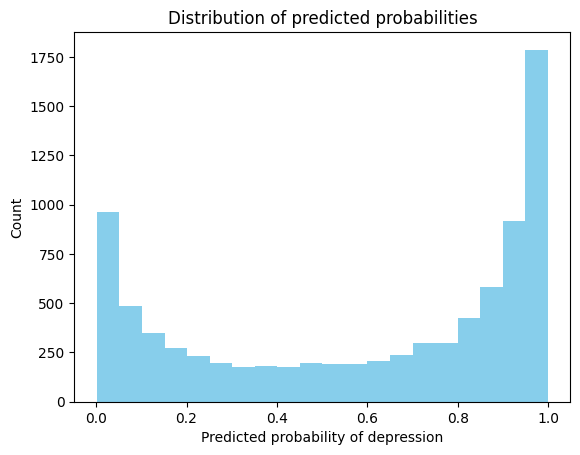

In [14]:
plt.hist(model.predict_prob(X_test), bins=20, color='skyblue')
plt.title("Distribution of predicted probabilities")
plt.xlabel("Predicted probability of depression")
plt.ylabel("Count")
plt.show()


PART2

Task 1
When we change the classification threshold in logistic regression, we affect the balance between precision and recall:
Low threshold (< 0.5) 
-Predict more positives  
-Recall ↑, Precision ↓

High threshold (> 0.5)
-Predict fewer positives  
-Recall ↓, Precision ↑

You can choose a threshold other than 0.5 when:
-False negatives are more costly than false positives
-You want maximum recall (medical, fraud detection)
-You want maximum precision (expensive action based on positive prediction)


In [ ]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver="lbfgs")
model.fit(X_train, y_train)

print("Classes:", model.classes_)
print("predict_proba shape:", model.predict_proba(X_test).shape)


proba = model.predict_proba(X_test)
positive_class_index = list(model.classes_).index(1)
y_proba = proba[:, positive_class_index]

y_proba[:10]


Model trained successfully!
Classes: [0 1]
predict_proba shape: (8370, 2)


array([0.74842275, 0.95610593, 0.89145699, 0.99582237, 0.583714  ,
       0.79454945, 0.02964534, 0.20199262, 0.0386535 , 0.7392236 ])

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

thresholds = np.arange(0, 1.01, 0.01)

TP_list = []
FP_list = []
TN_list = []
FN_list = []

for thr in thresholds:
    y_pred_thr = (y_proba >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thr).ravel()
    
    TP_list.append(tp)
    FP_list.append(fp)
    TN_list.append(tn)
    FN_list.append(fn)

TP_list[:5], FP_list[:5], TN_list[:5], FN_list[:5]

([np.int64(4888),
  np.int64(4886),
  np.int64(4883),
  np.int64(4876),
  np.int64(4871)],
 [np.int64(3482),
  np.int64(3295),
  np.int64(3051),
  np.int64(2828),
  np.int64(2638)],
 [np.int64(0), np.int64(187), np.int64(431), np.int64(654), np.int64(844)],
 [np.int64(0), np.int64(2), np.int64(5), np.int64(12), np.int64(17)])

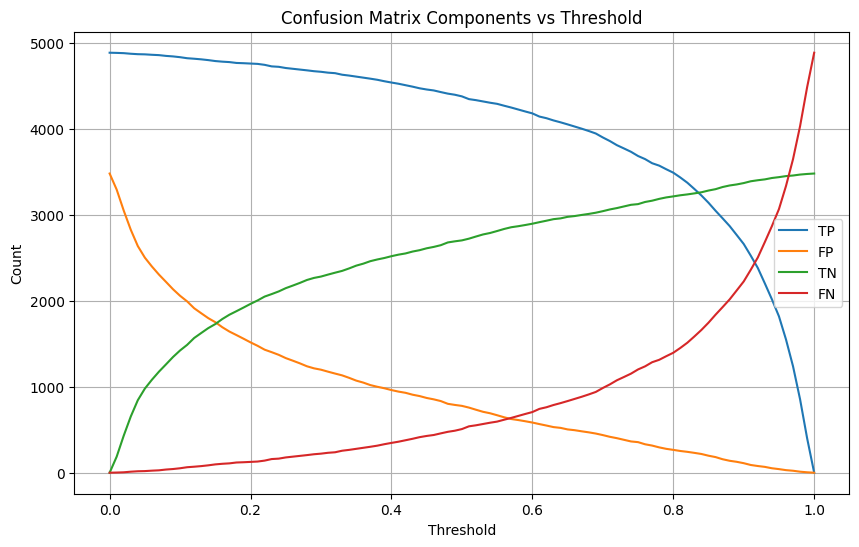

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(thresholds, TP_list, label="TP")
plt.plot(thresholds, FP_list, label="FP")
plt.plot(thresholds, TN_list, label="TN")
plt.plot(thresholds, FN_list, label="FN")

plt.xlabel("Threshold")
plt.ylabel("Count")
plt.title("Confusion Matrix Components vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


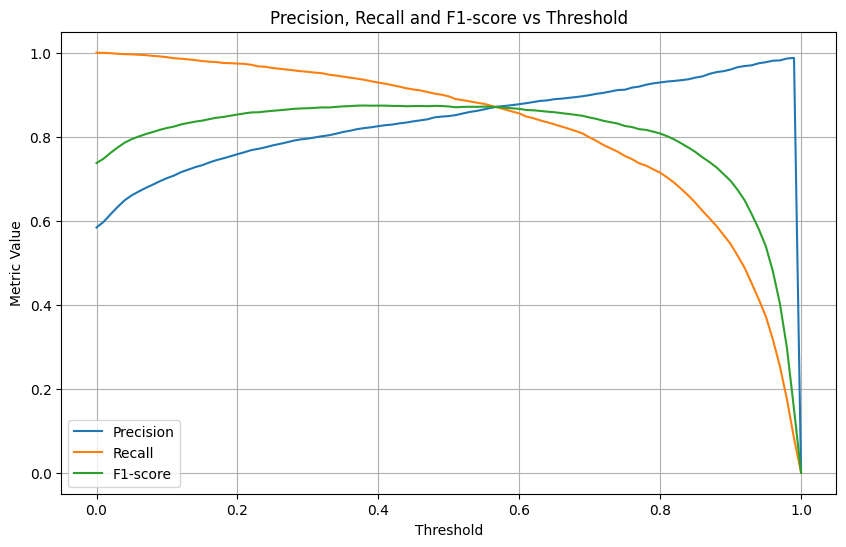

In [27]:
precision_values = []
recall_values = []
f1_values = []

for thr in thresholds:
    y_pred_thr = (y_proba >= thr).astype(int)
    precision_values.append(precision_score(y_test, y_pred_thr, zero_division=0))
    recall_values.append(recall_score(y_test, y_pred_thr, zero_division=0))
    f1_values.append(f1_score(y_test, y_pred_thr, zero_division=0))

plt.figure(figsize=(10,6))
plt.plot(thresholds, precision_values, label="Precision")
plt.plot(thresholds, recall_values, label="Recall")
plt.plot(thresholds, f1_values, label="F1-score")

plt.xlabel("Threshold")
plt.ylabel("Metric Value")
plt.title("Precision, Recall and F1-score vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
best_threshold_f1 = thresholds[np.argmax(f1_values)]
best_threshold_f1


np.float64(0.38)

Task2
Task 2 

We introduce financial costs for each outcome:

-True Positive (TP) = $500
Student is depressed, model detects it, and hospital visit is paid.

-False Positive (FP) = $1000 
Model sends a healthy student for hospital evaluation unnecessarily.

-True Negative (TN) = $0
  Model correctly identifies a healthy student — no cost.

-False Negative (FN) = $5000
Model misses a depressed student — highest risk and cost.

The goal is to compute the total cost at each threshold and find the threshold that minimizes financial loss.


In [29]:
TP_COST = 500
FP_COST = 1000
TN_COST = 0
FN_COST = 5000

total_costs = []

for tp, fp, tn, fn in zip(TP_list, FP_list, TN_list, FN_list):
    total = (
        tp * TP_COST +
        fp * FP_COST +
        tn * TN_COST +
        fn * FN_COST
    )
    total_costs.append(total)

total_costs[:10]


[np.int64(5926000),
 np.int64(5748000),
 np.int64(5517500),
 np.int64(5326000),
 np.int64(5158500),
 np.int64(5032500),
 np.int64(4952000),
 np.int64(4876000),
 np.int64(4831500),
 np.int64(4772500)]

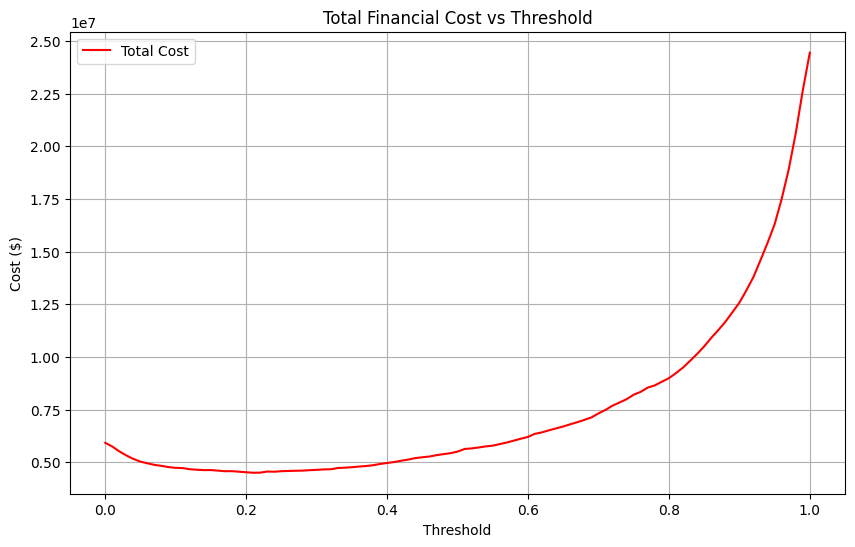

In [30]:
plt.figure(figsize=(10,6))
plt.plot(thresholds, total_costs, color="red", label="Total Cost")
plt.xlabel("Threshold")
plt.ylabel("Cost ($)")
plt.title("Total Financial Cost vs Threshold")
plt.grid(True)
plt.legend()
plt.show()


In [31]:
optimal_cost_threshold = thresholds[np.argmin(total_costs)]
optimal_cost_threshold


np.float64(0.21)

Task 3 

Logistic Regression has several important hyperparameters:

-C — inverse regularization strength.  
Higher C → weaker regularization.  
Lower C → stronger regularization.

-penalty — type of regularization:
L1 (sparse coefficients, feature selection)
L2 (smooth shrinking of weights)

-solver— optimization algorithm:
- `liblinear` (supports L1 & L2, good for small datasets)
- `saga` (supports L1 & L2, scalable)
- `lbfgs` (L2 only, fast & stable)

- max_iter — maximum number of iterations to ensure convergence.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
    "max_iter": [1000]
}

grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [33]:
grid.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [34]:
print("Best parameters:", grid.best_params_)
print("Best F1 score:", grid.best_score_)


Best parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Best F1 score: 0.8732247607098118


In [35]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

print("Optimized model:", best_model)


Optimized model: LogisticRegression(C=0.01, max_iter=1000, solver='saga')


In [36]:
from sklearn.metrics import classification_report

y_pred_best = best_model.predict(X_test)

print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.84      0.78      0.81      3482
           1       0.85      0.90      0.87      4888

    accuracy                           0.85      8370
   macro avg       0.85      0.84      0.84      8370
weighted avg       0.85      0.85      0.85      8370



Task4

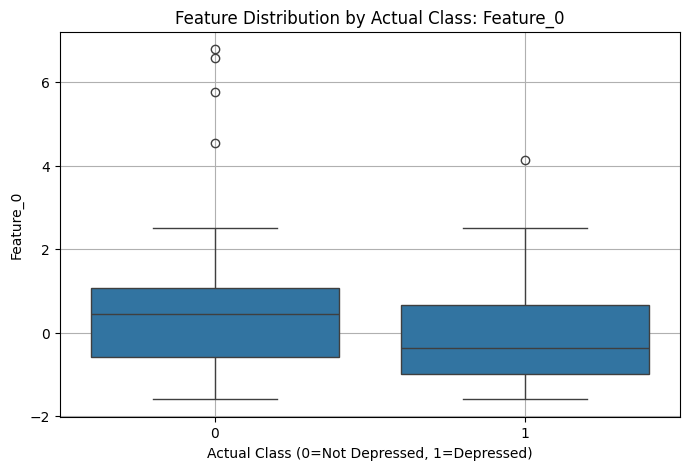

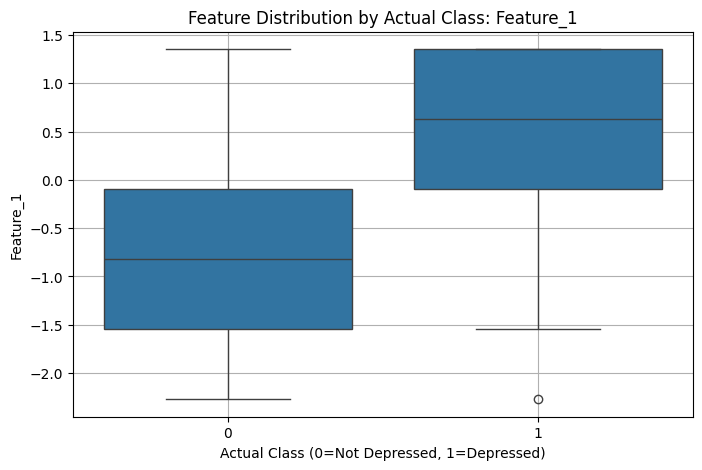

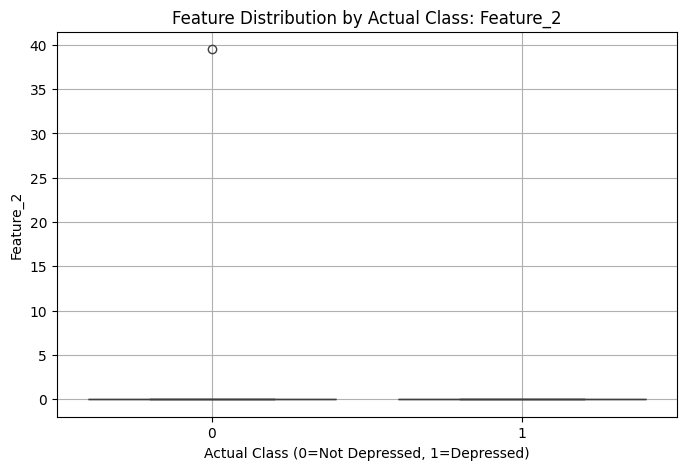

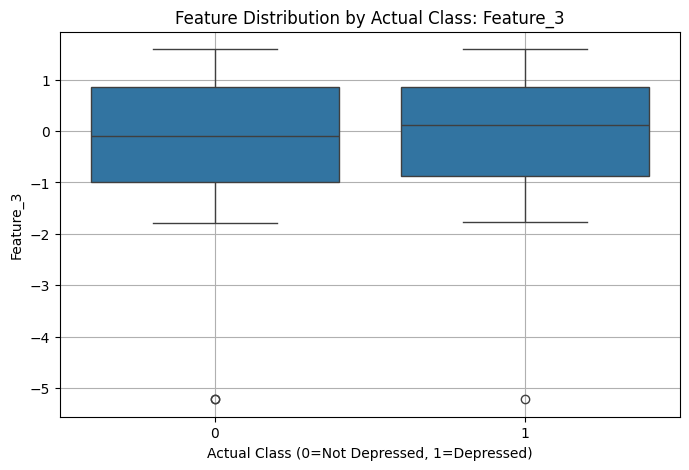

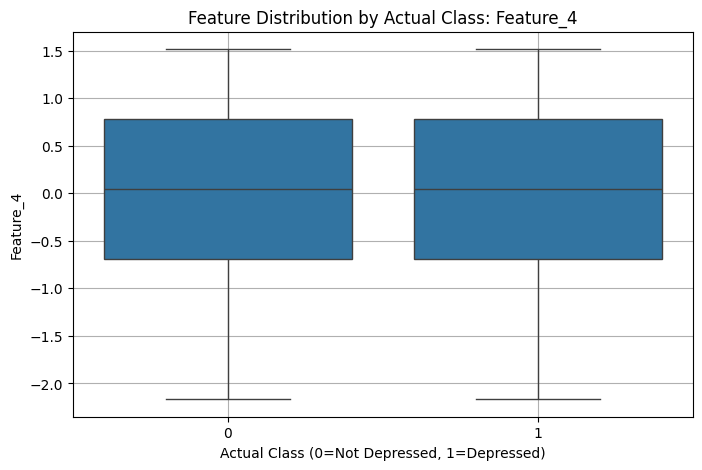

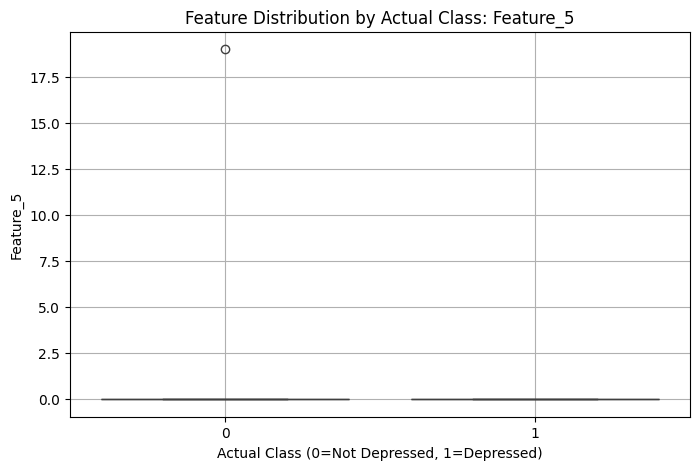

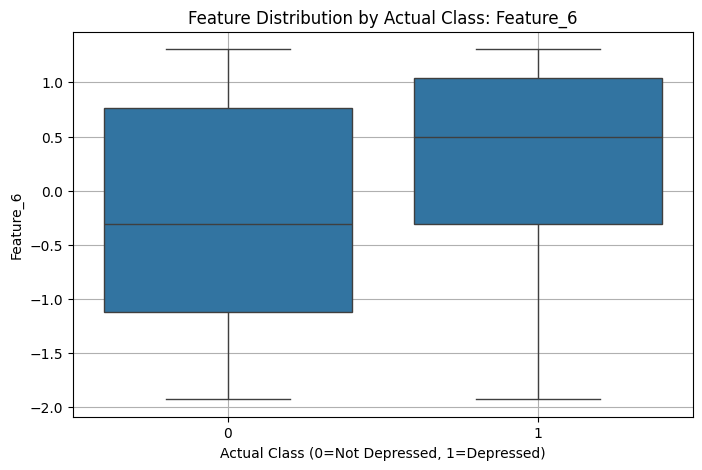

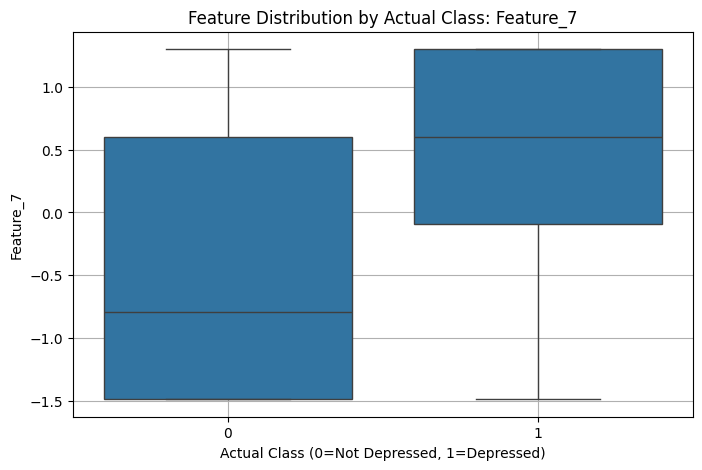

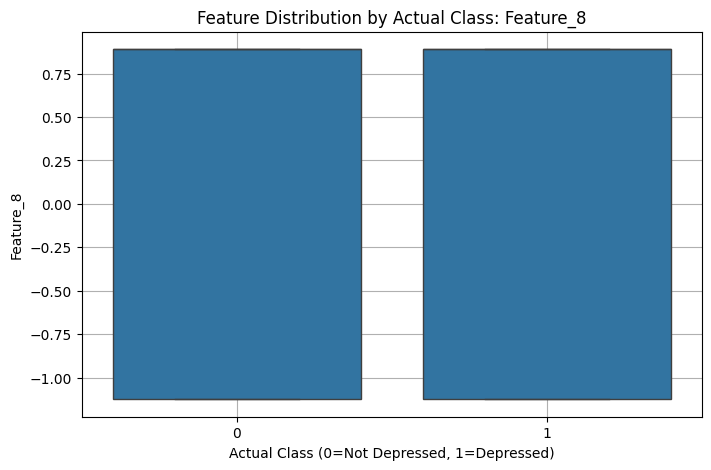

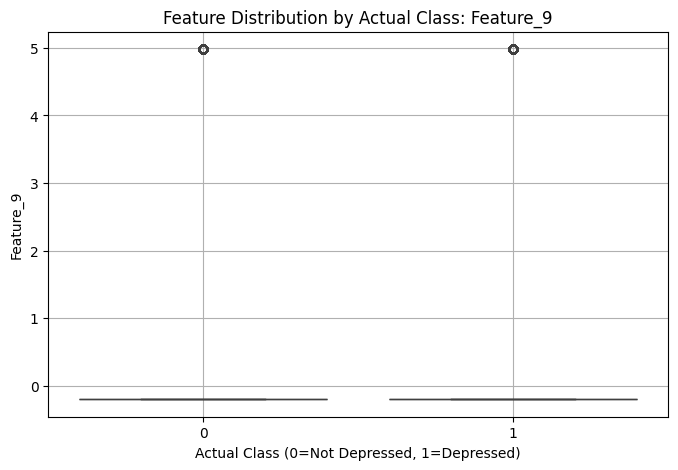

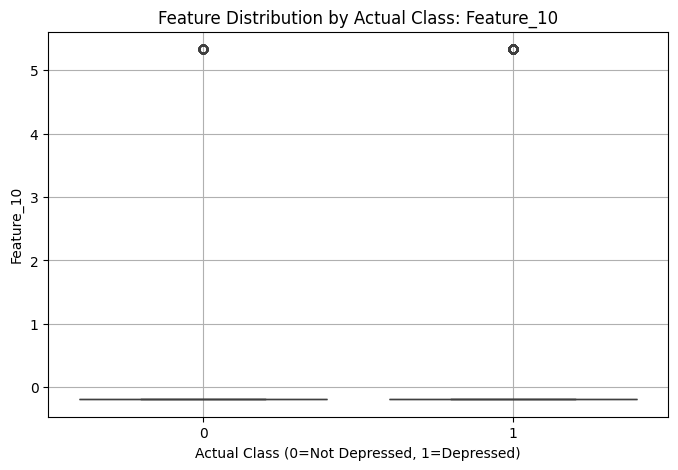

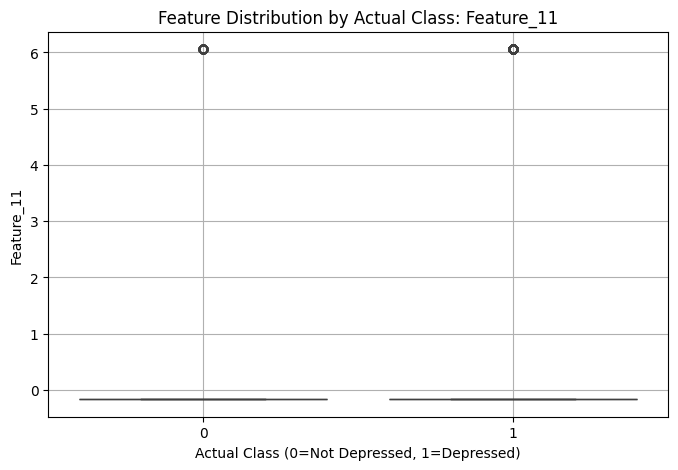

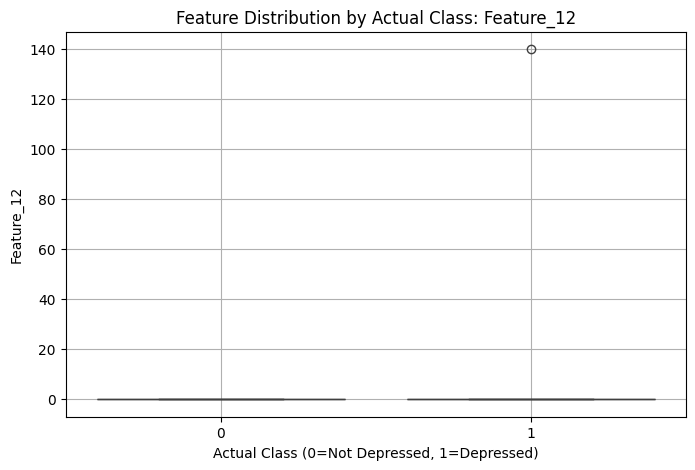

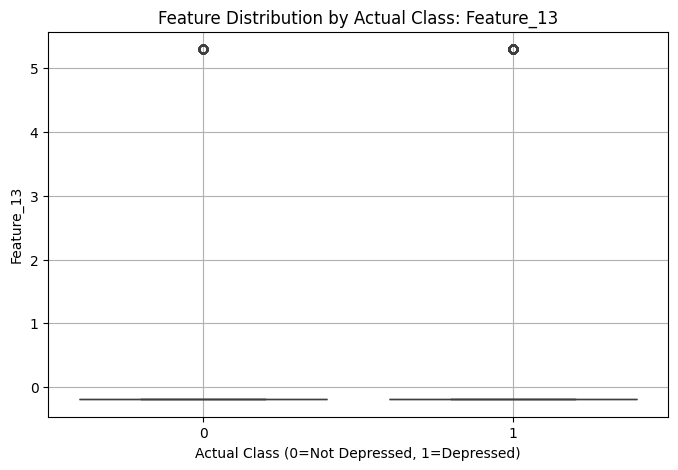

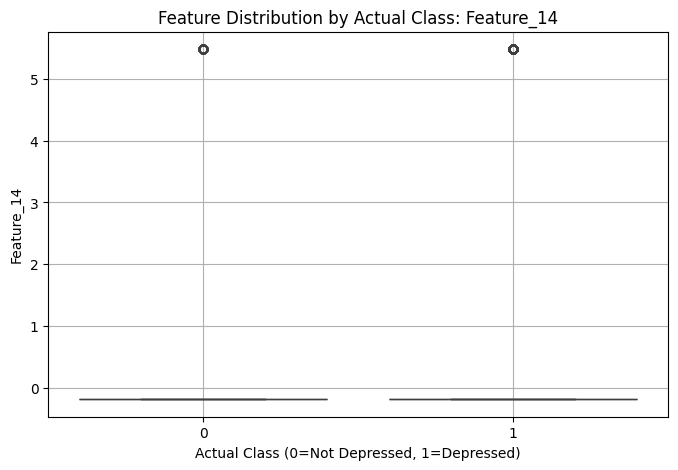

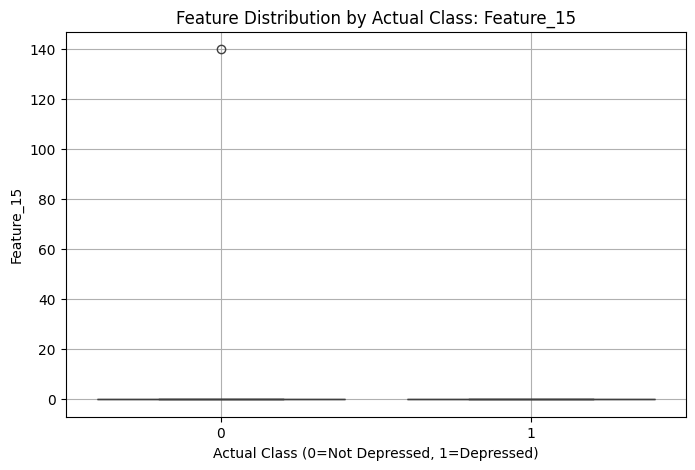

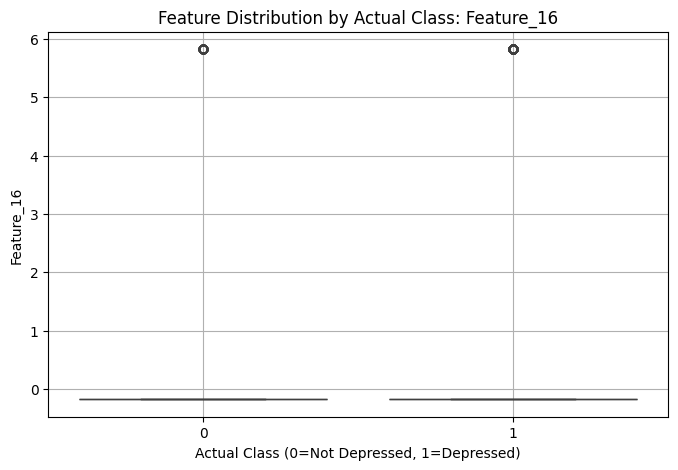

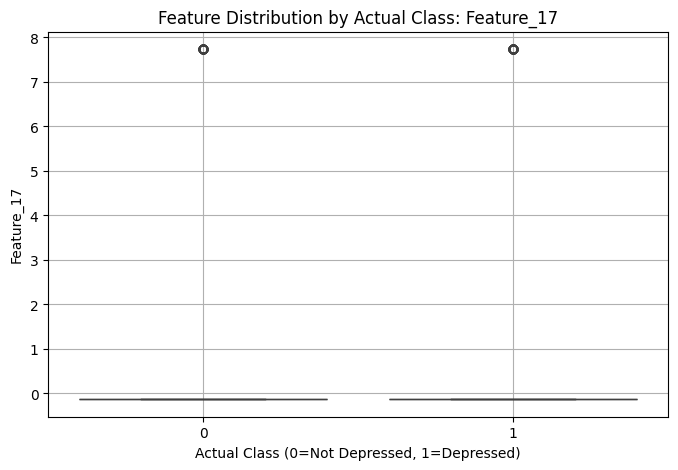

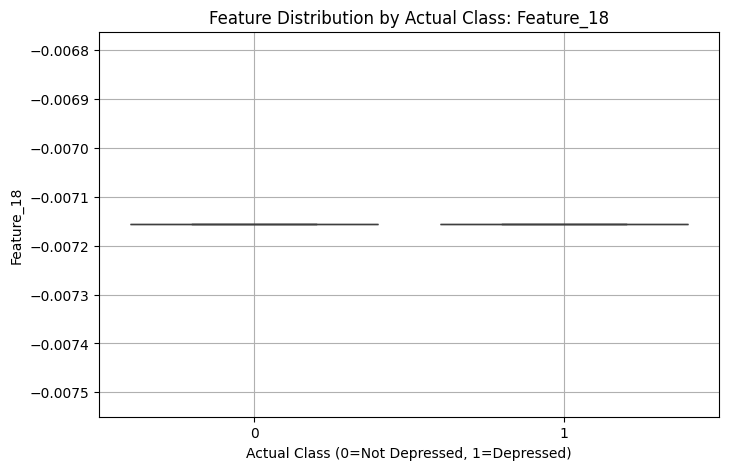

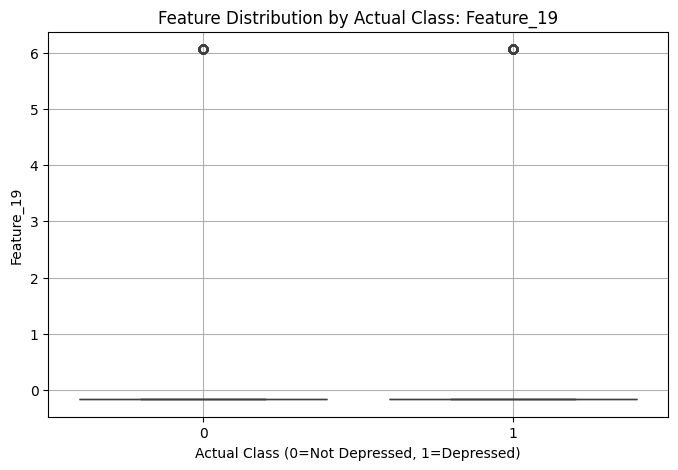

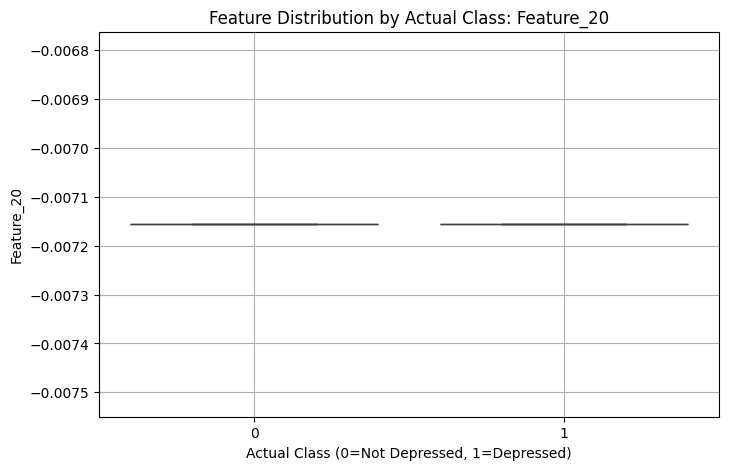

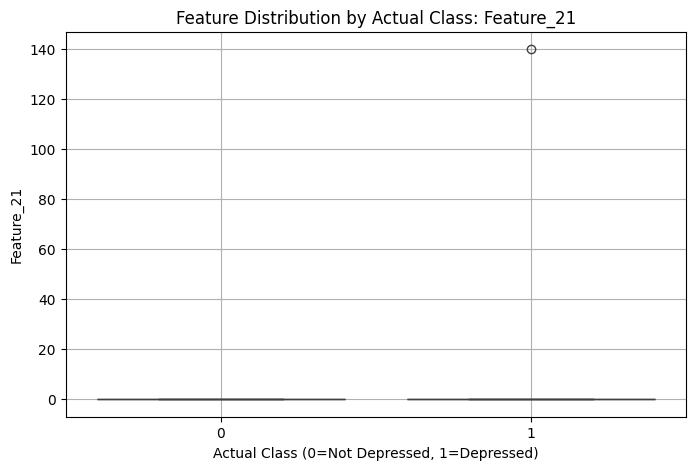

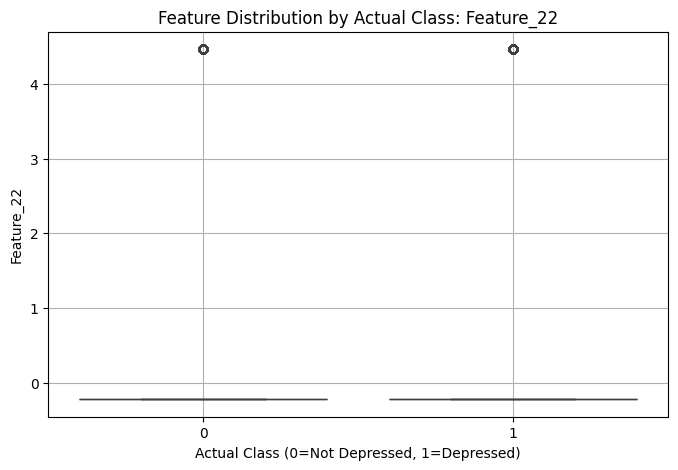

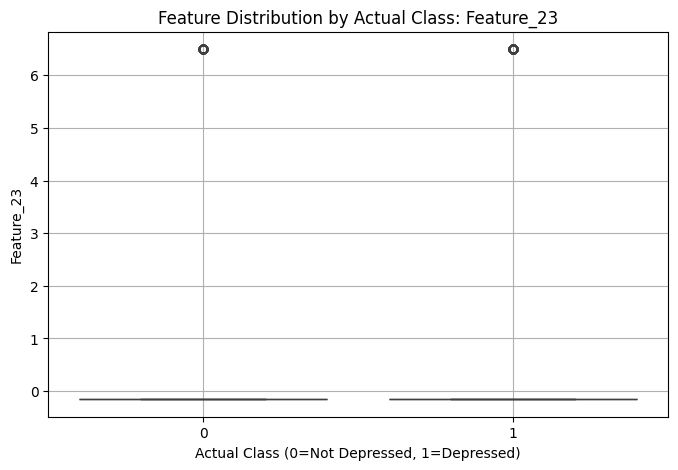

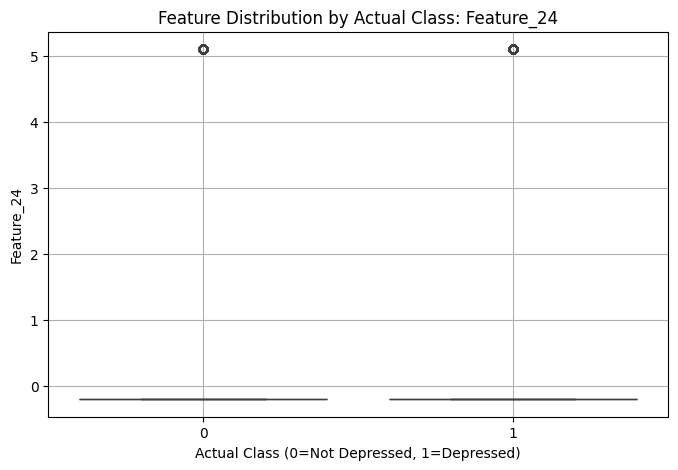

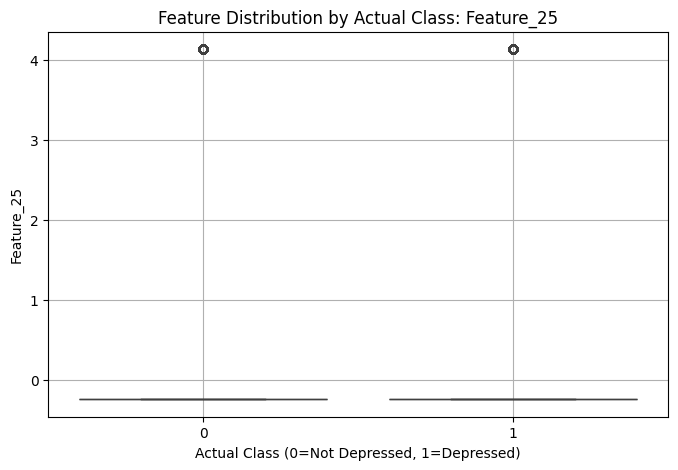

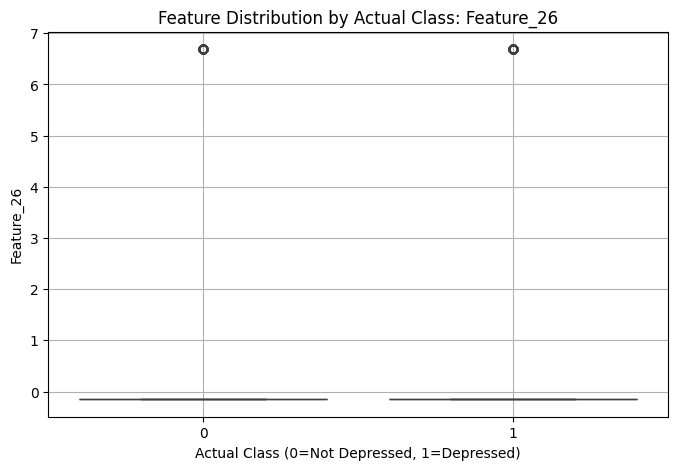

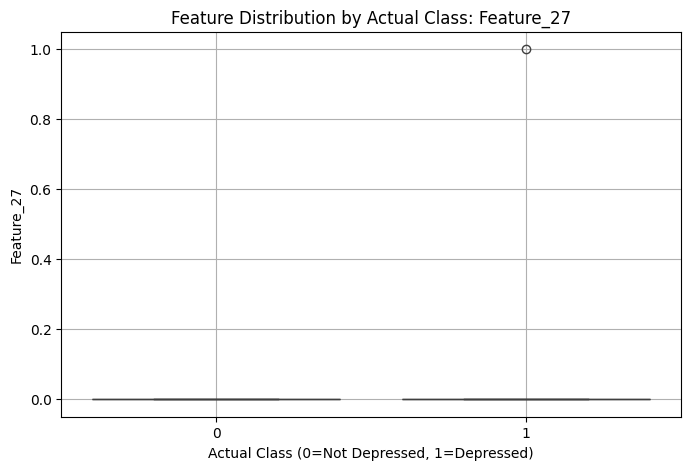

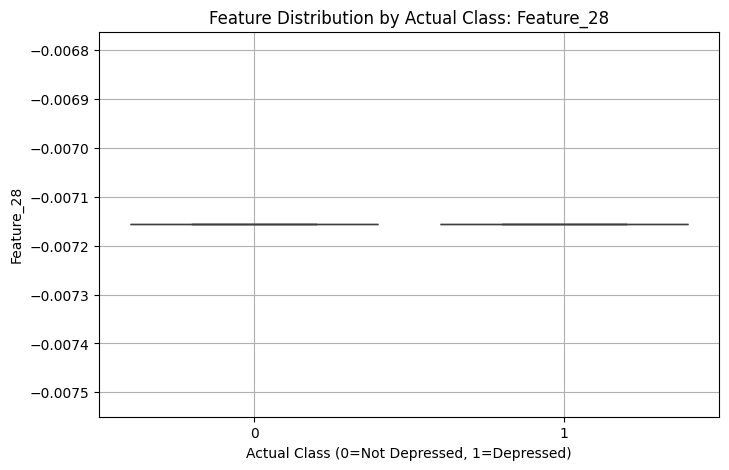

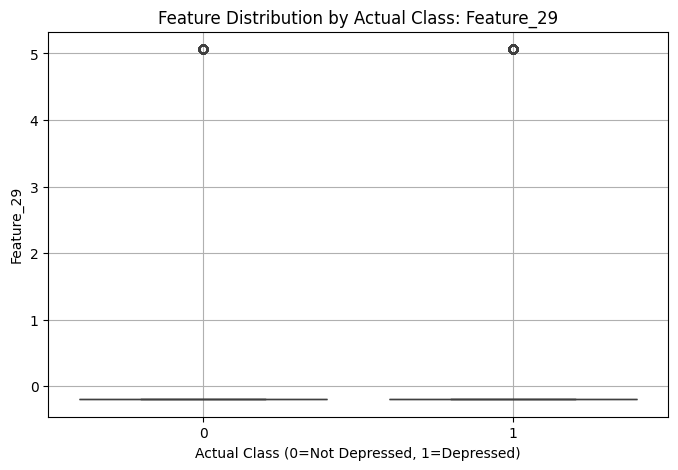

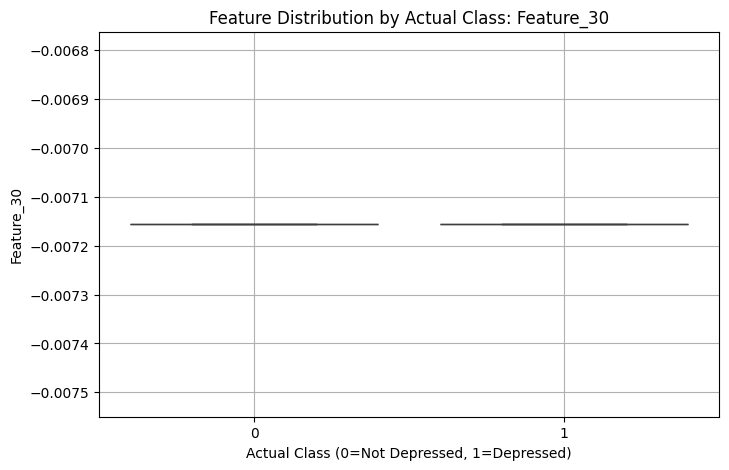

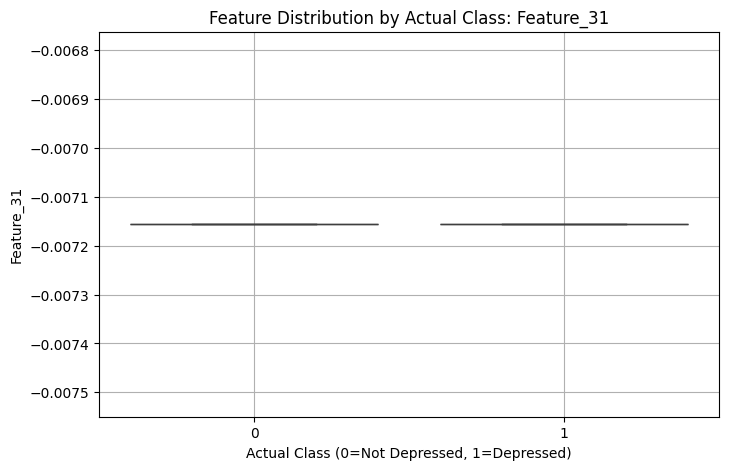

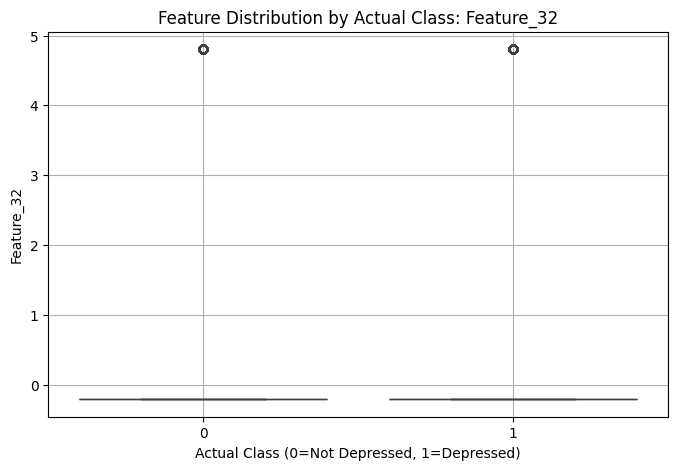

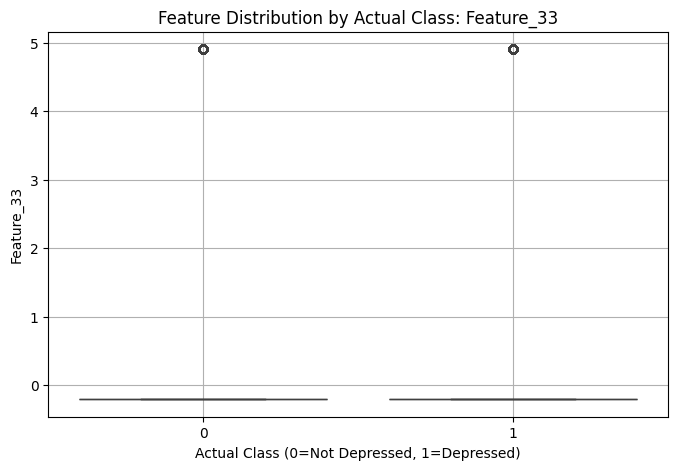

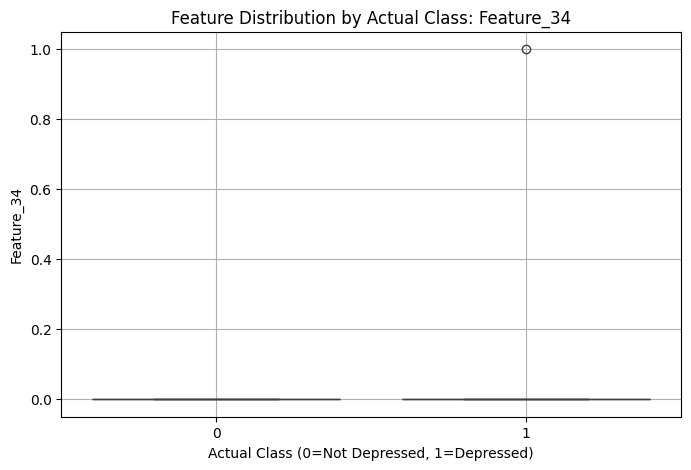

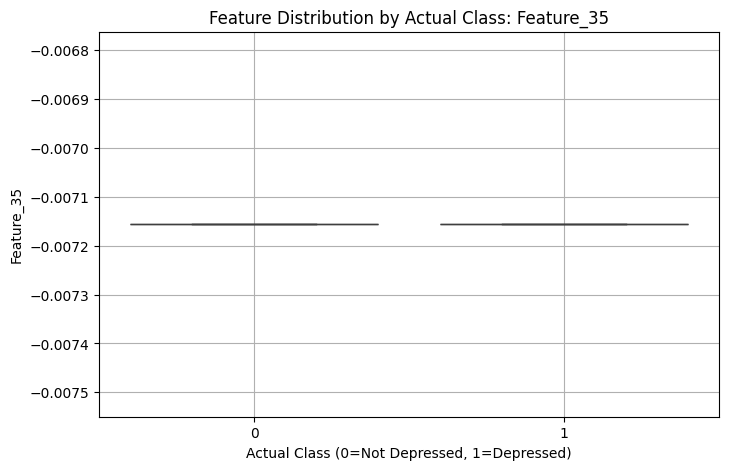

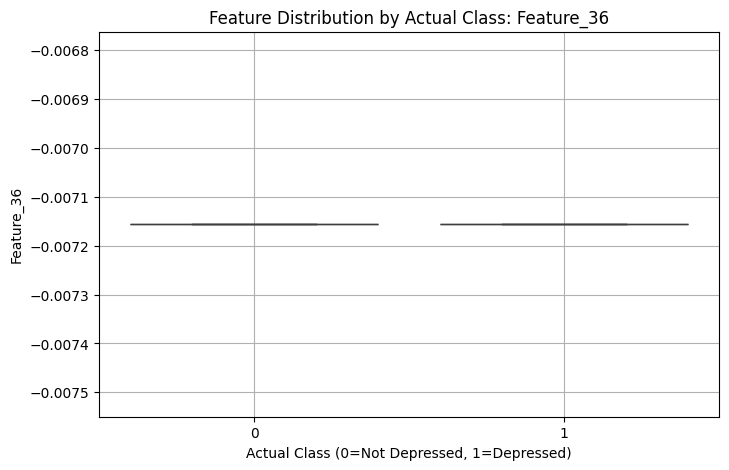

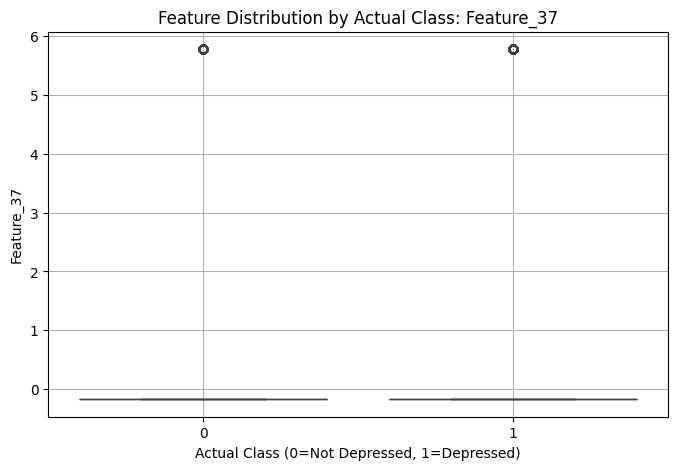

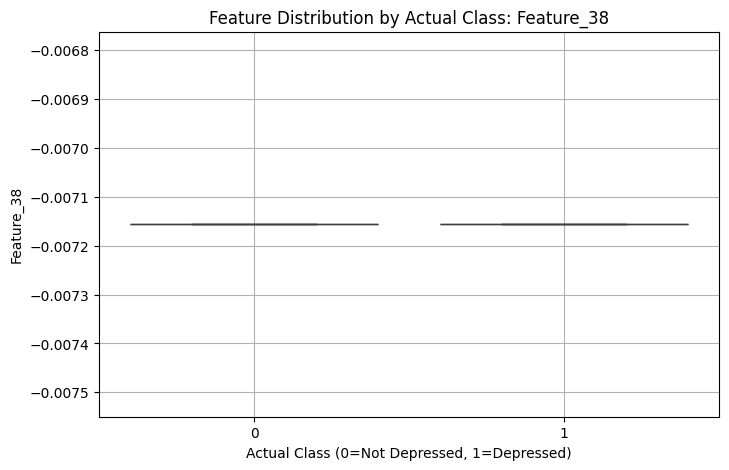

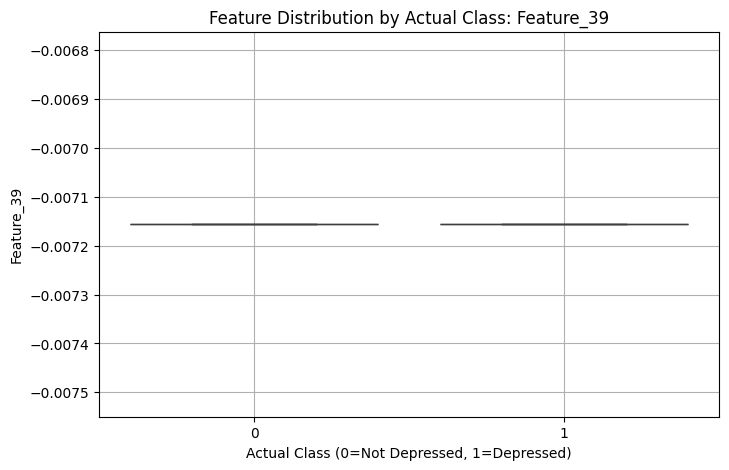

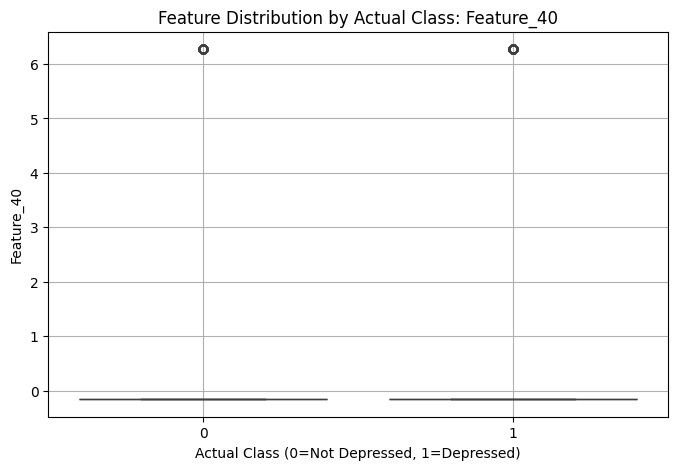

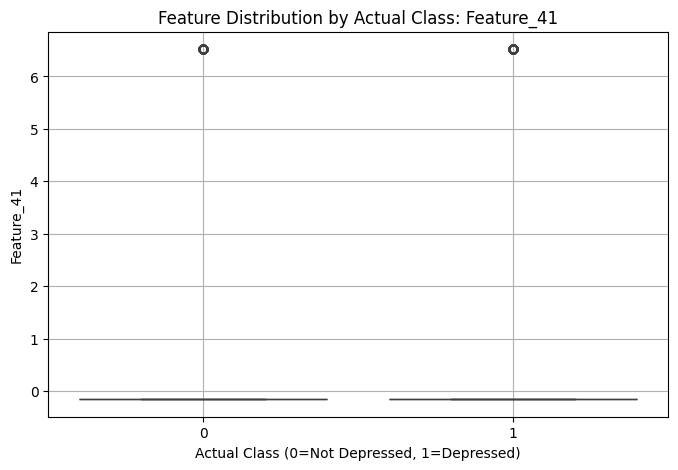

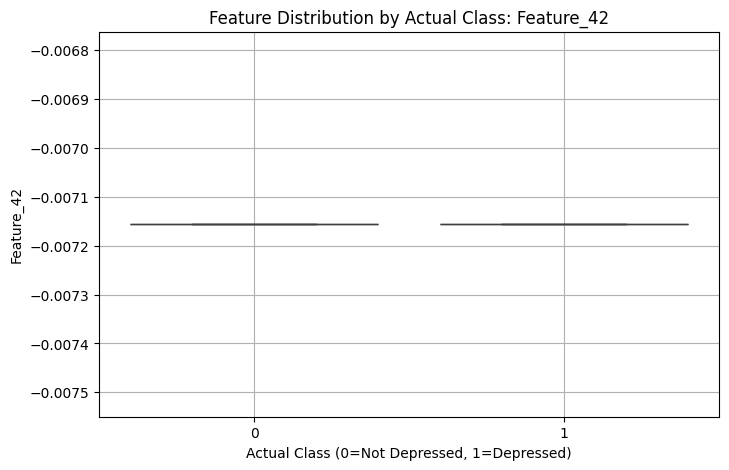

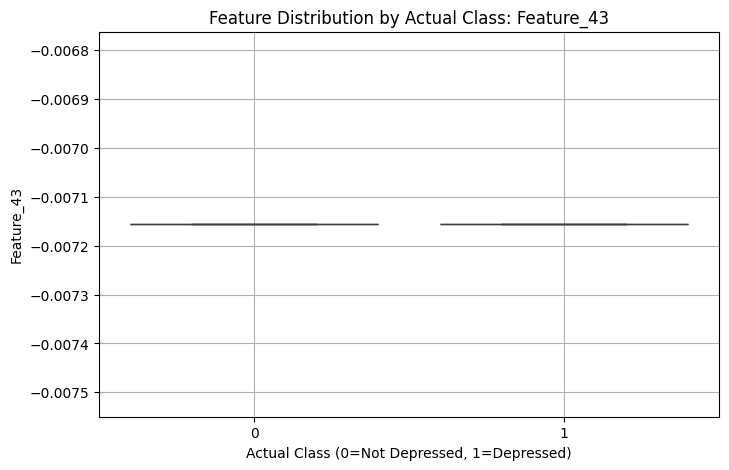

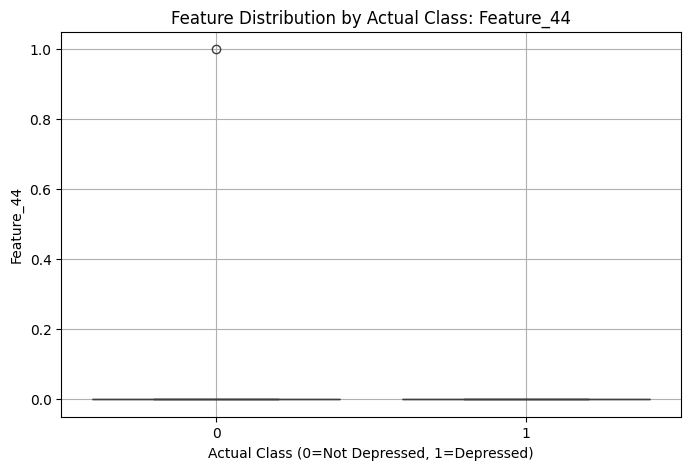

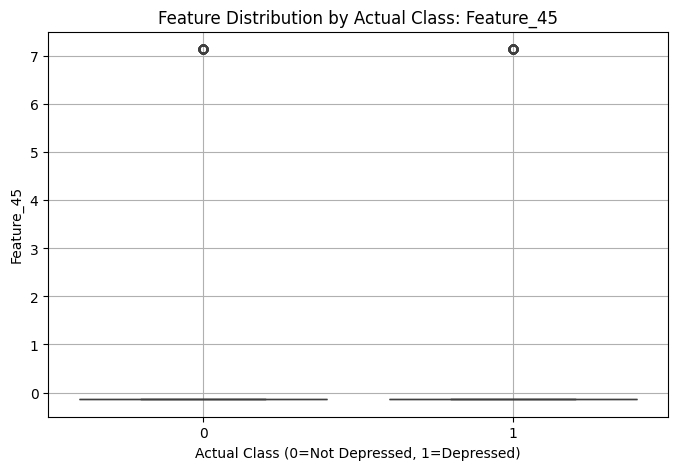

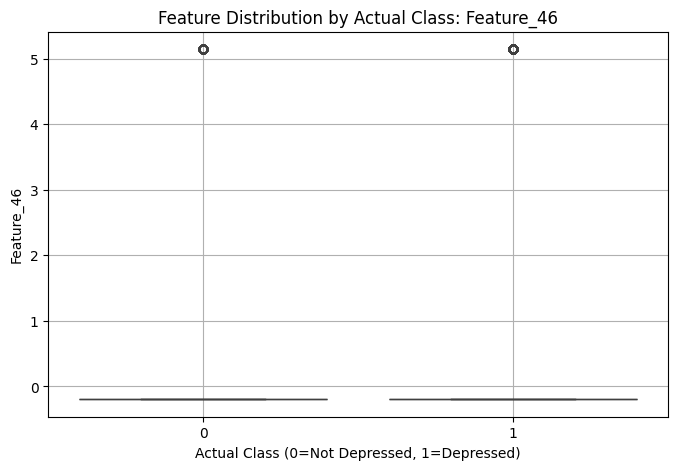

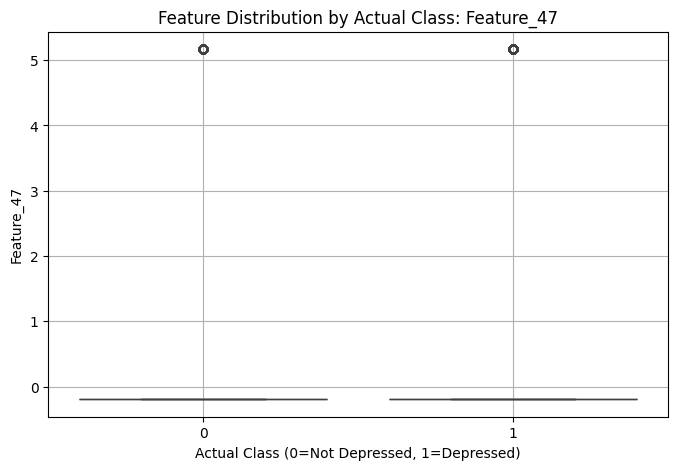

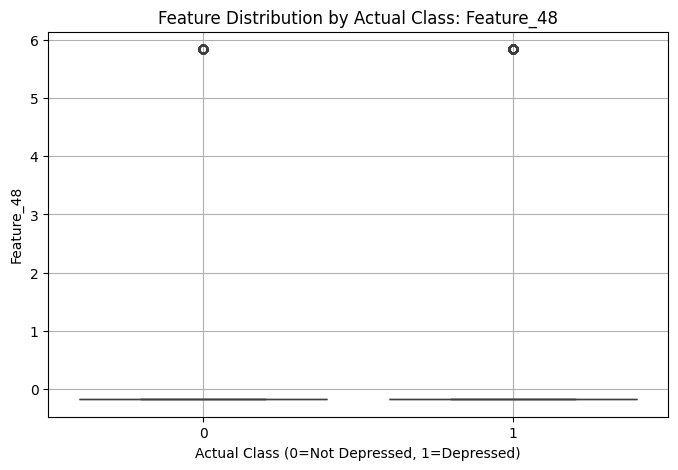

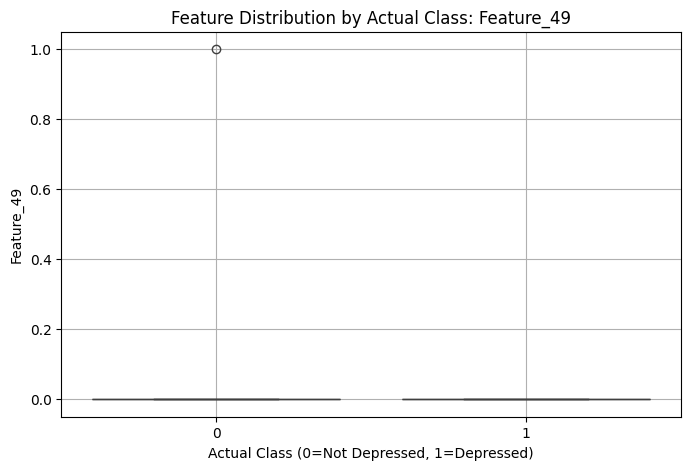

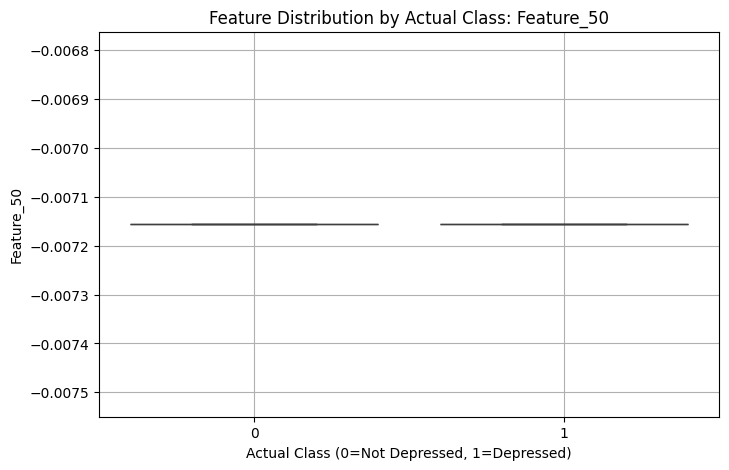

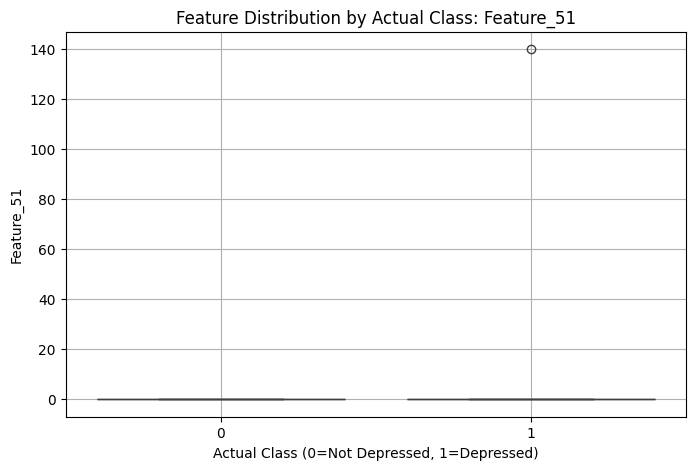

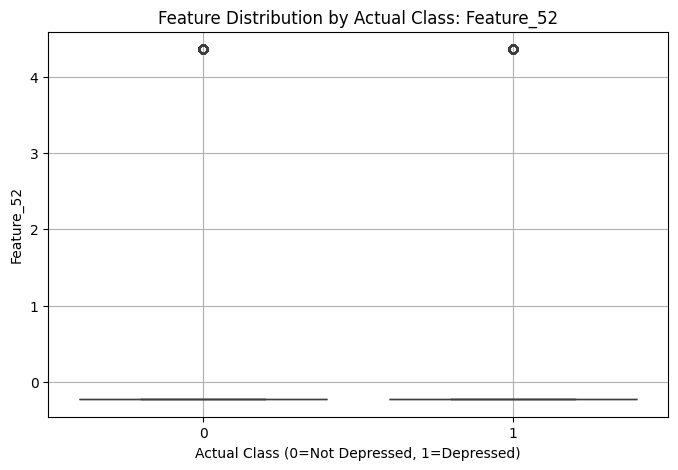

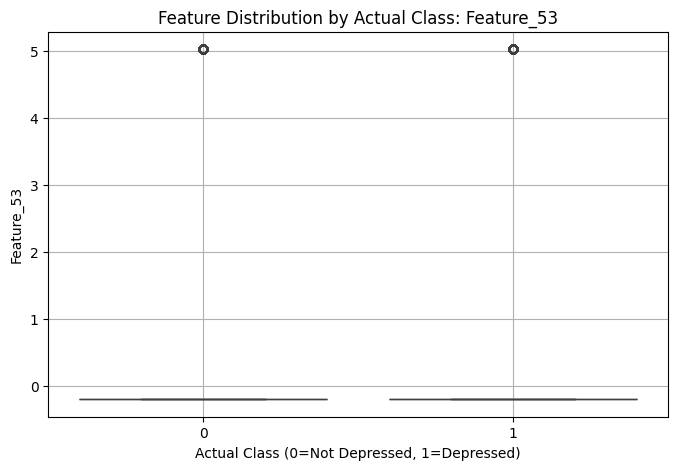

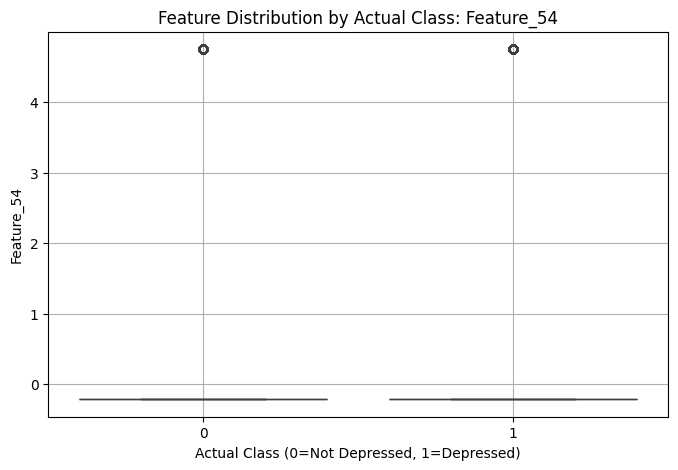

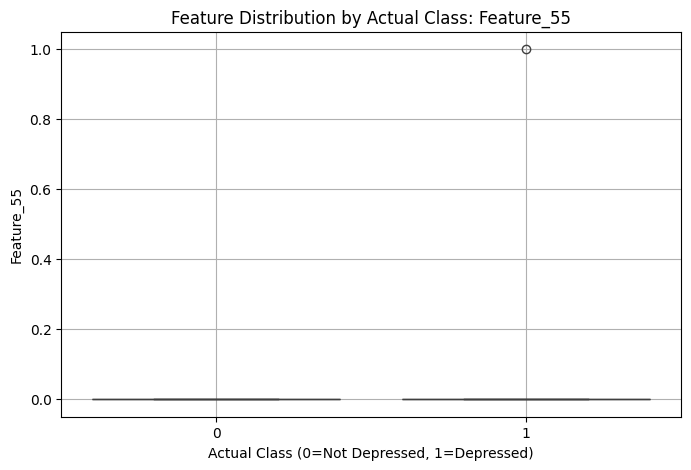

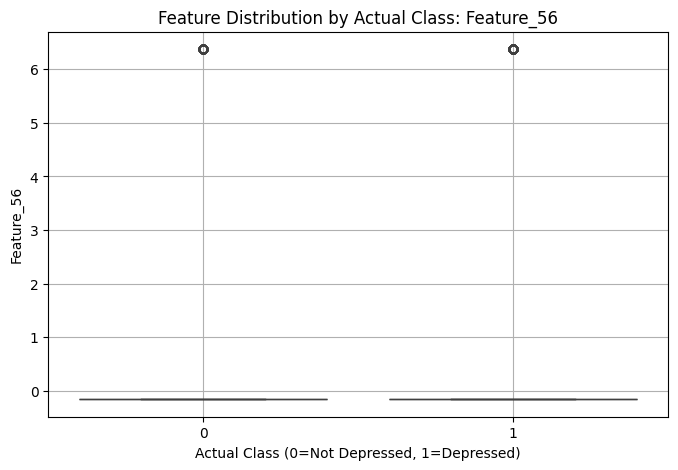

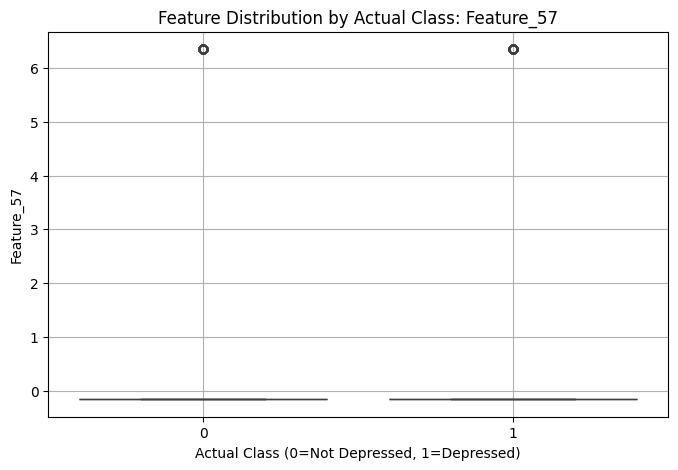

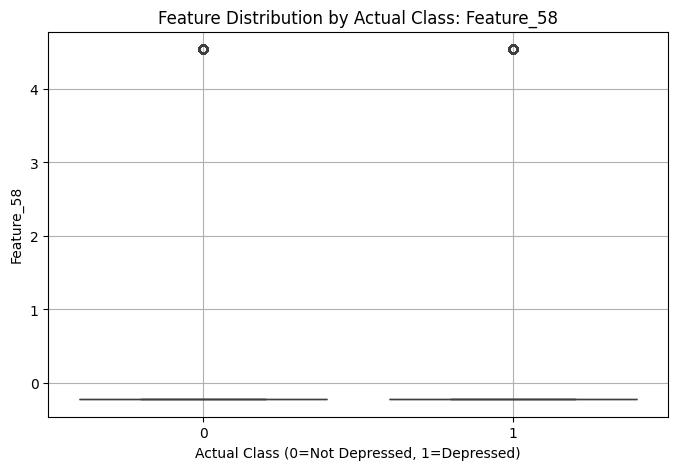

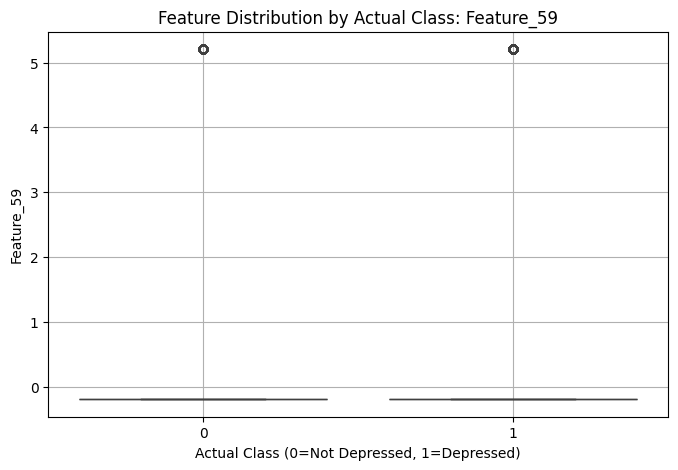

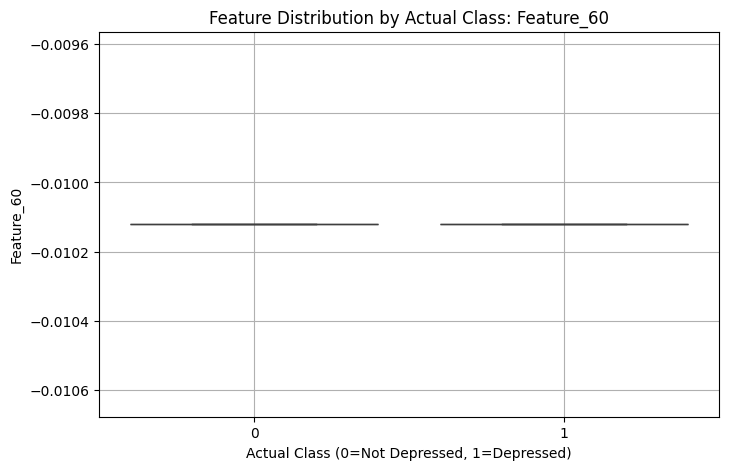

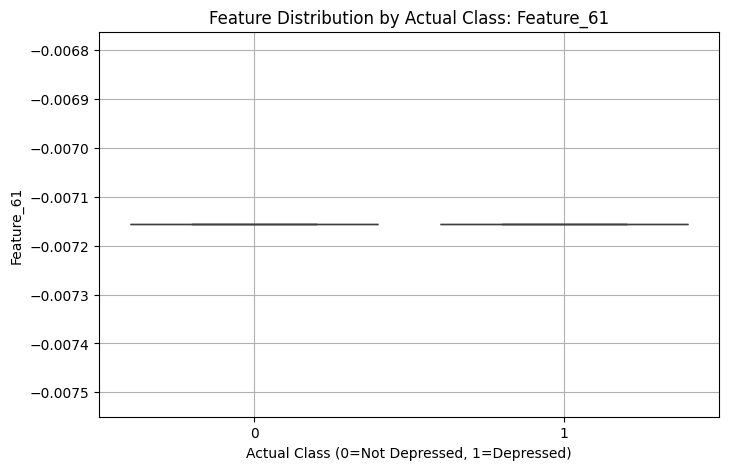

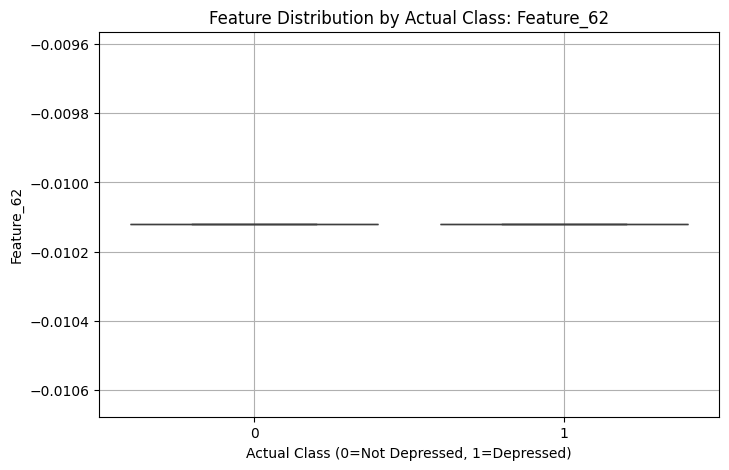

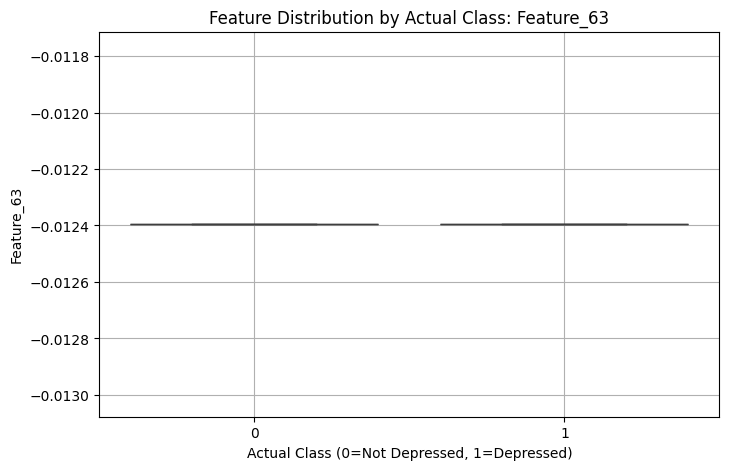

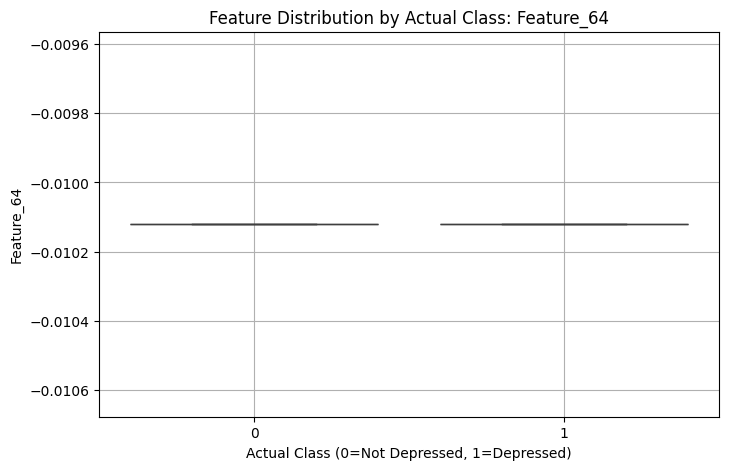

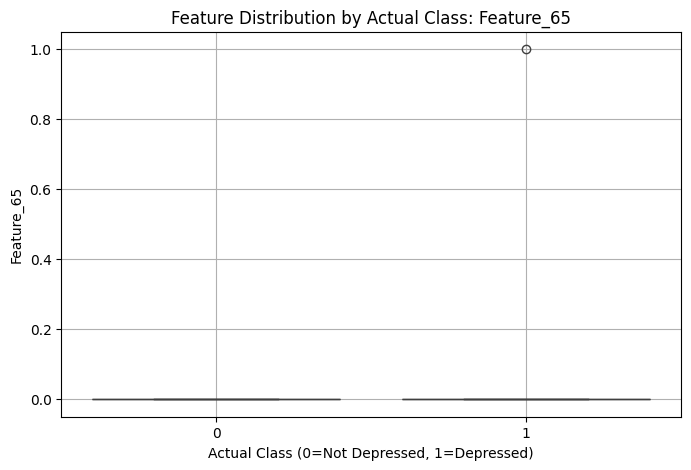

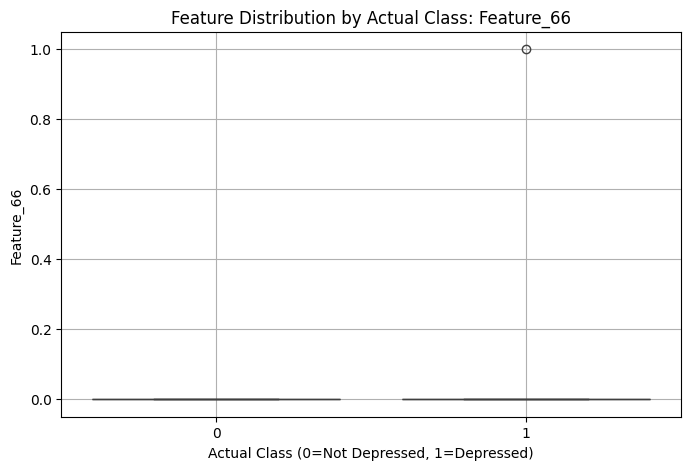

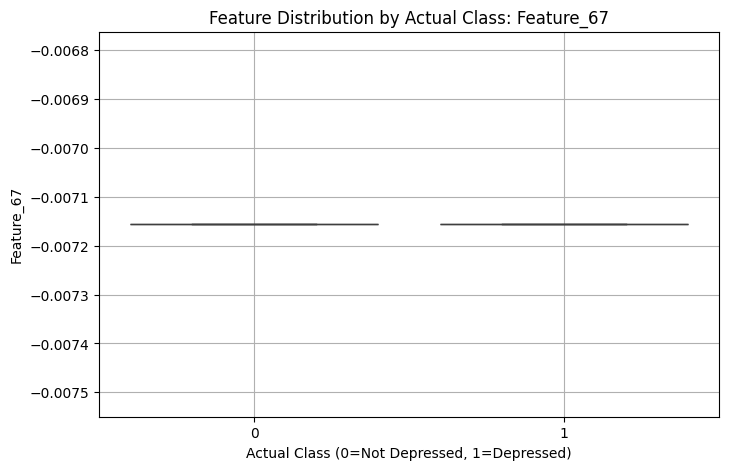

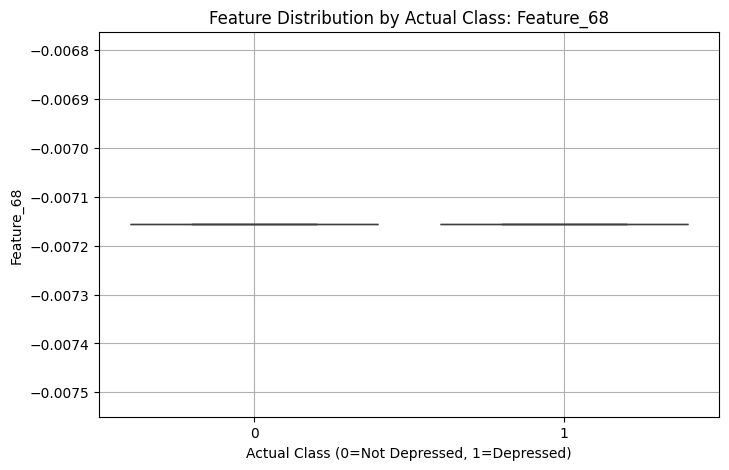

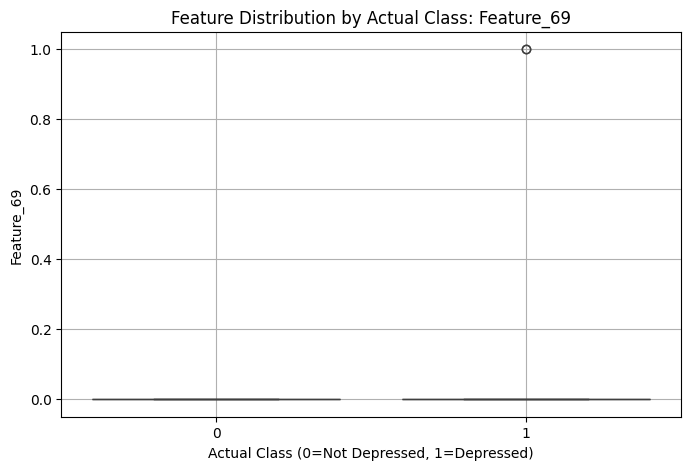

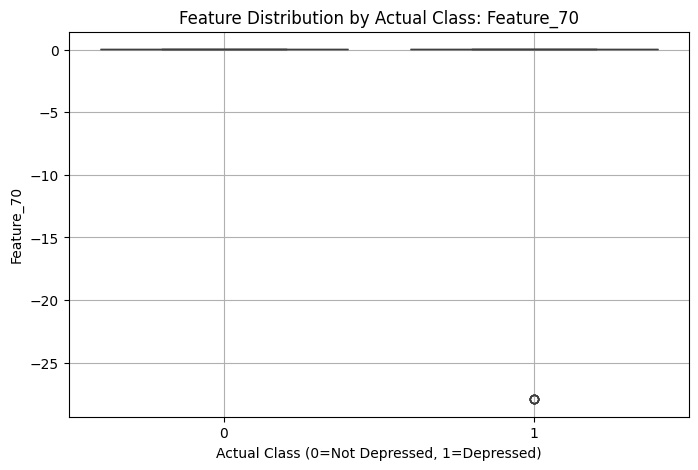

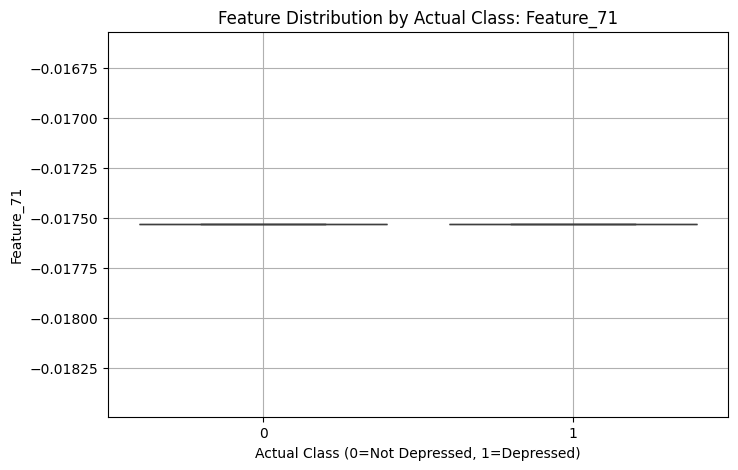

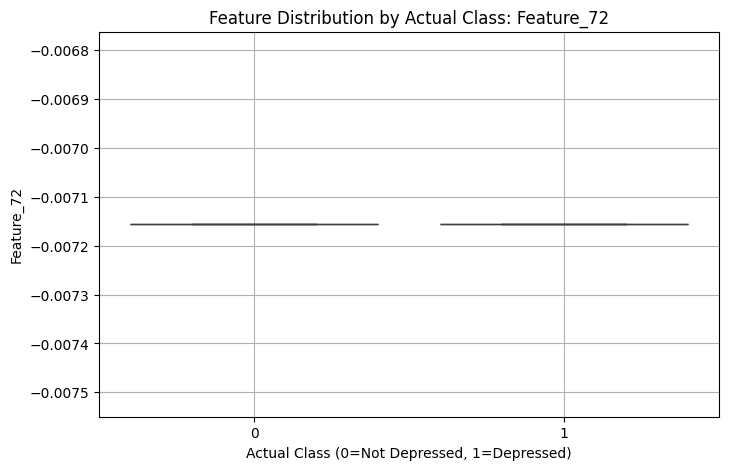

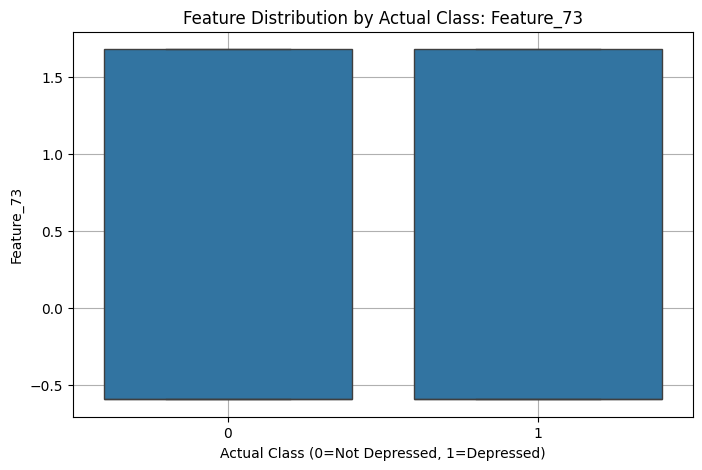

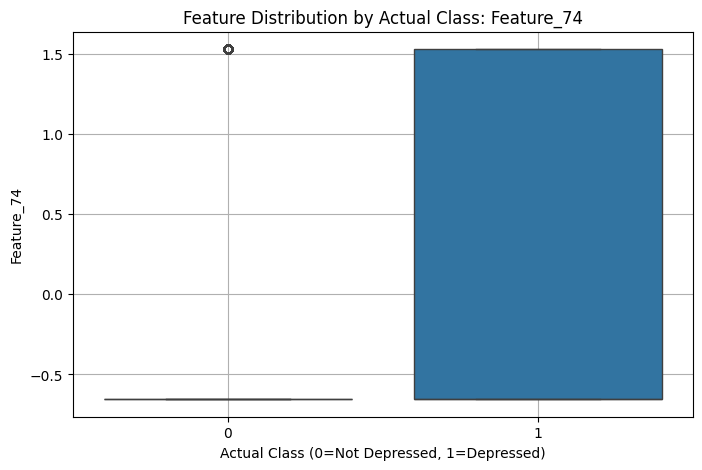

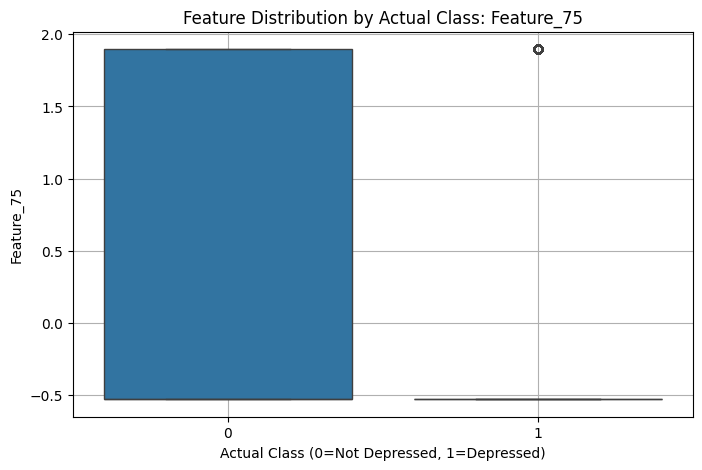

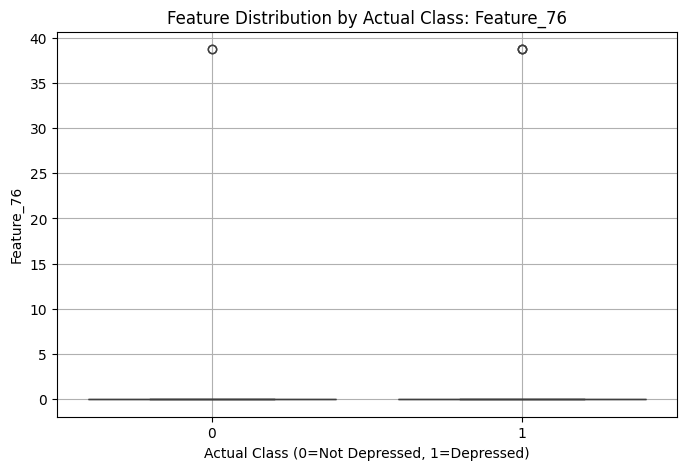

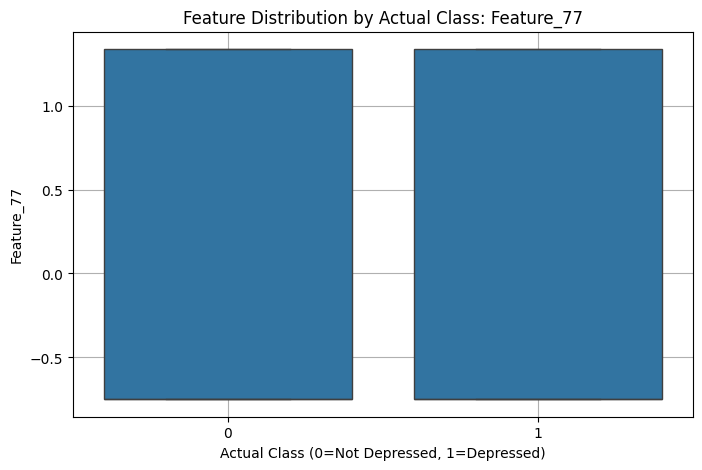

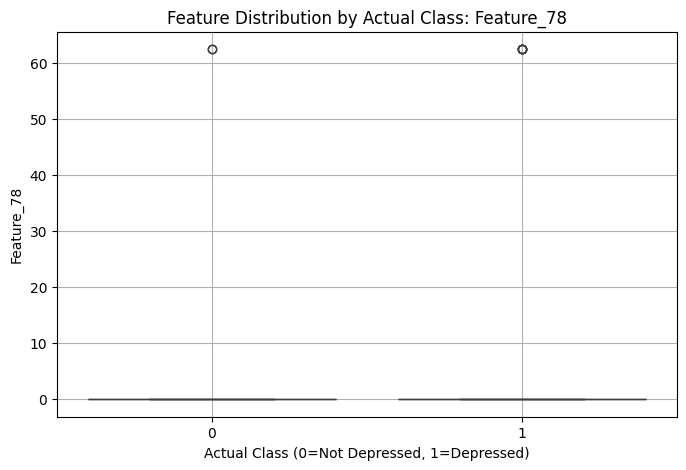

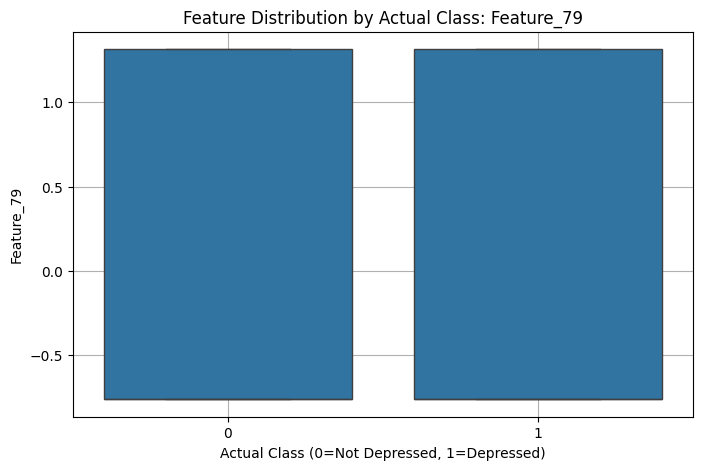

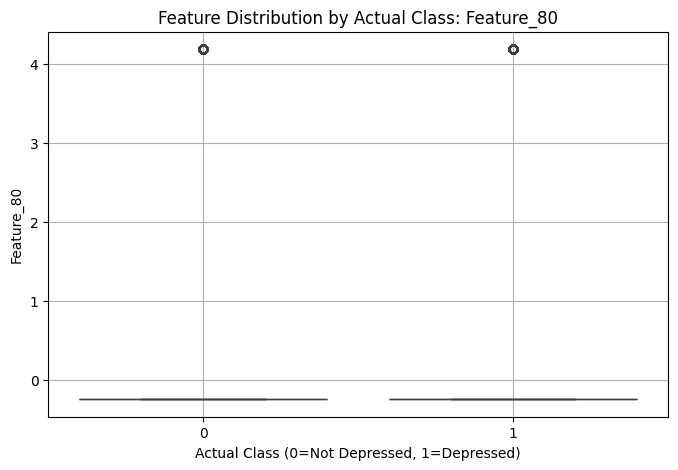

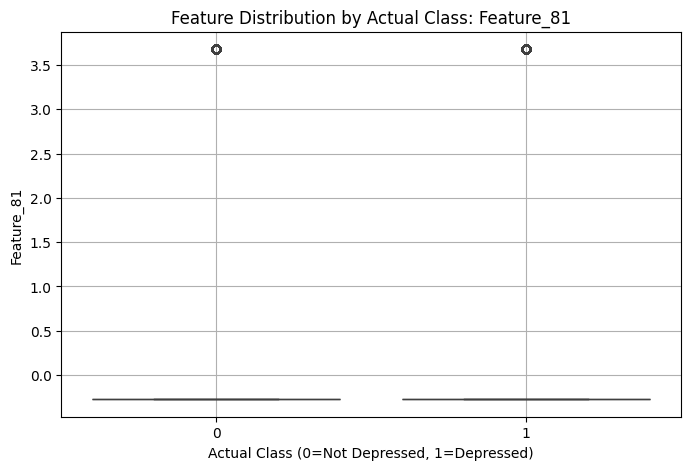

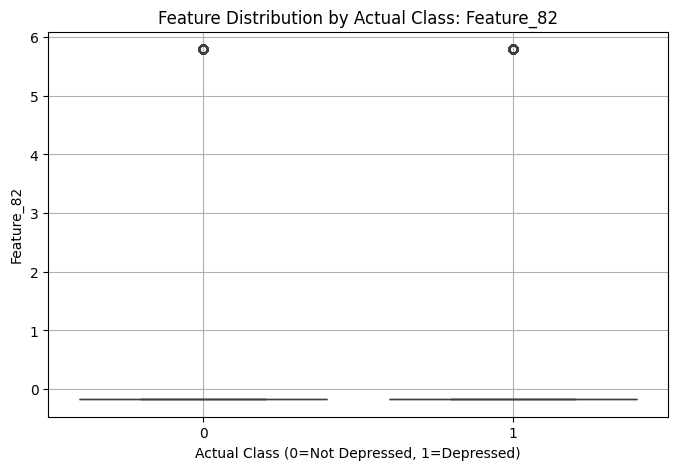

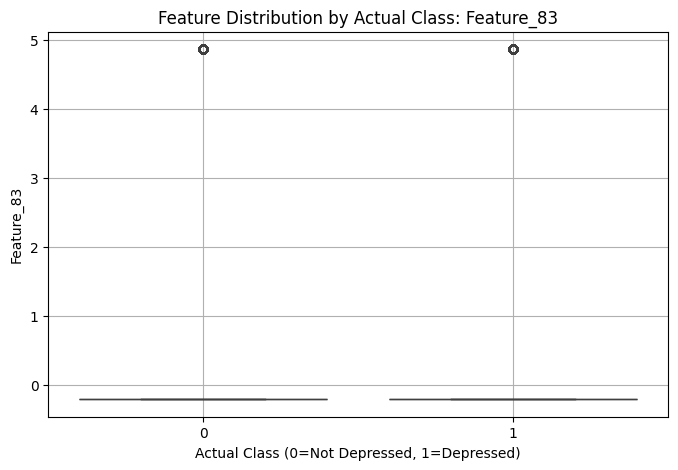

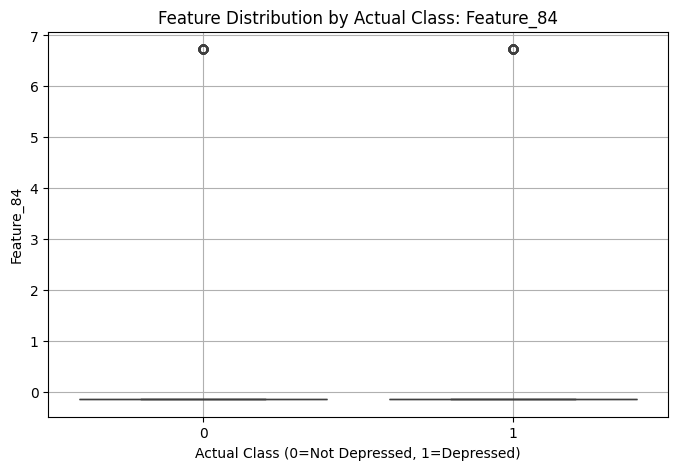

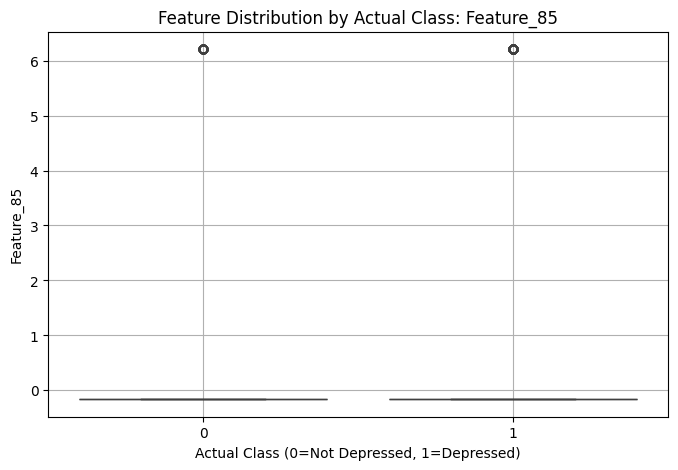

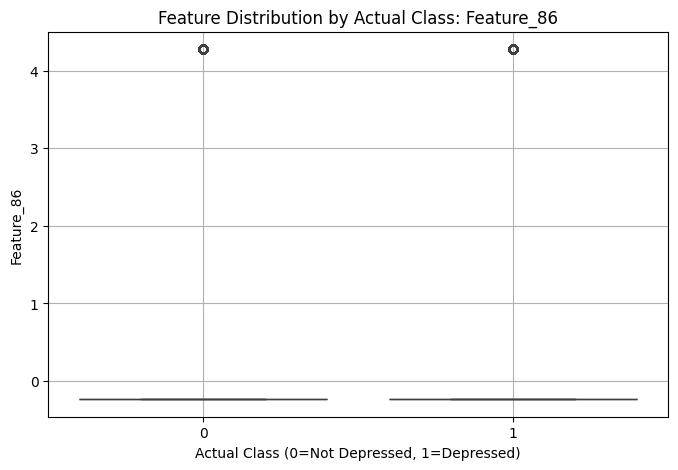

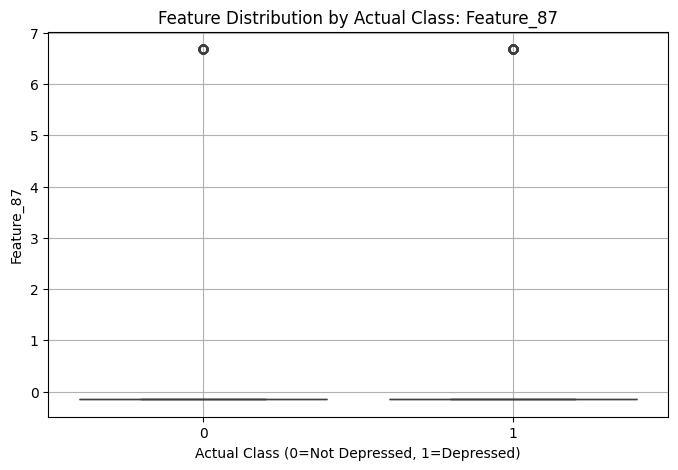

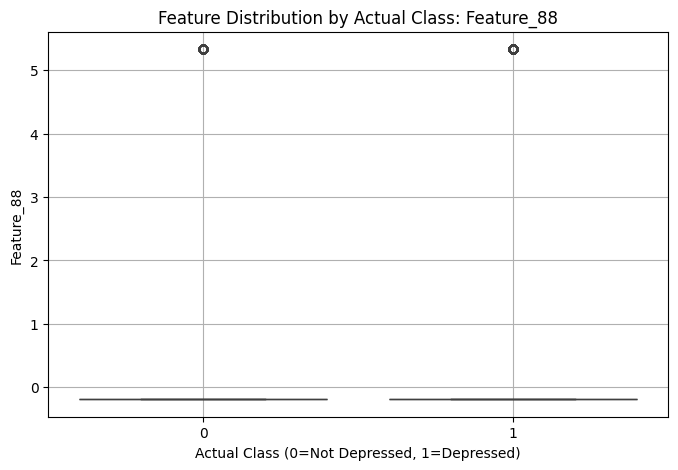

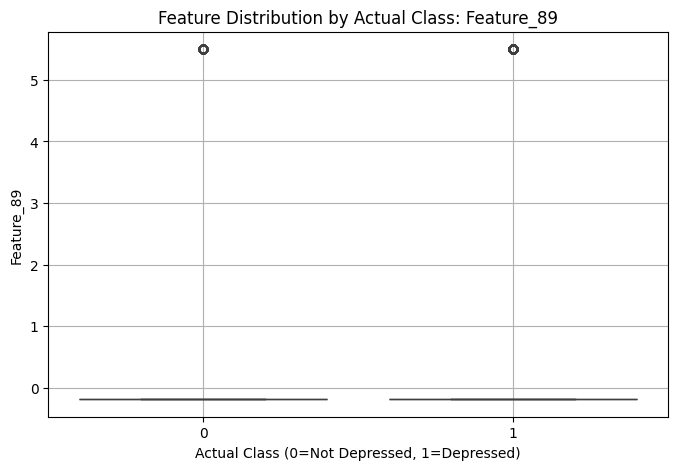

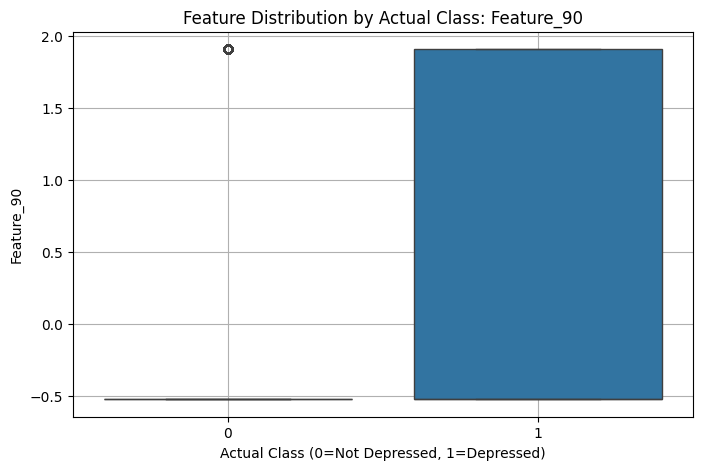

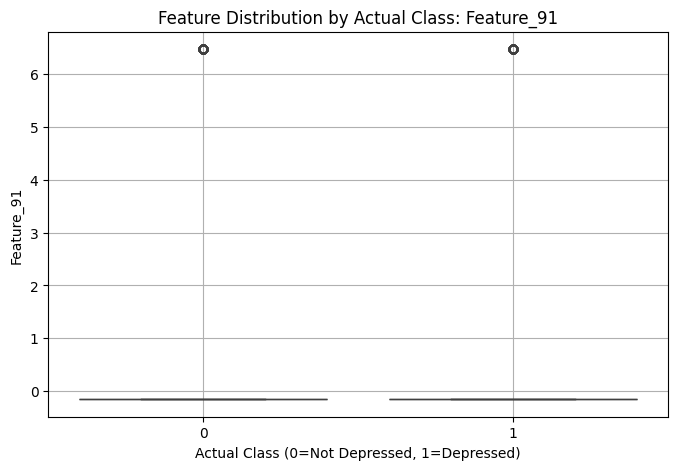

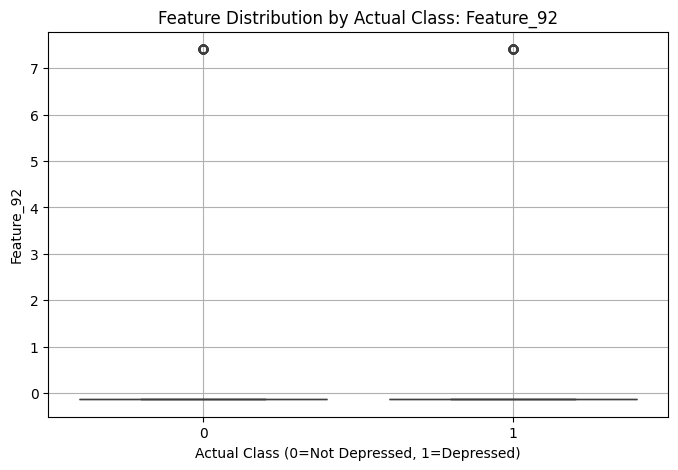

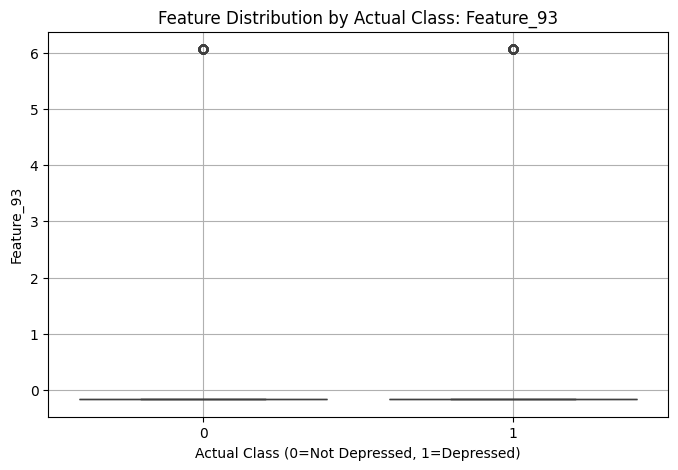

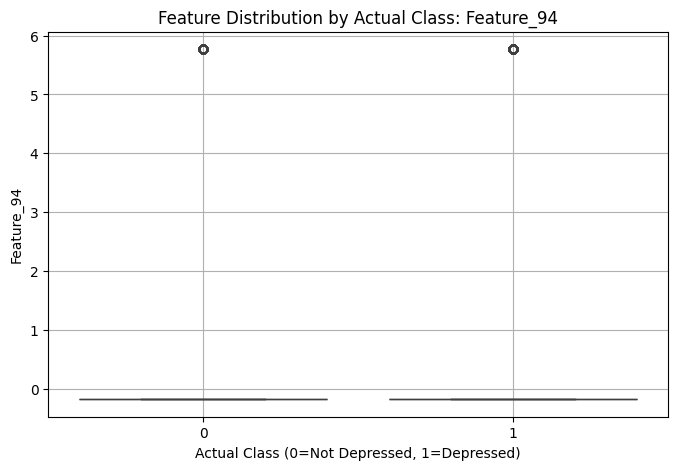

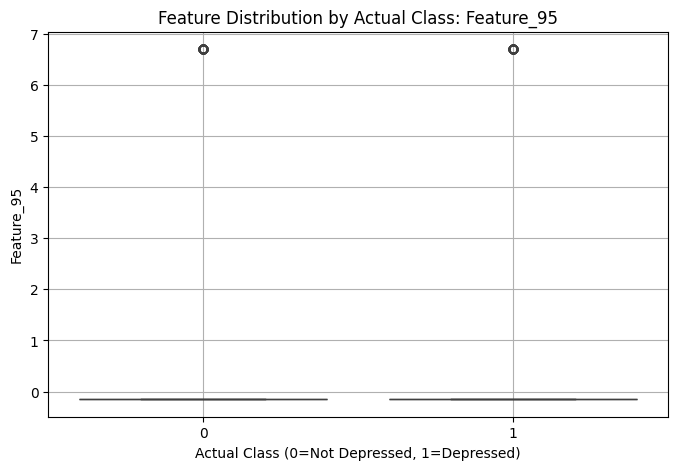

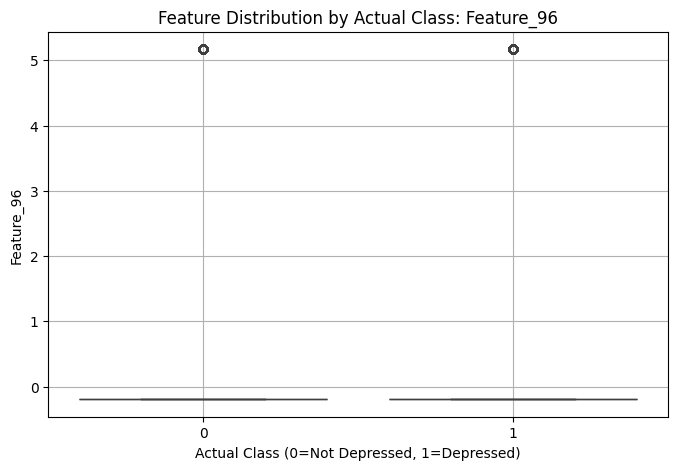

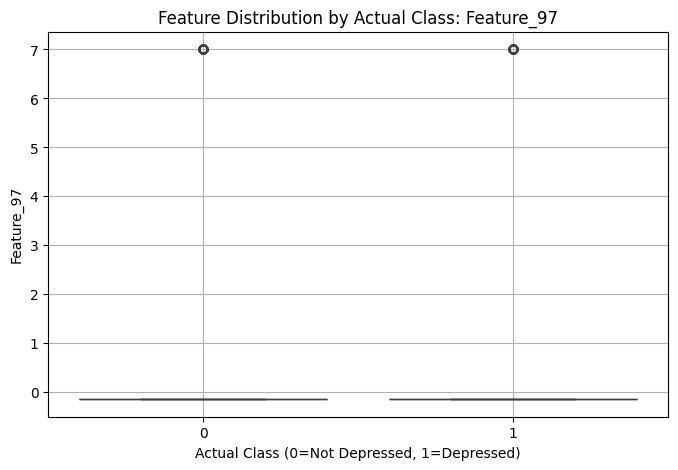

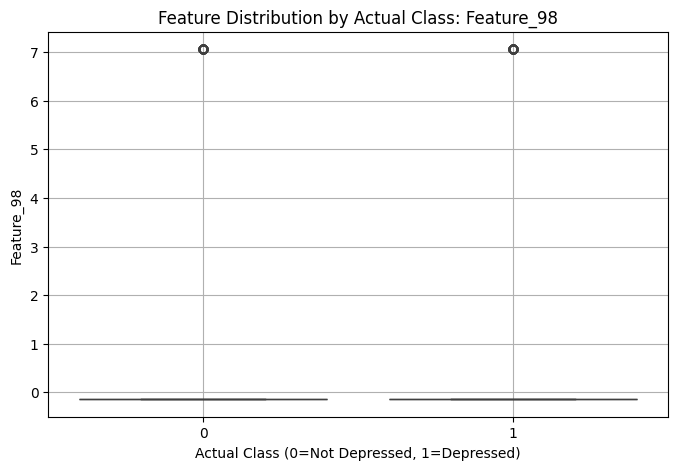

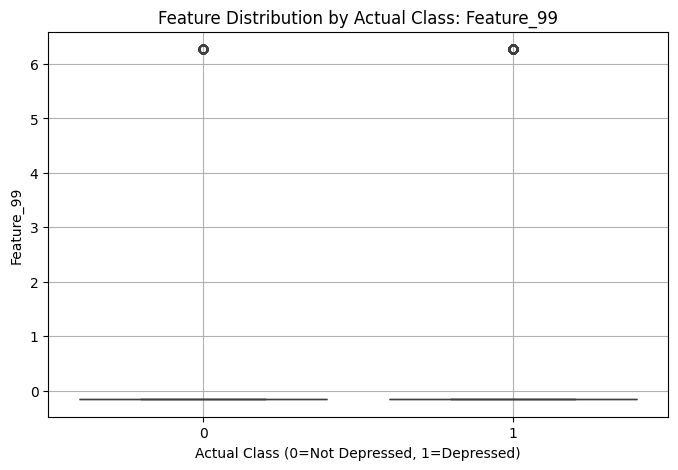

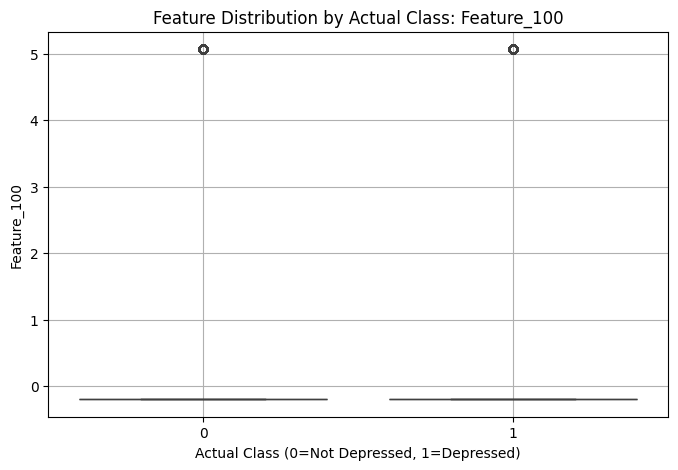

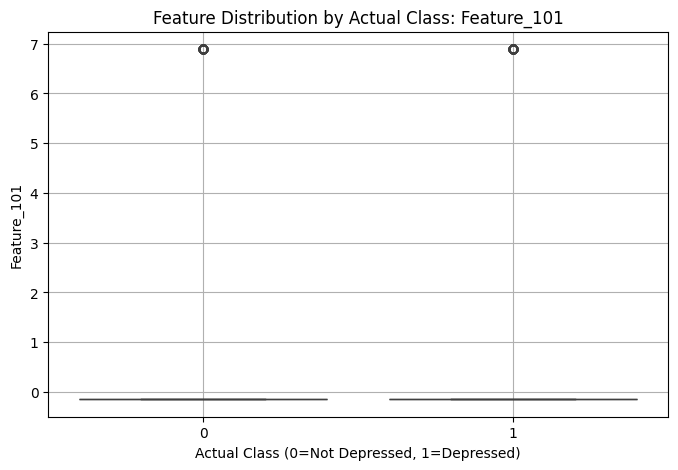

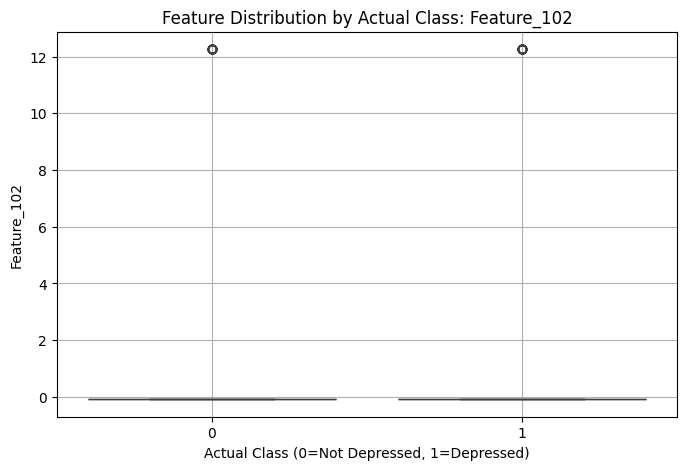

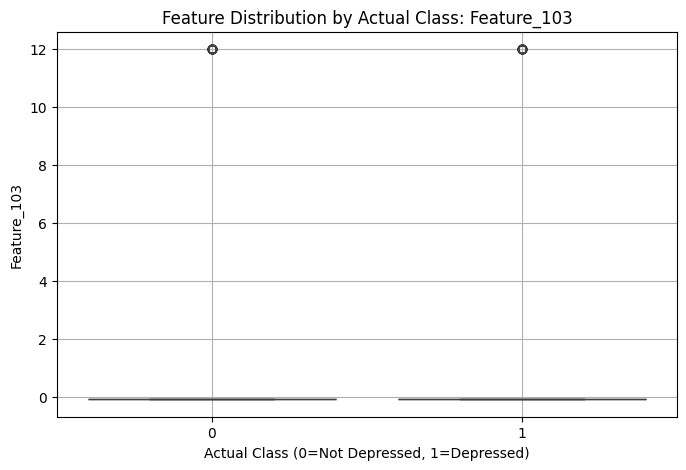

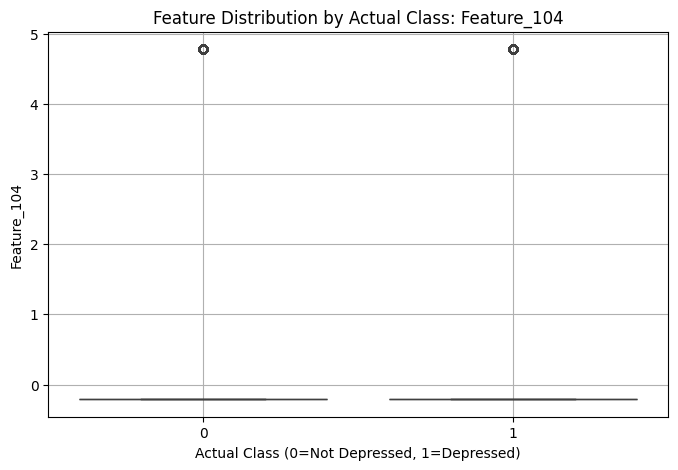

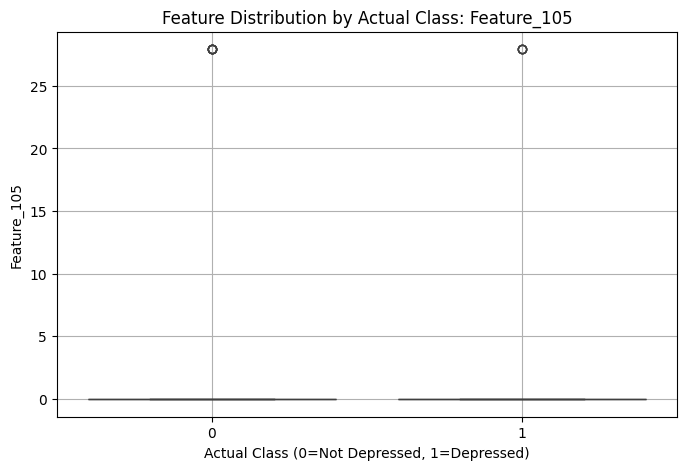

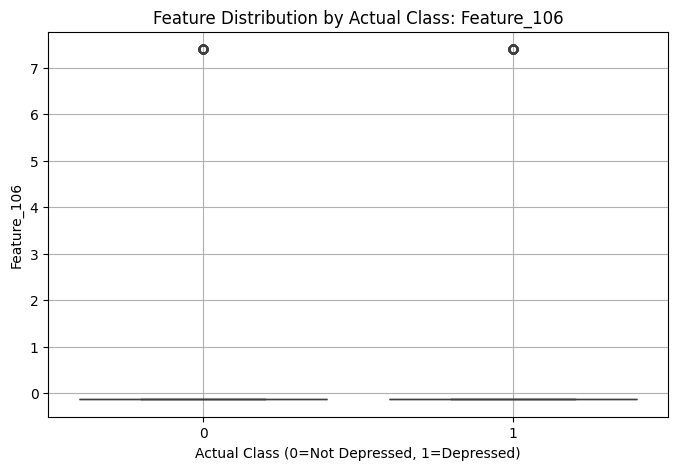

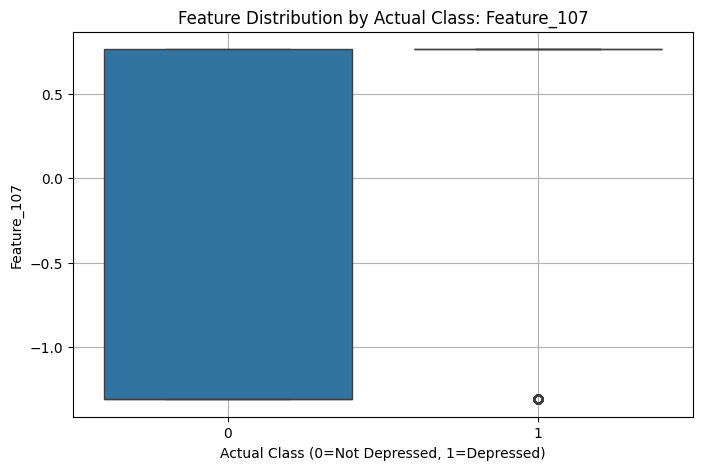

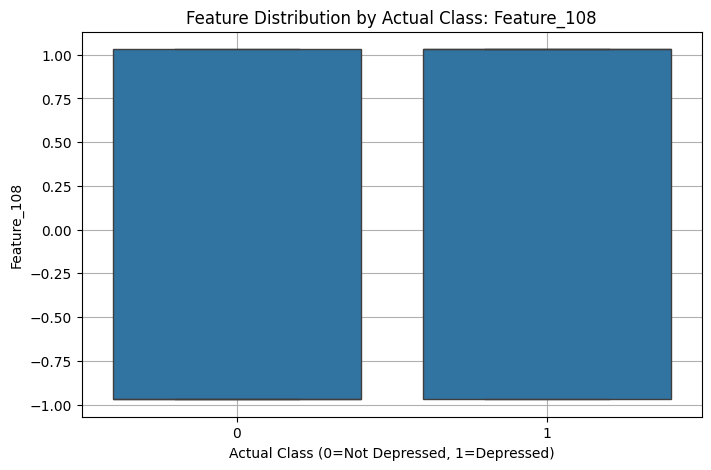

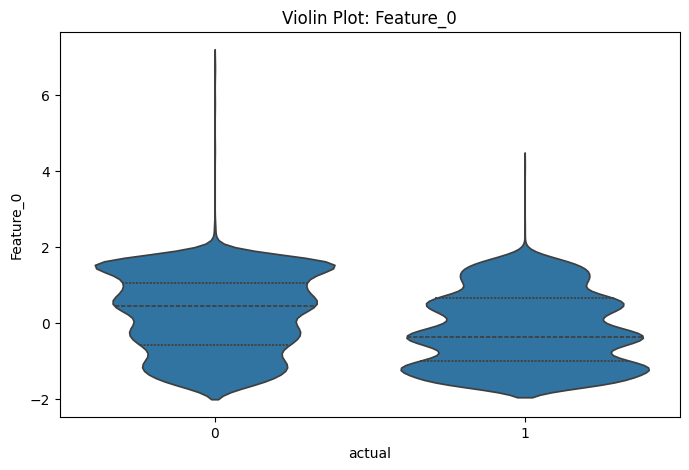

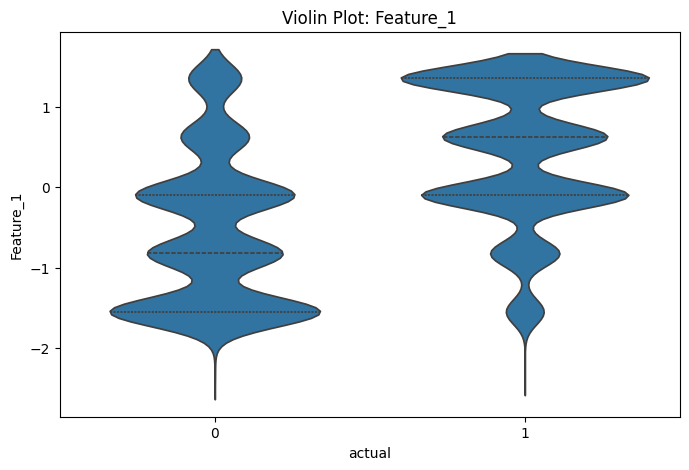

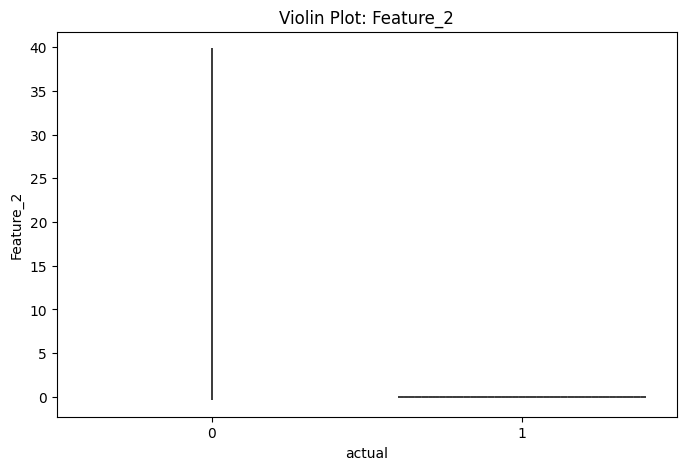

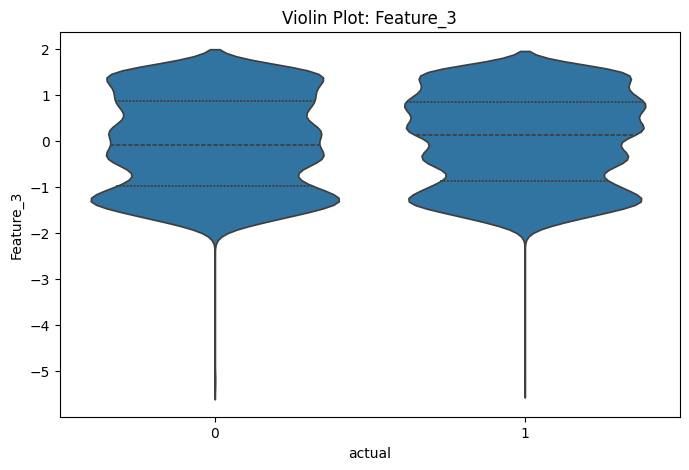

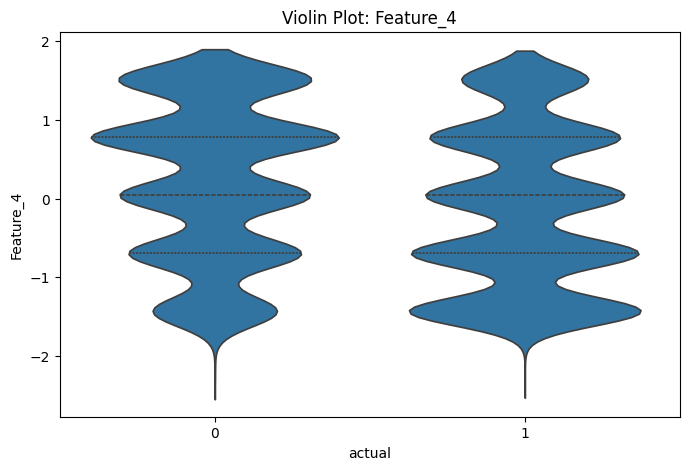

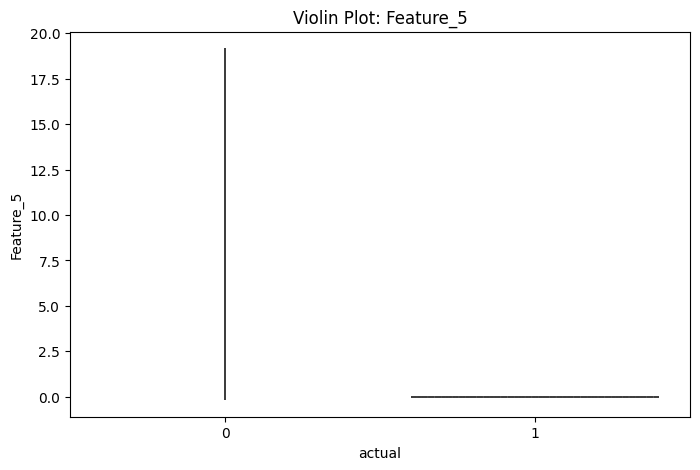

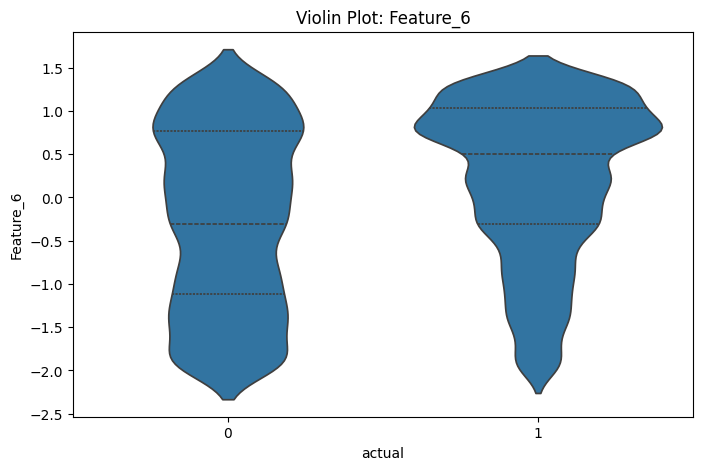

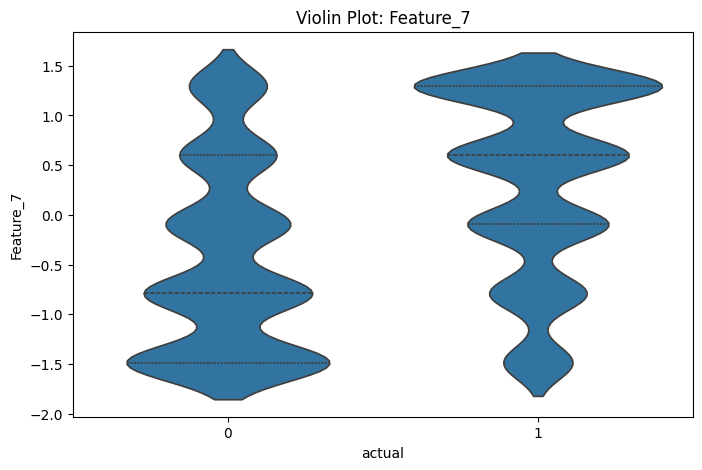

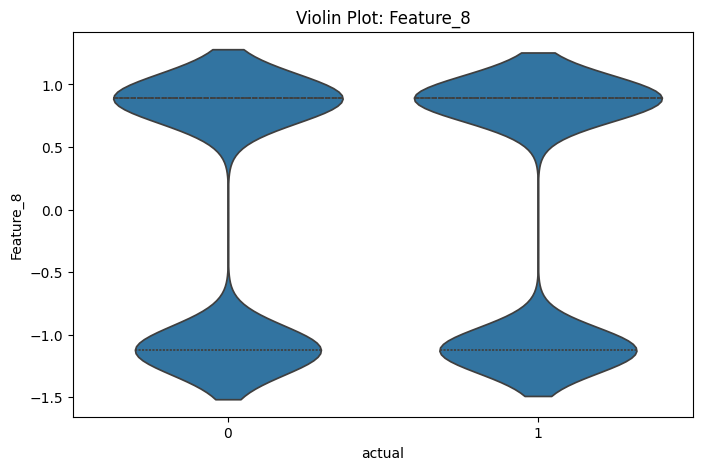

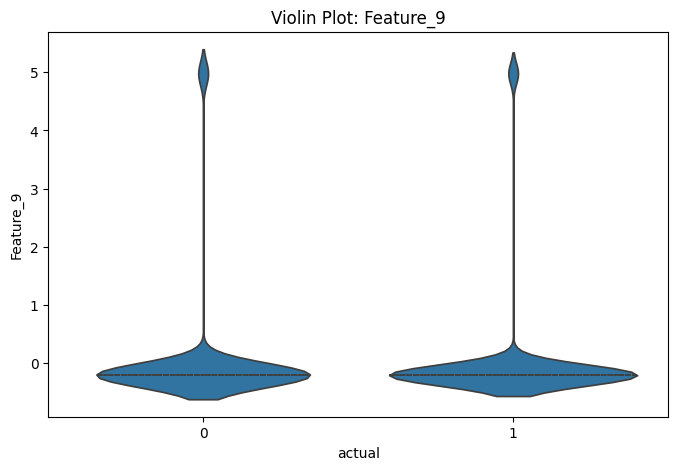

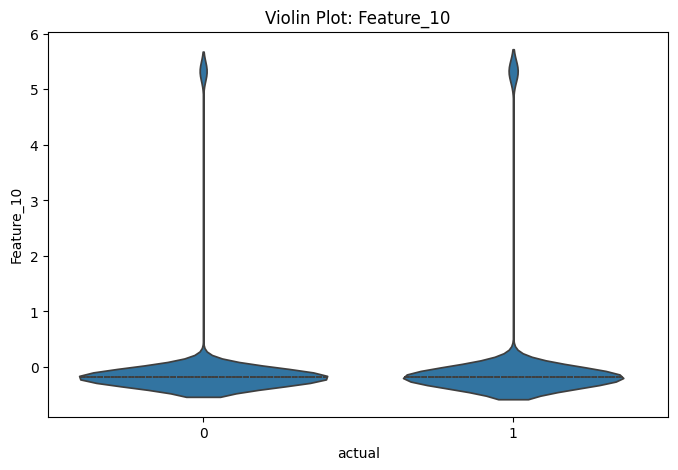

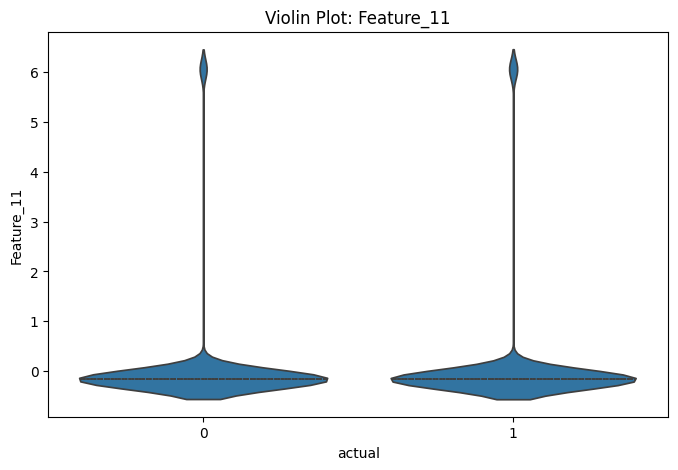

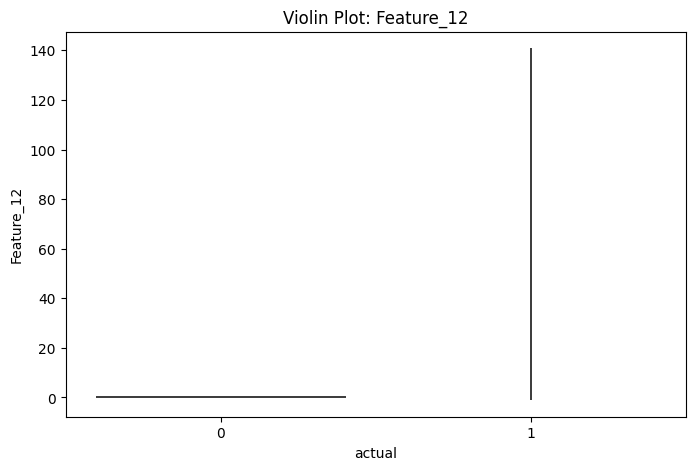

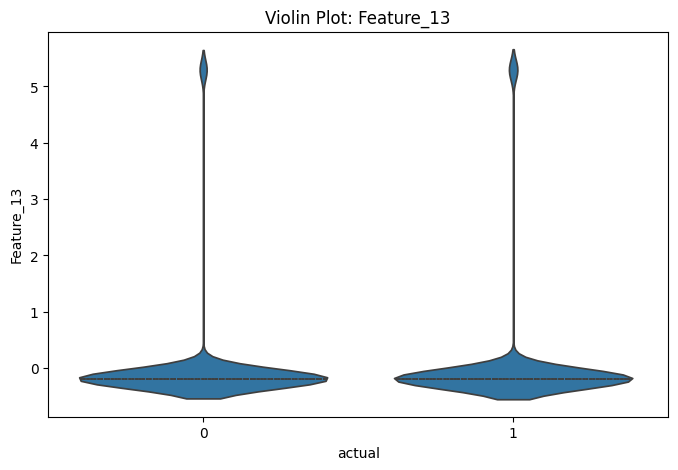

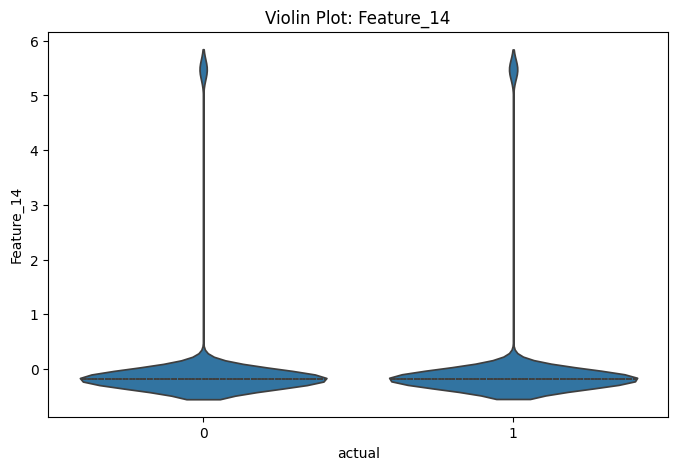

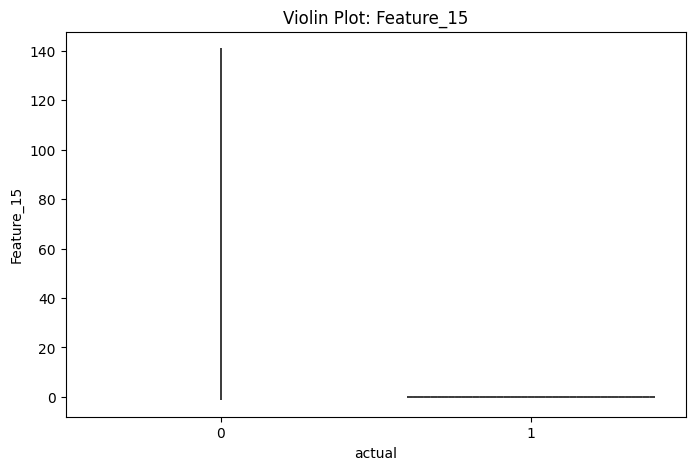

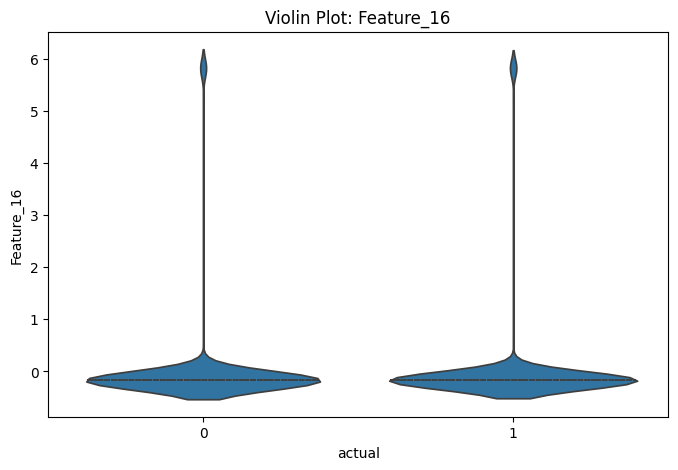

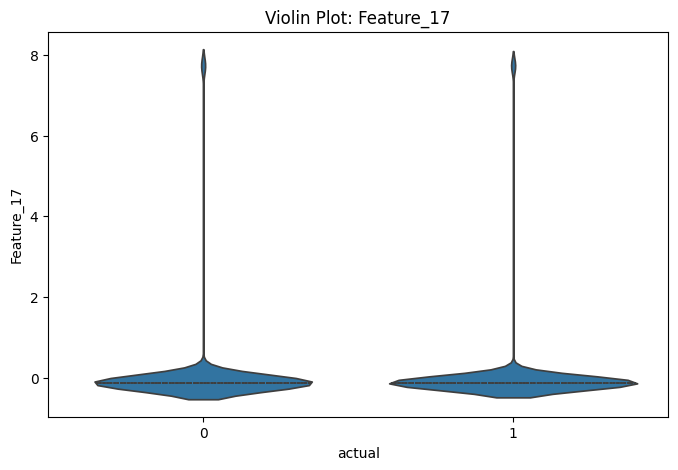

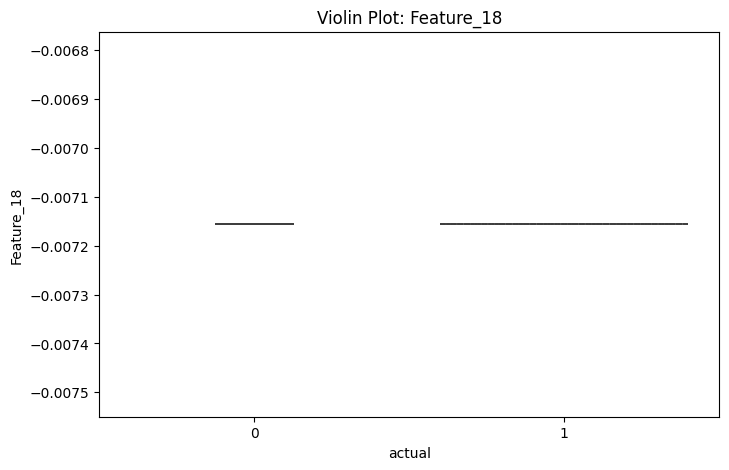

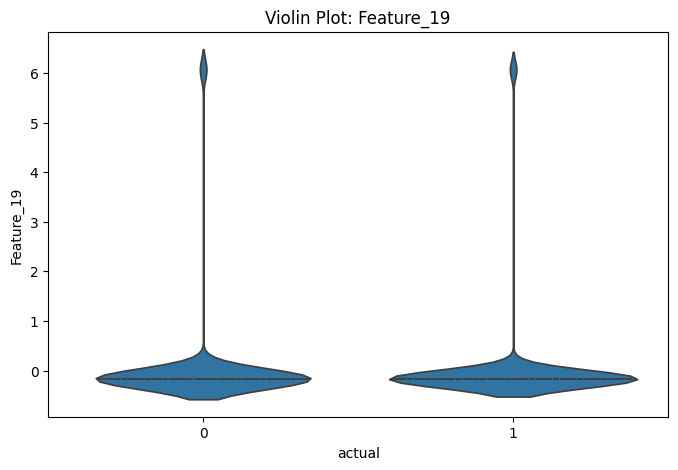

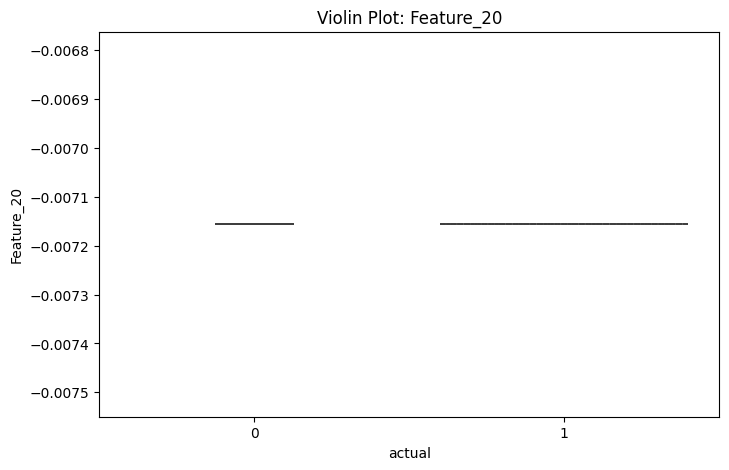

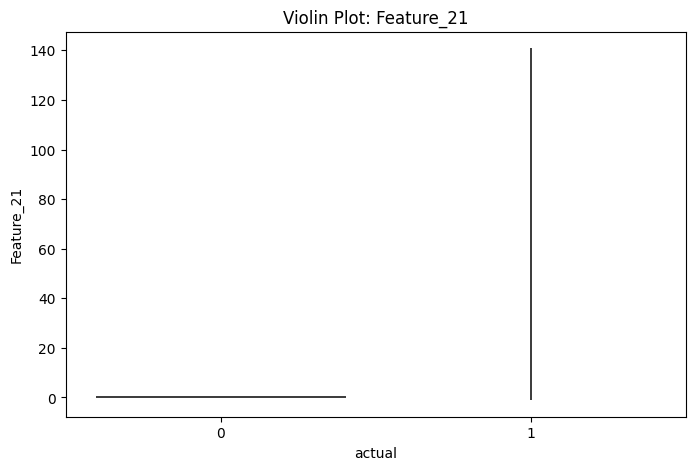

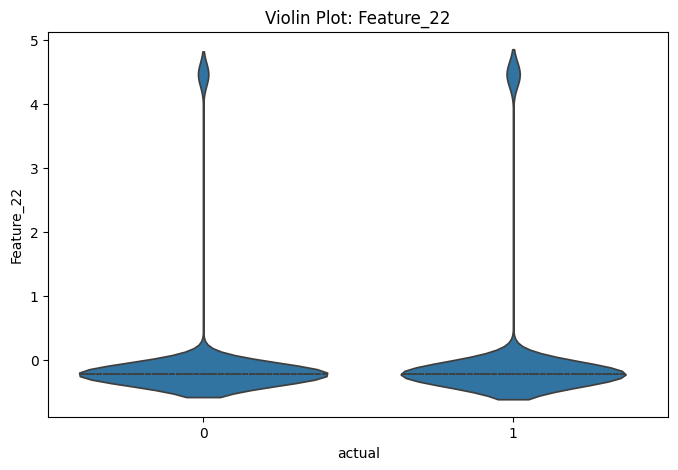

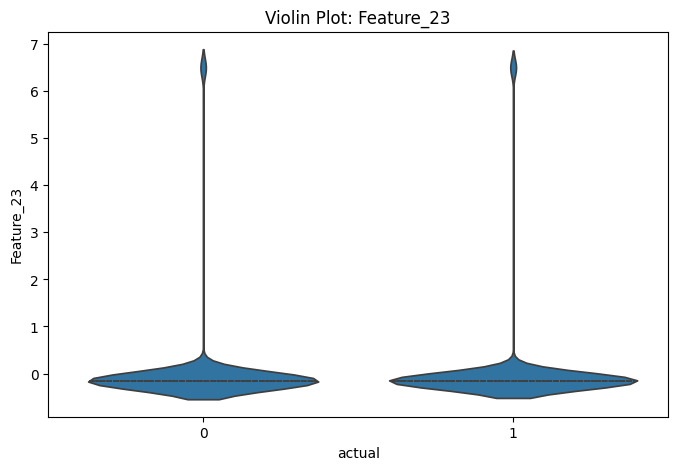

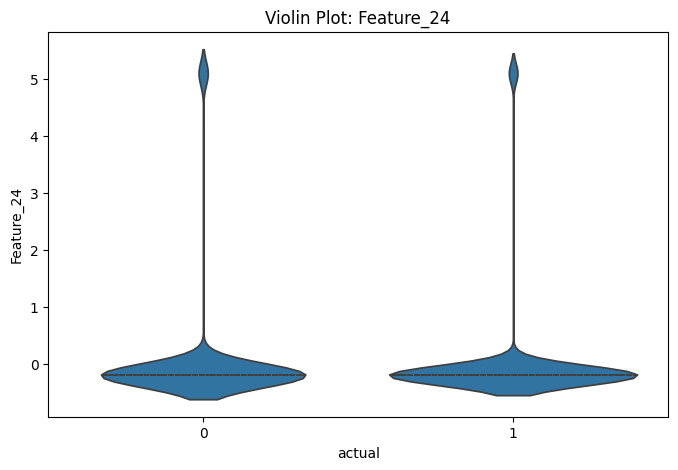

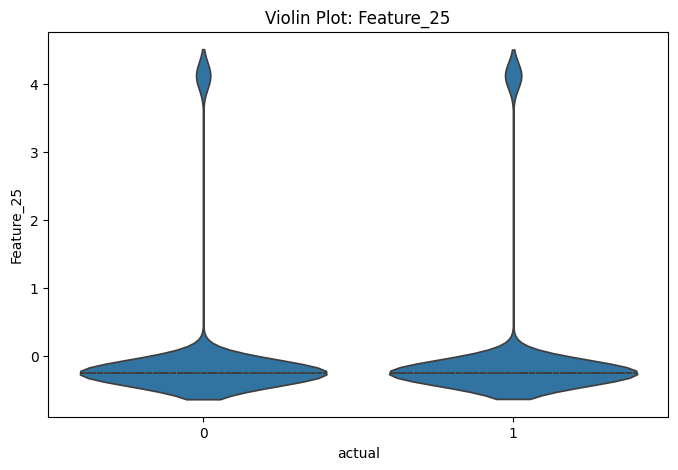

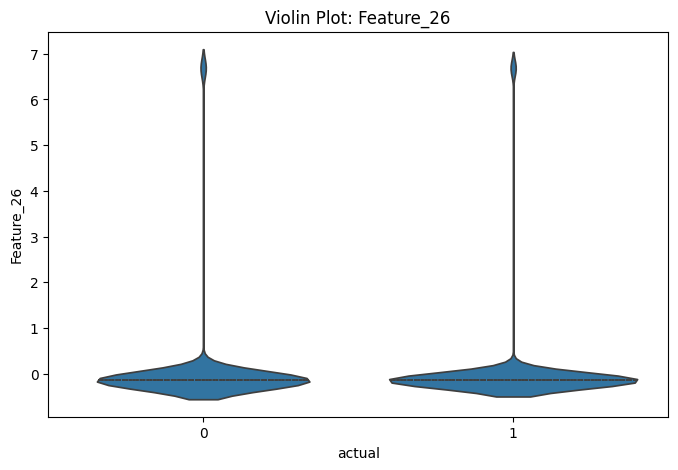

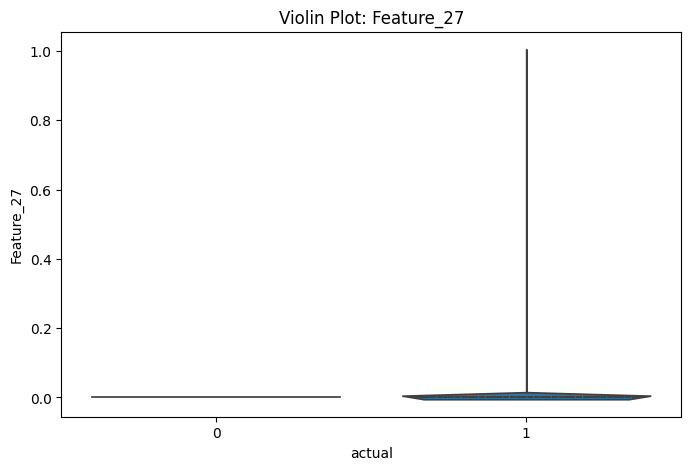

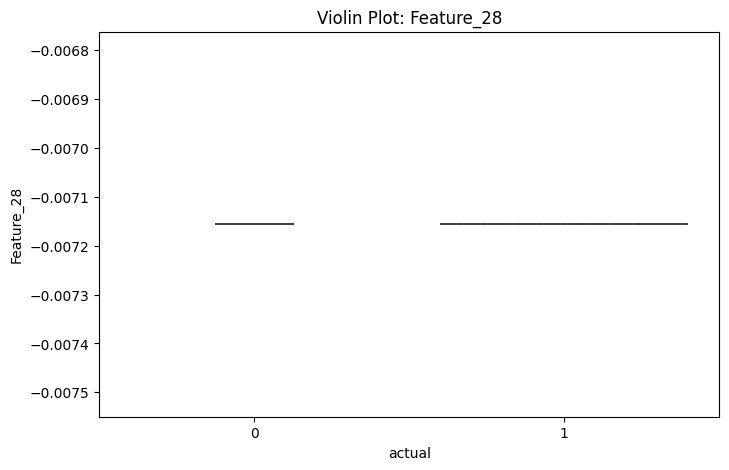

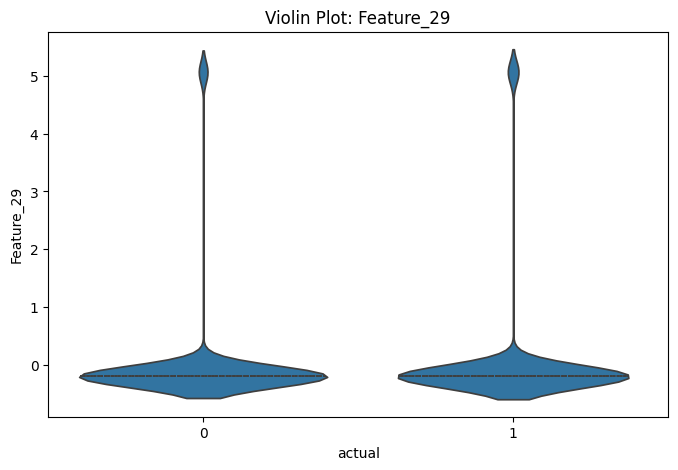

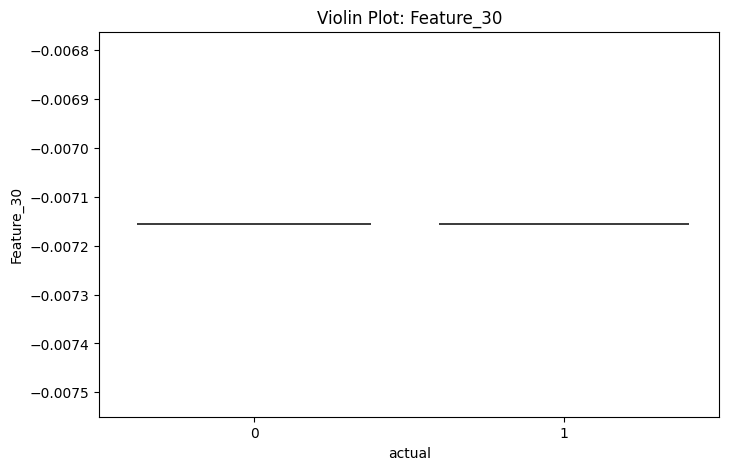

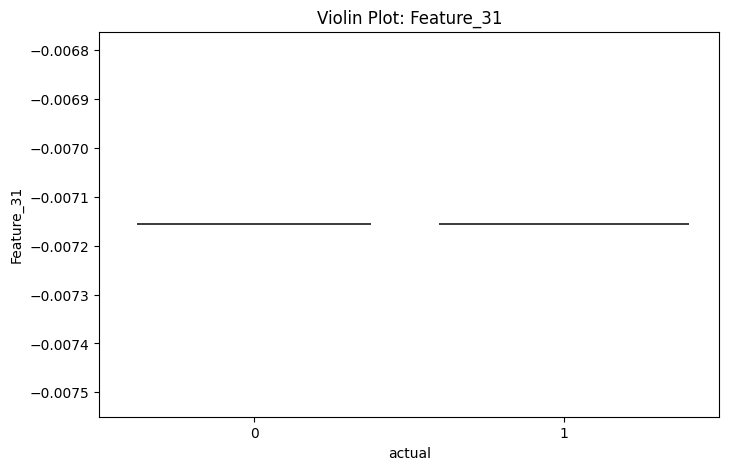

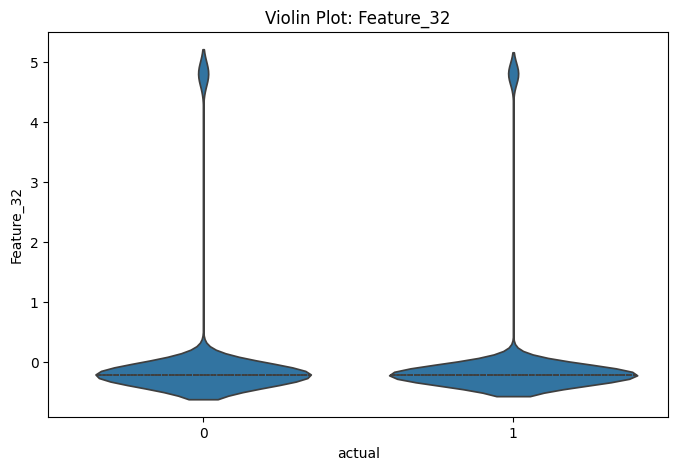

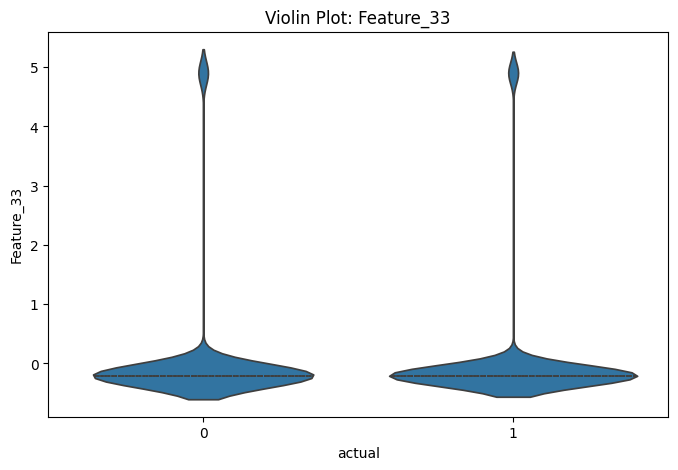

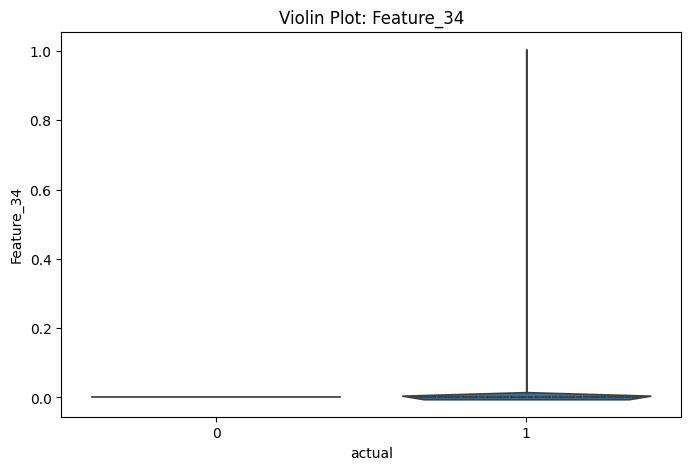

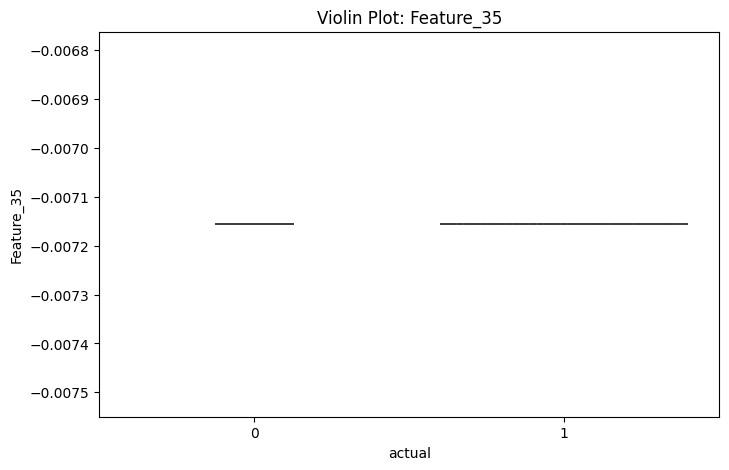

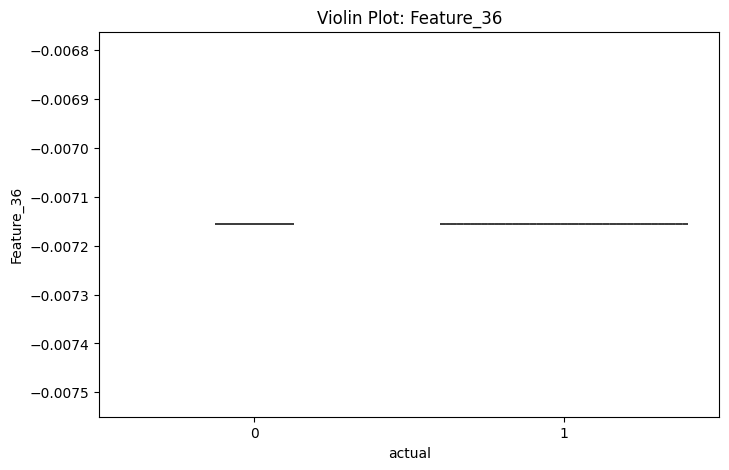

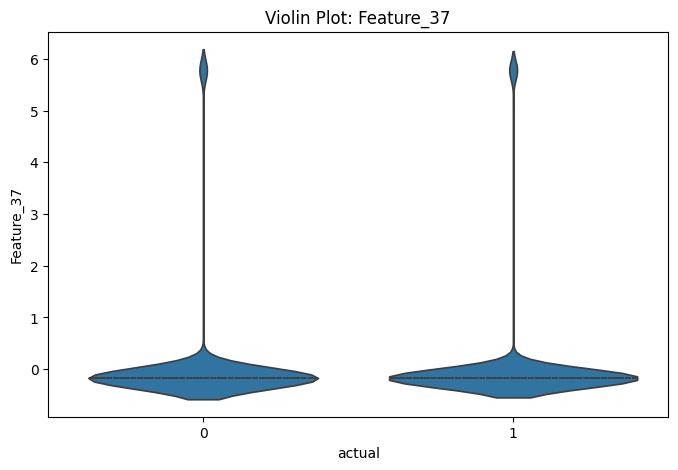

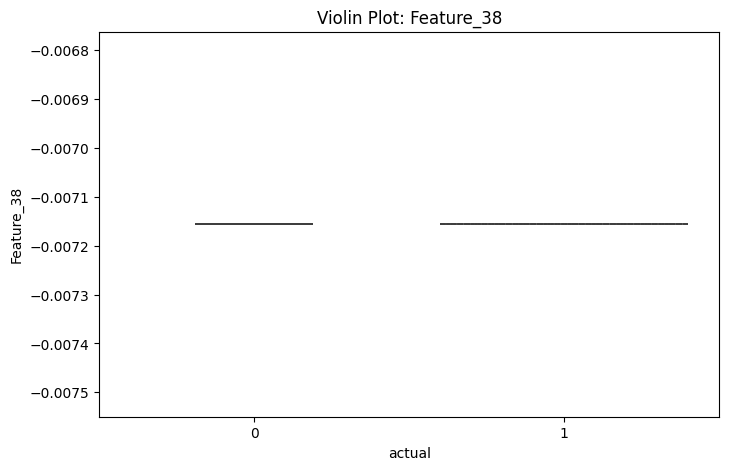

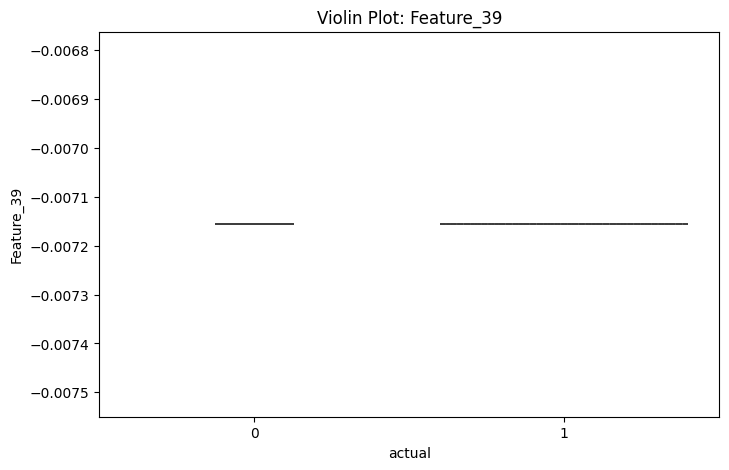

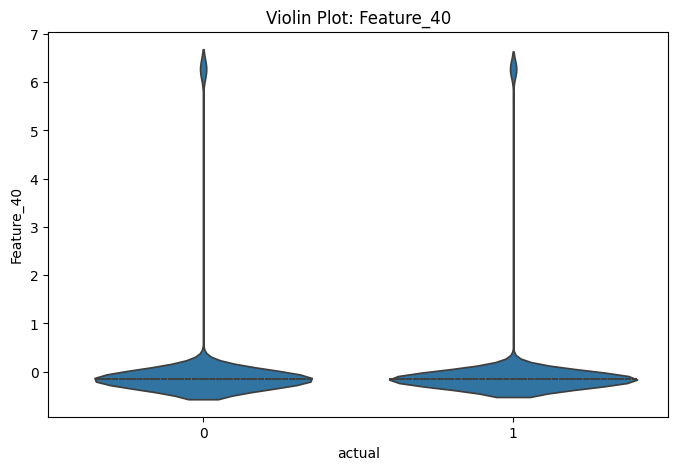

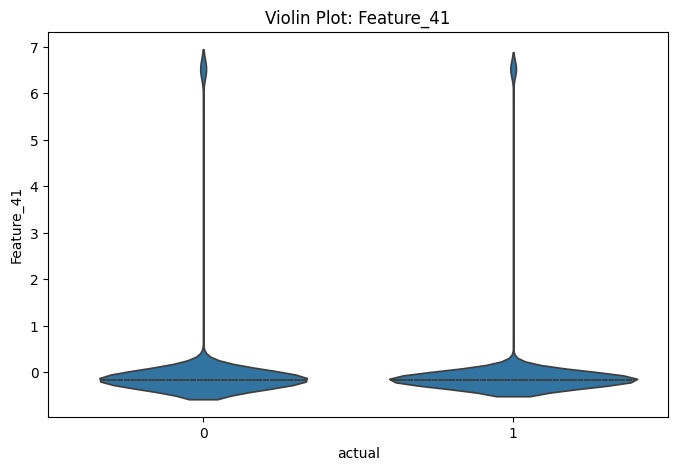

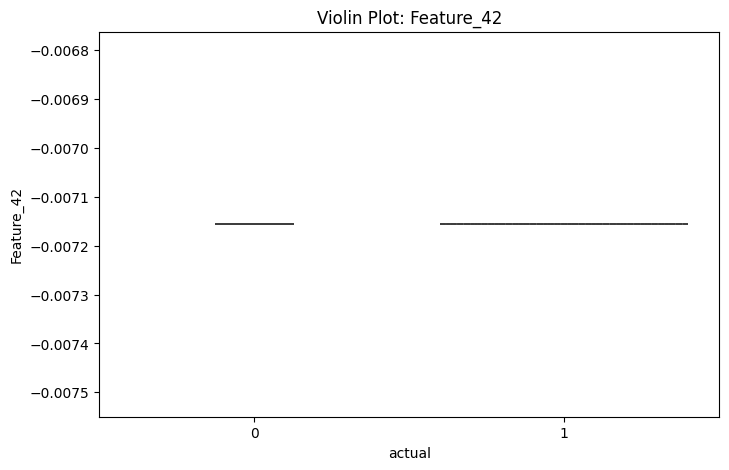

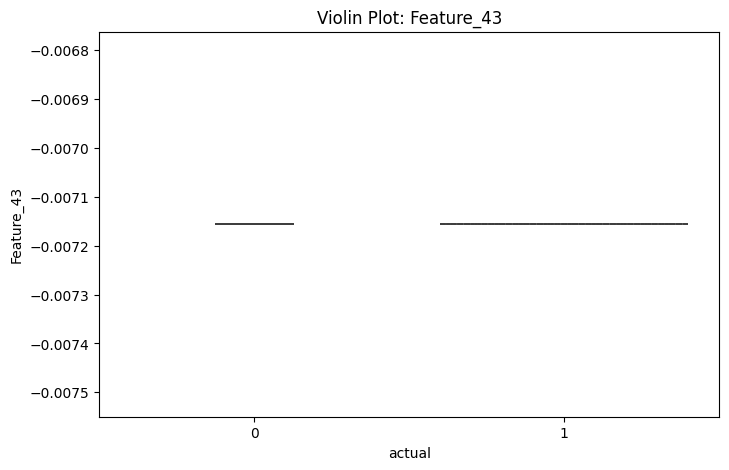

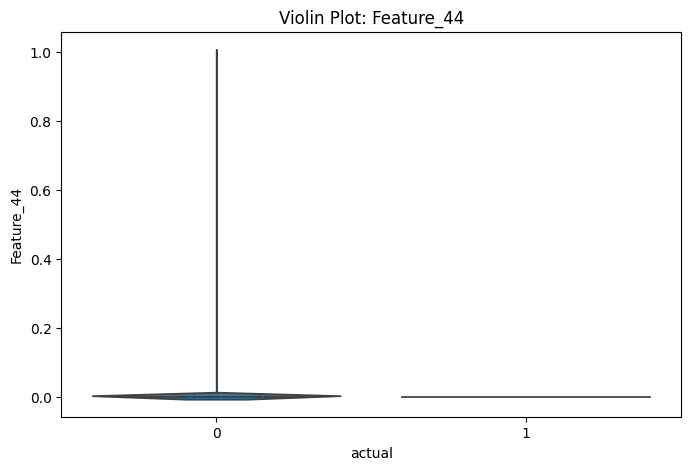

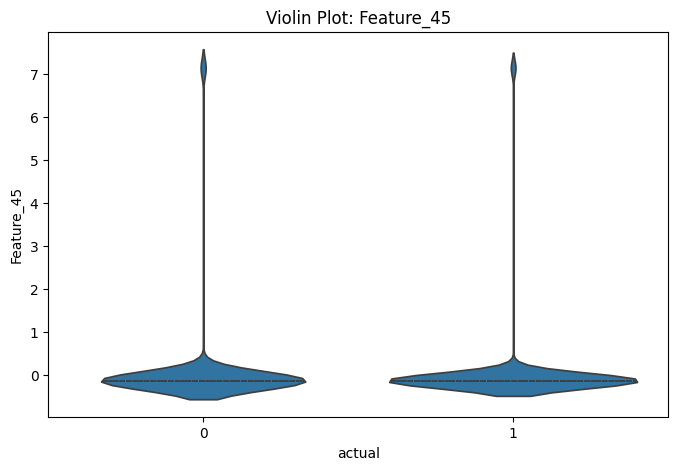

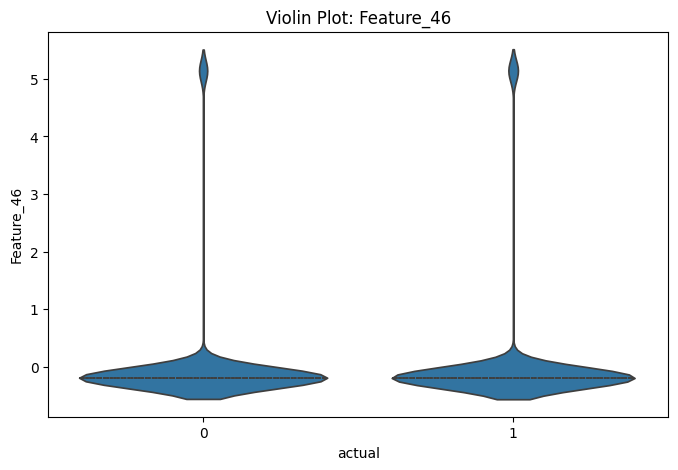

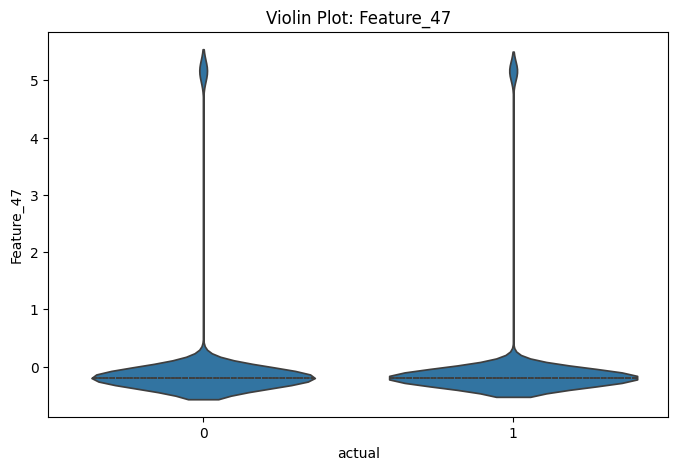

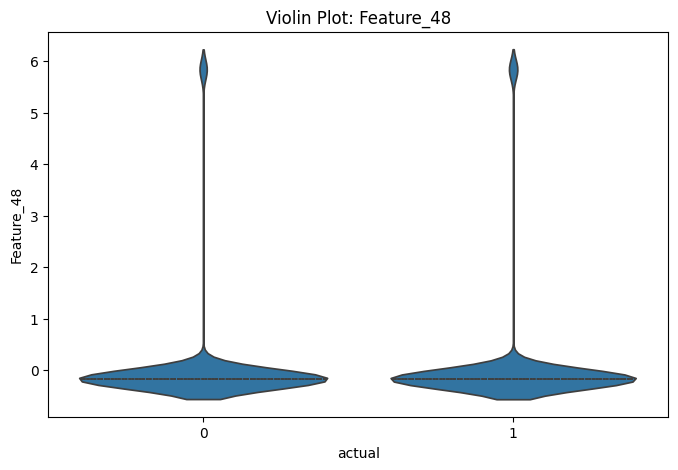

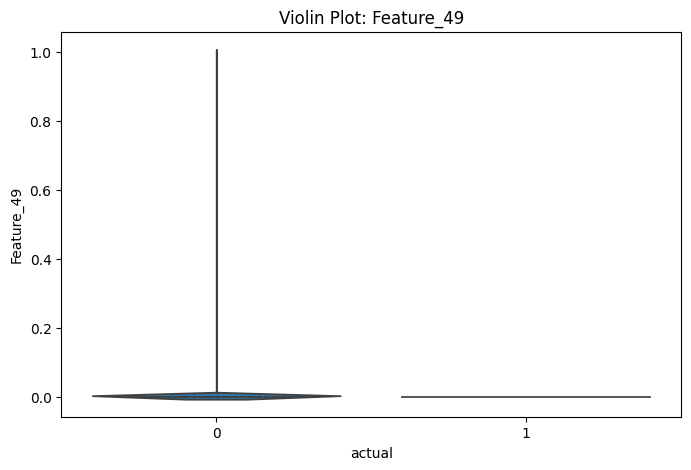

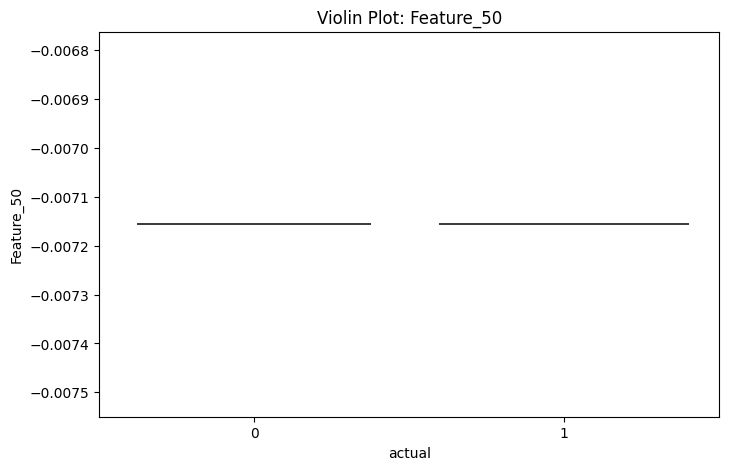

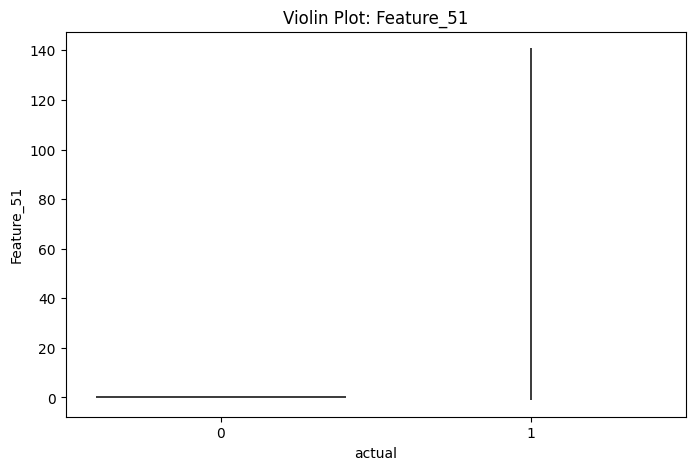

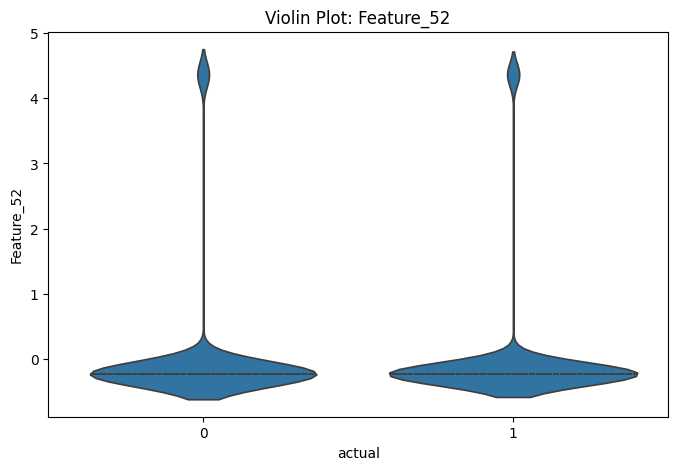

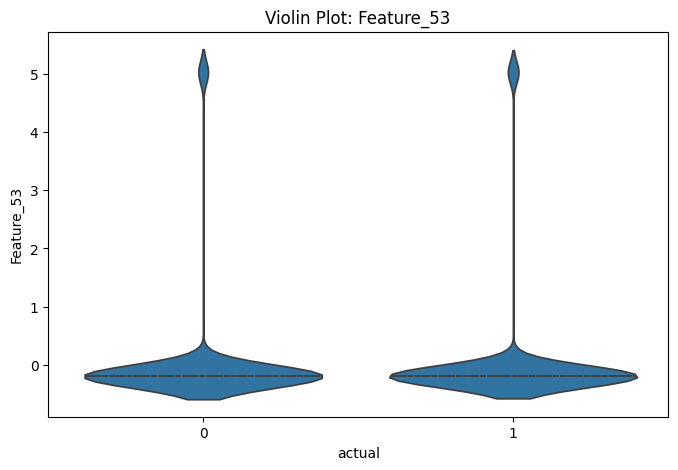

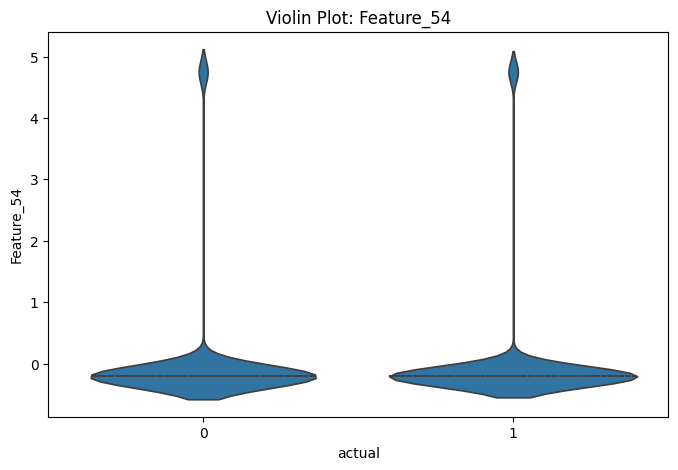

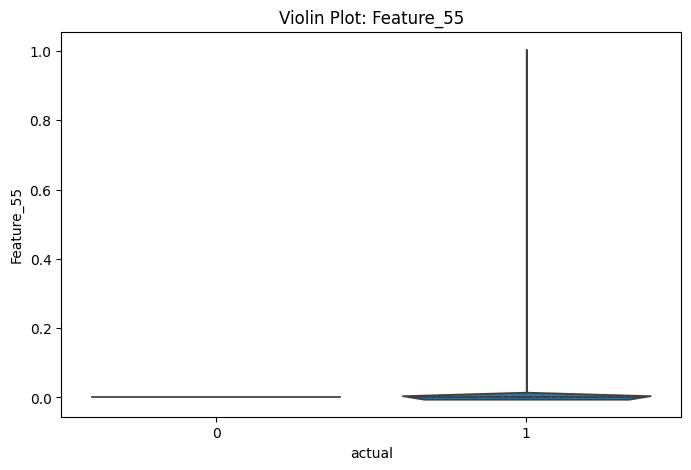

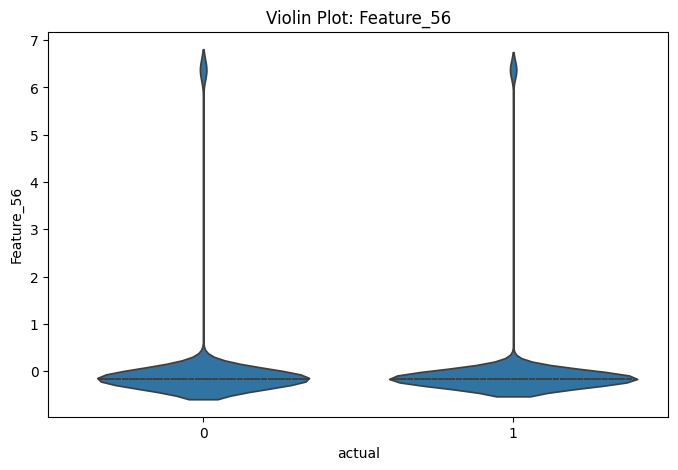

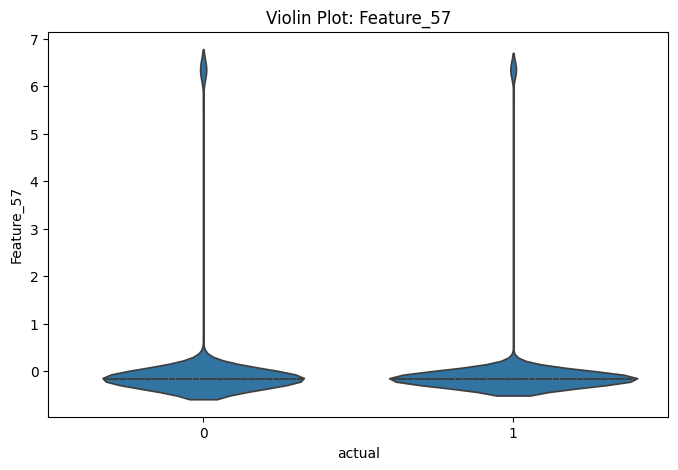

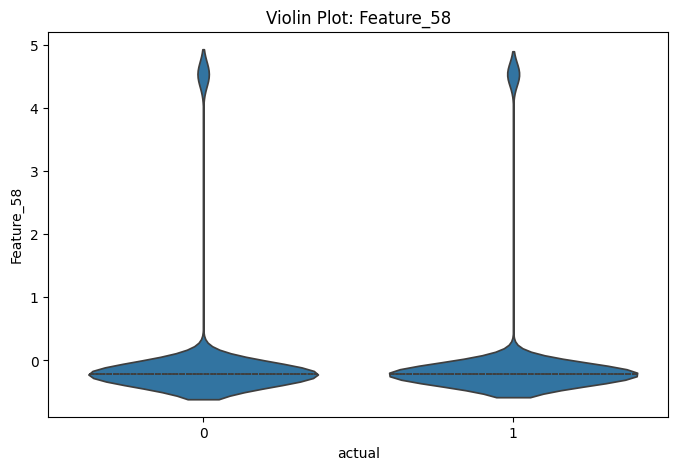

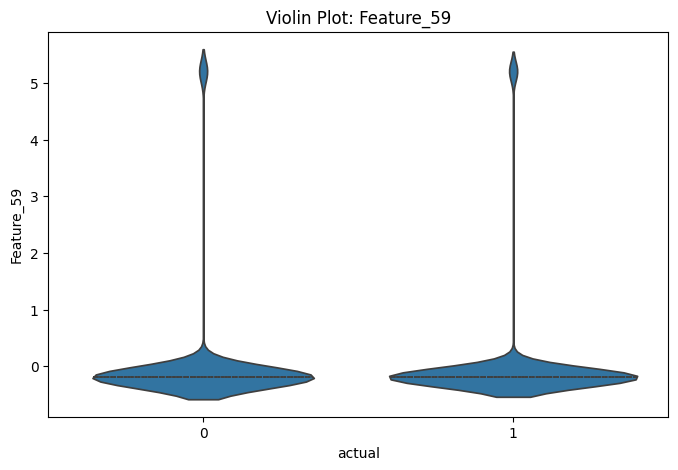

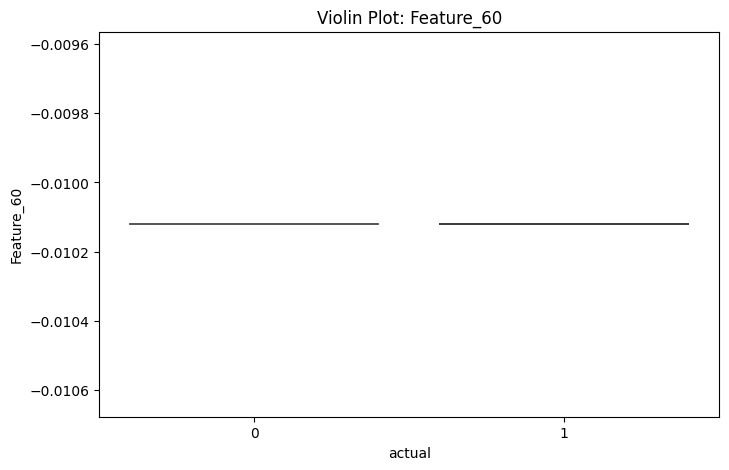

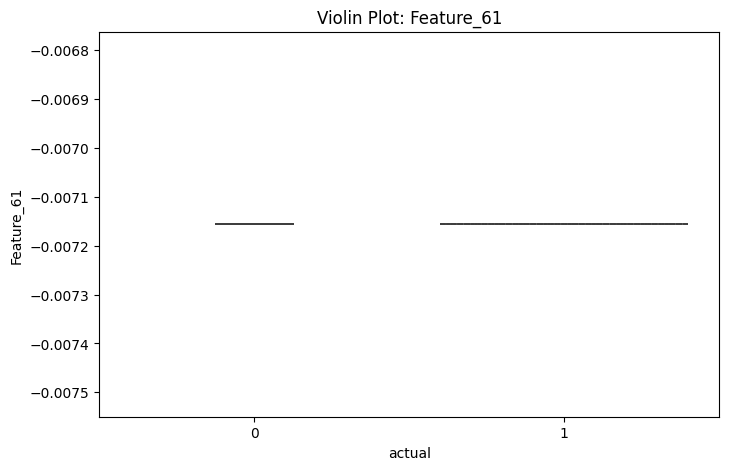

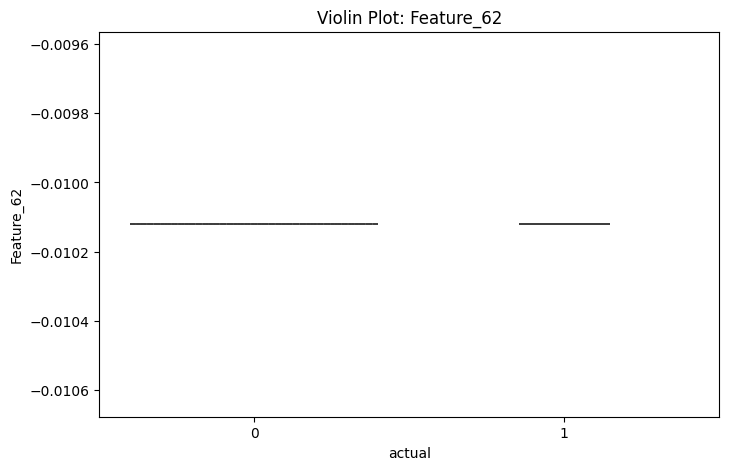

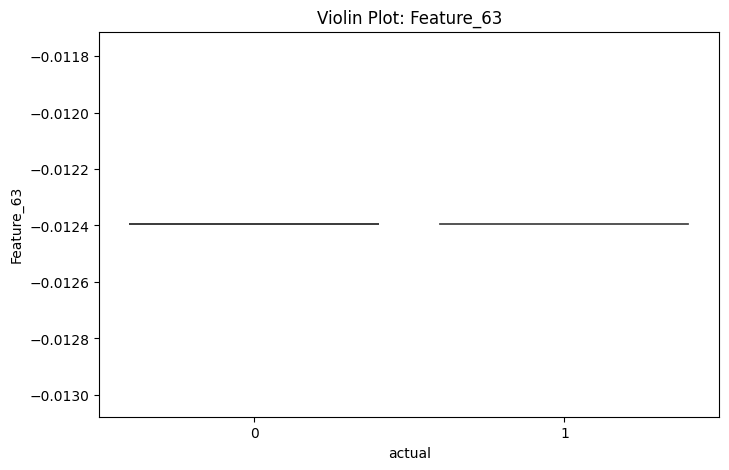

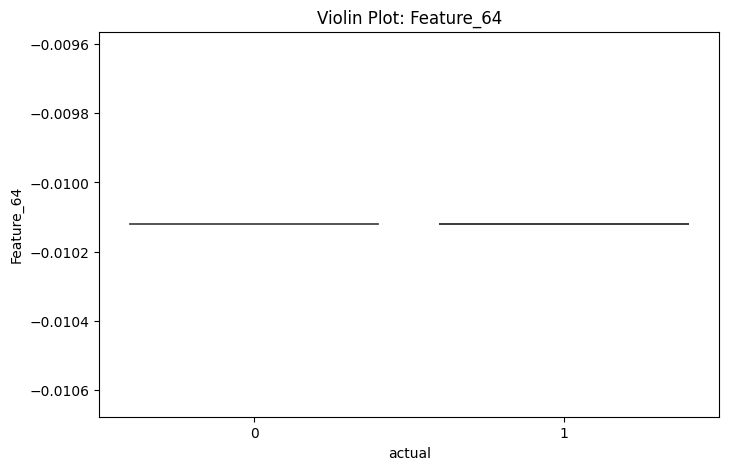

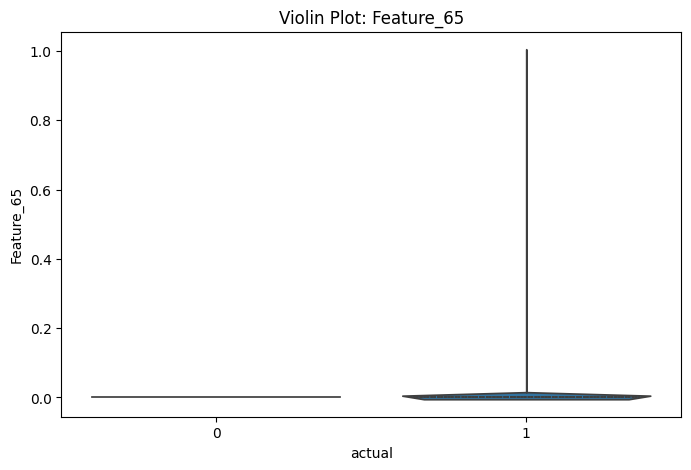

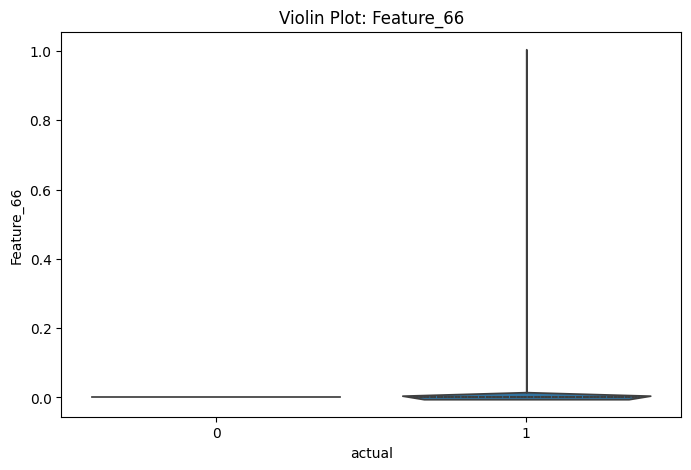

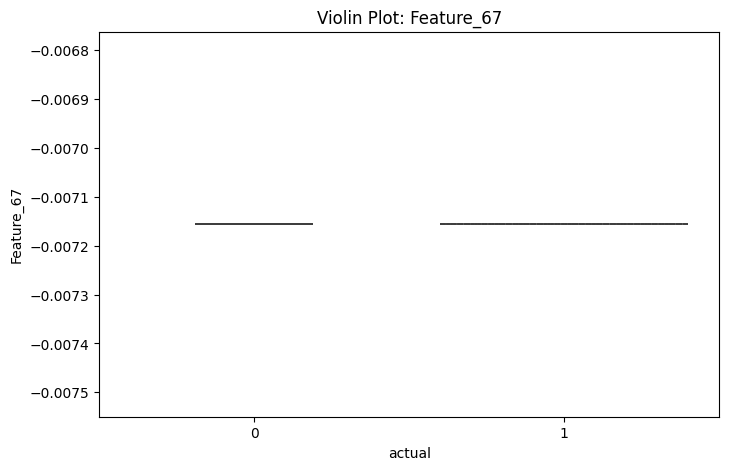

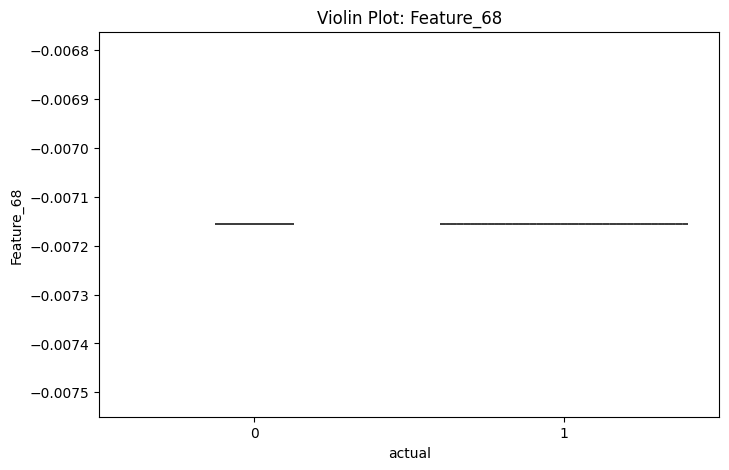

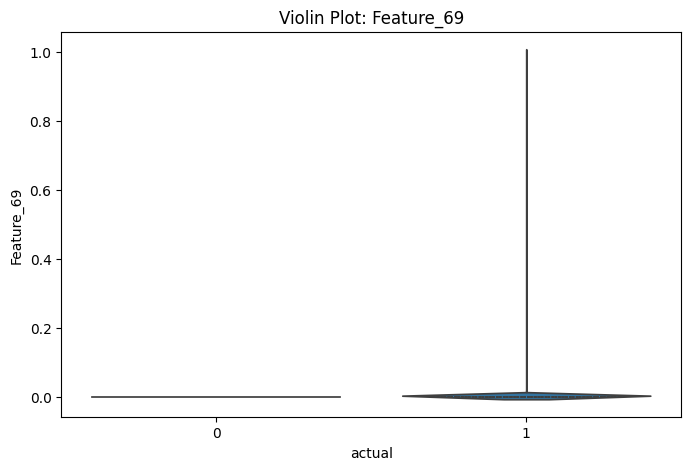

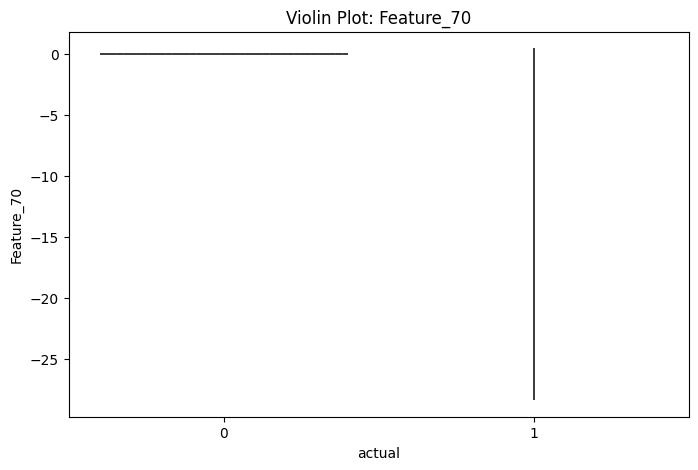

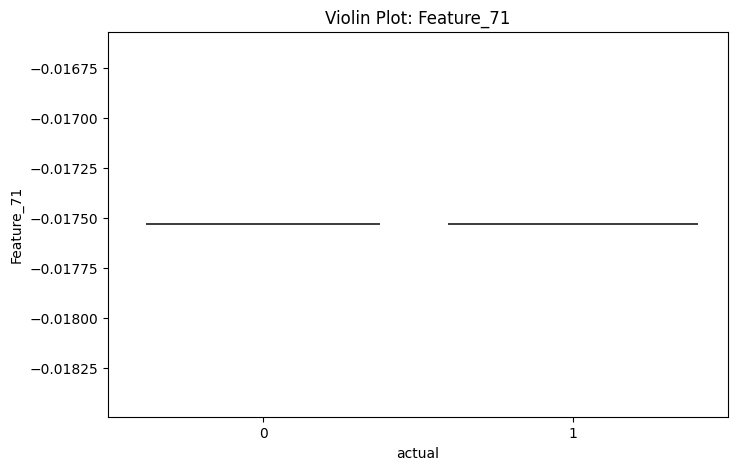

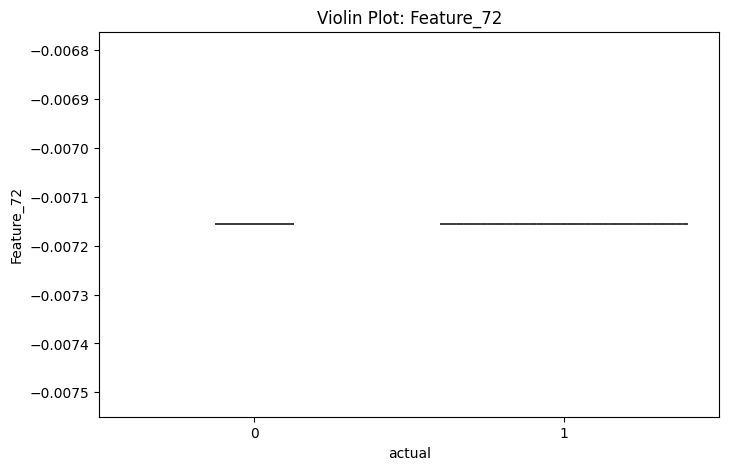

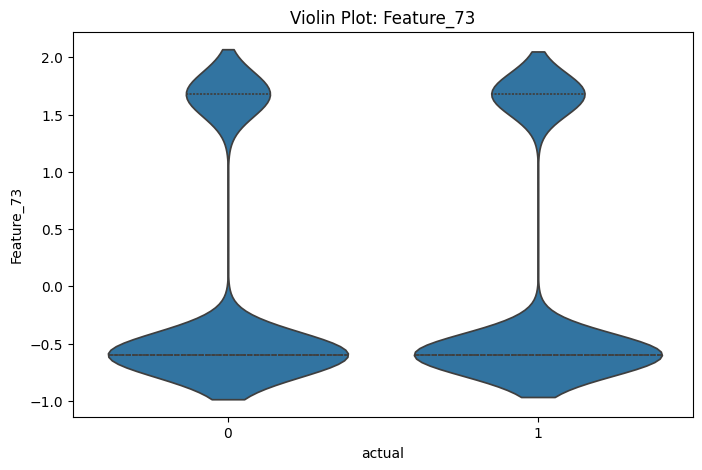

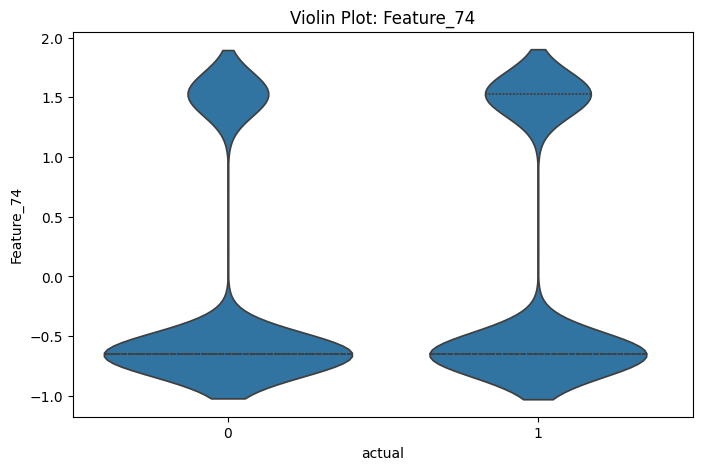

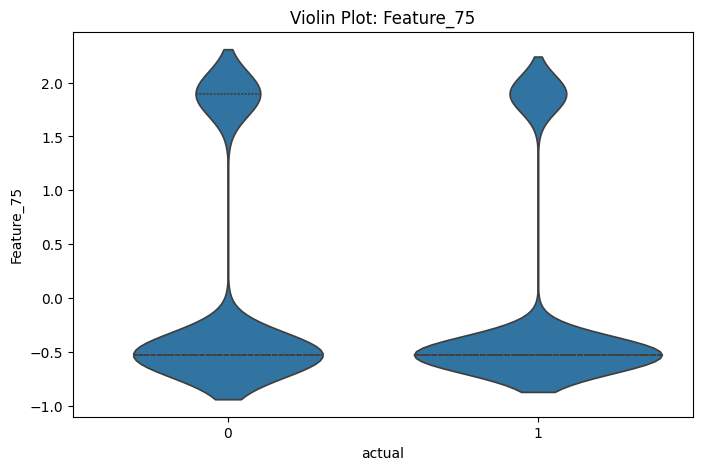

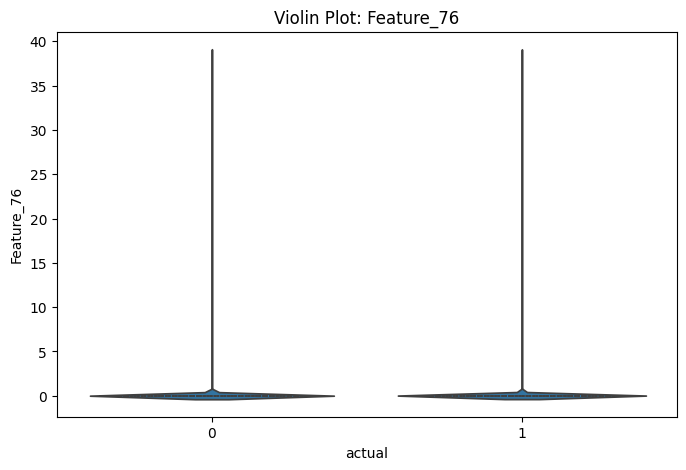

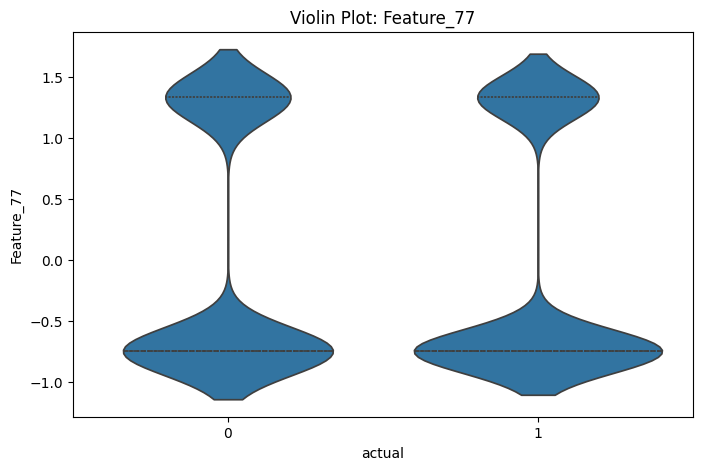

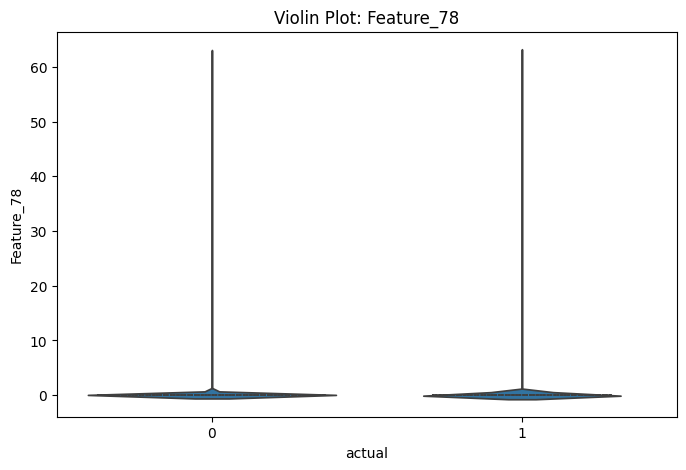

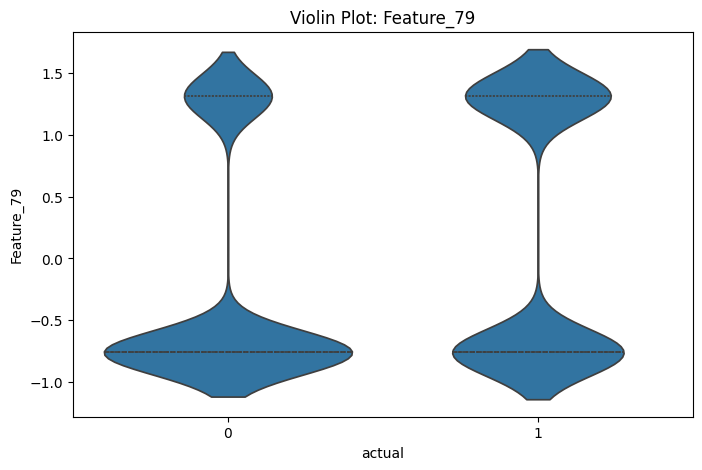

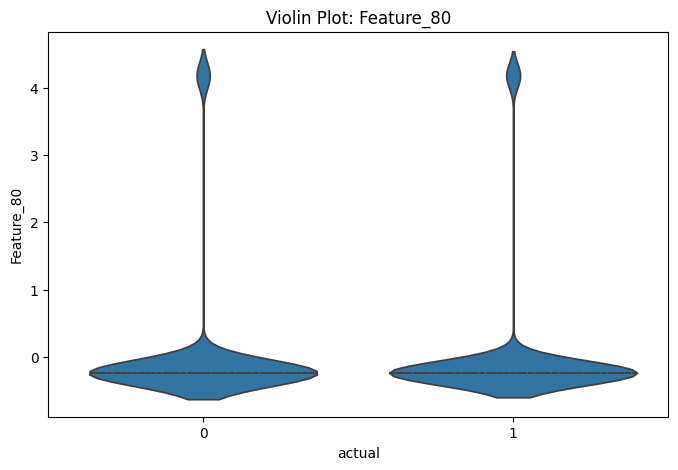

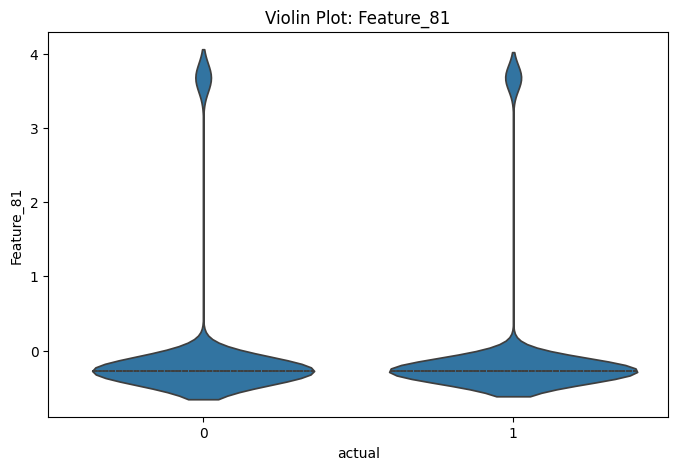

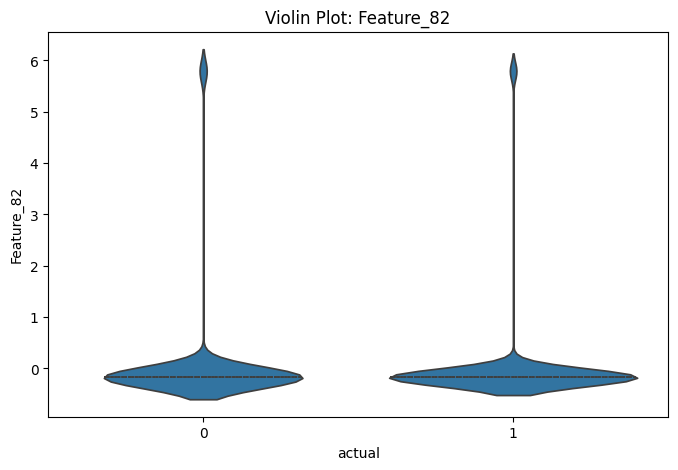

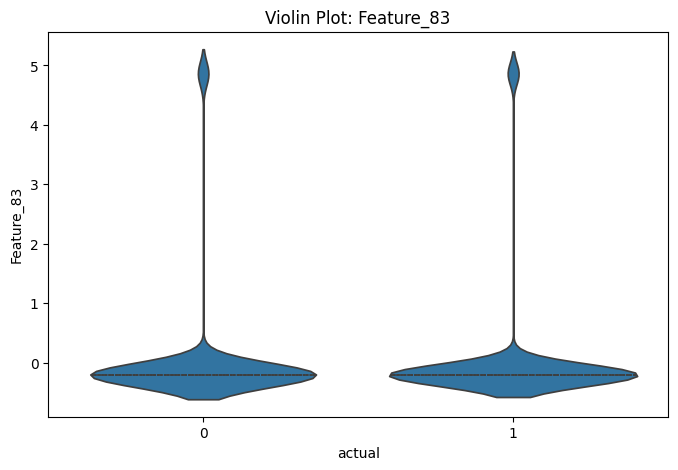

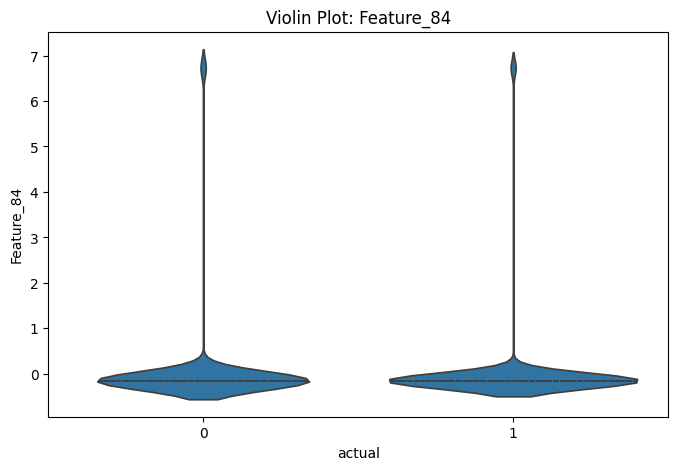

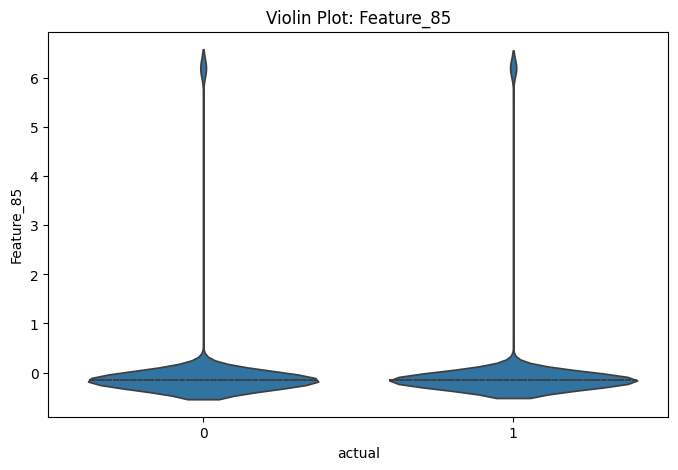

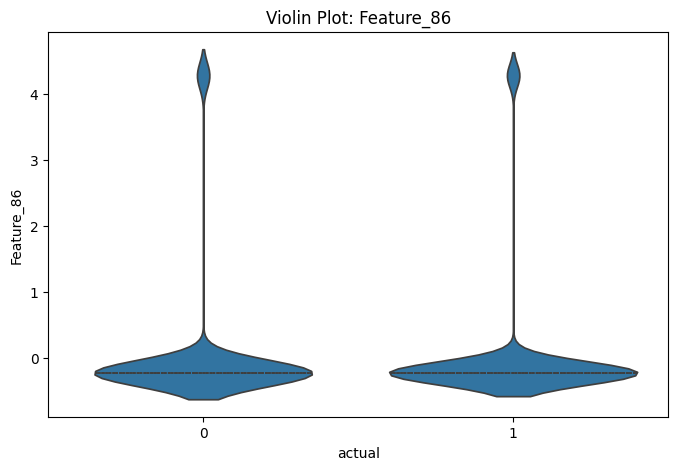

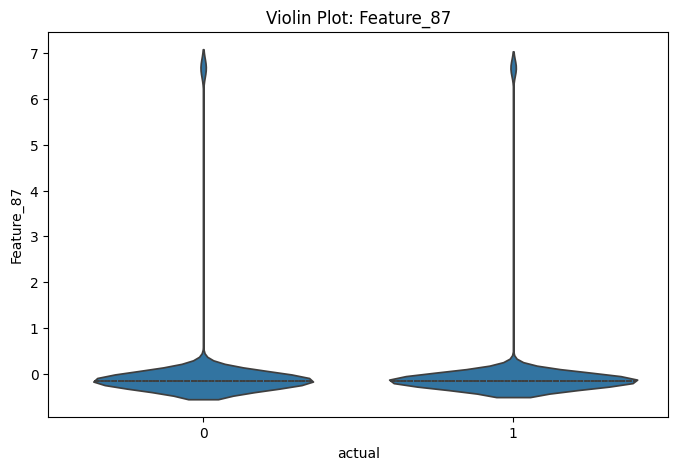

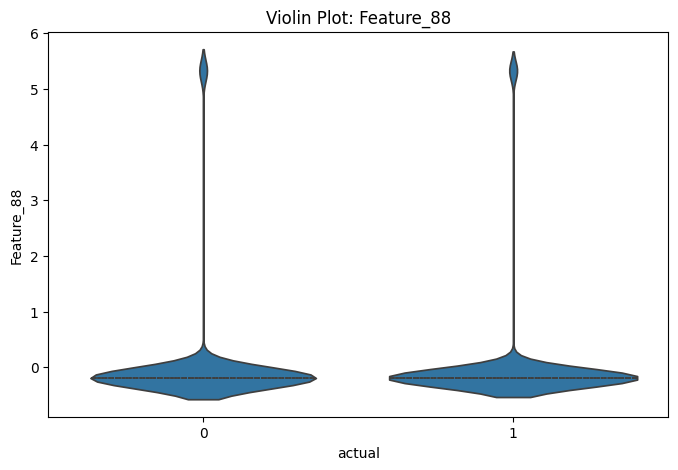

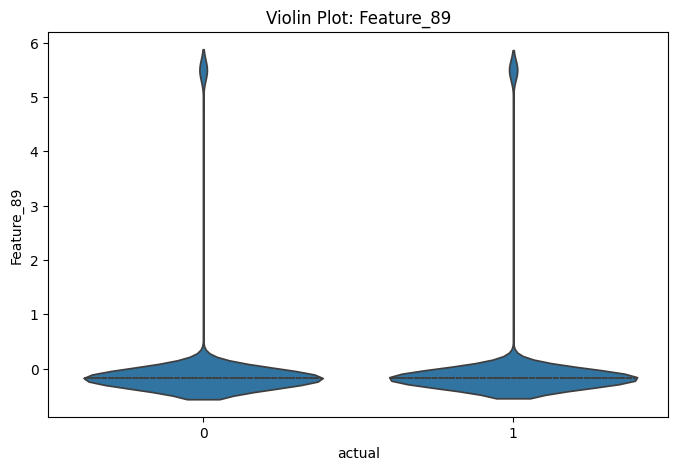

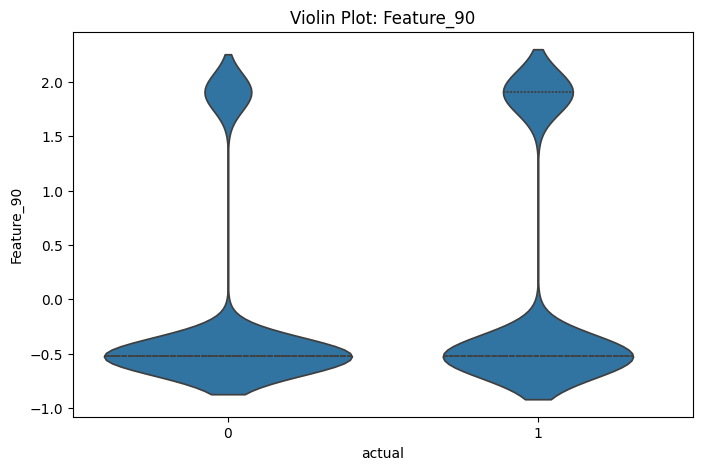

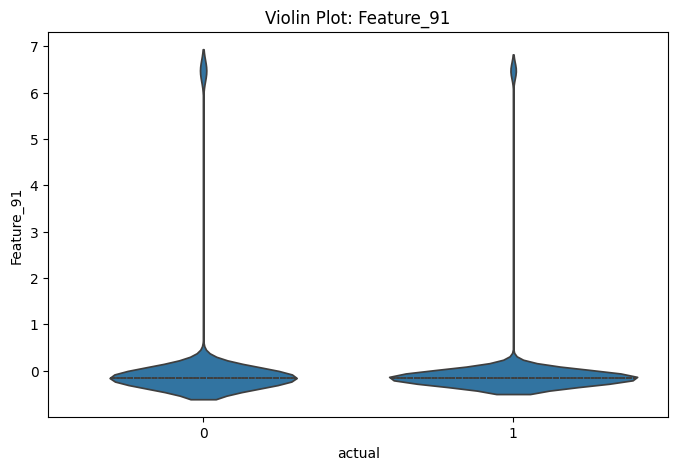

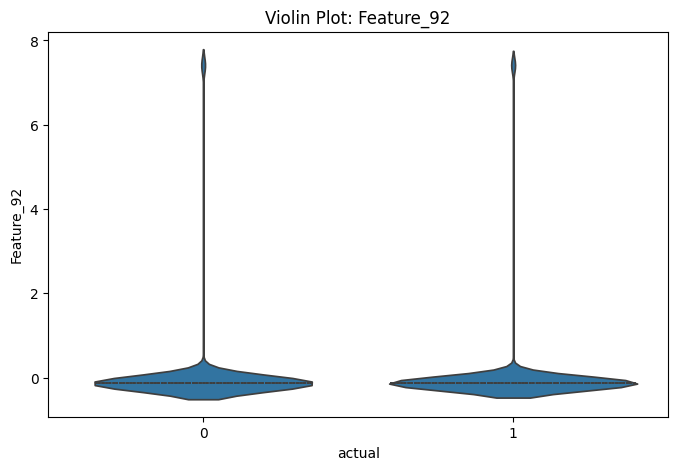

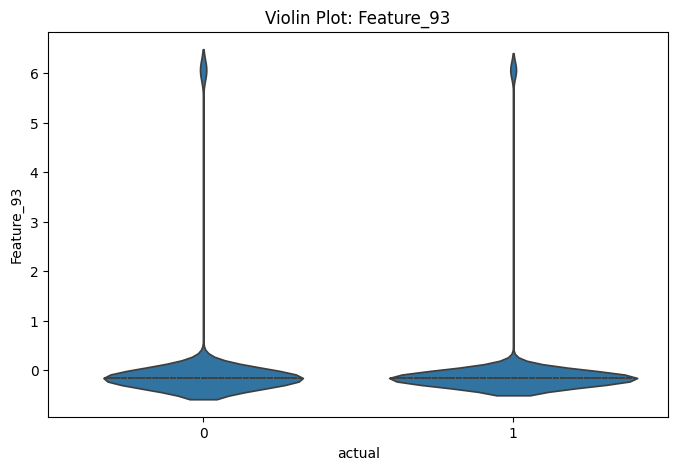

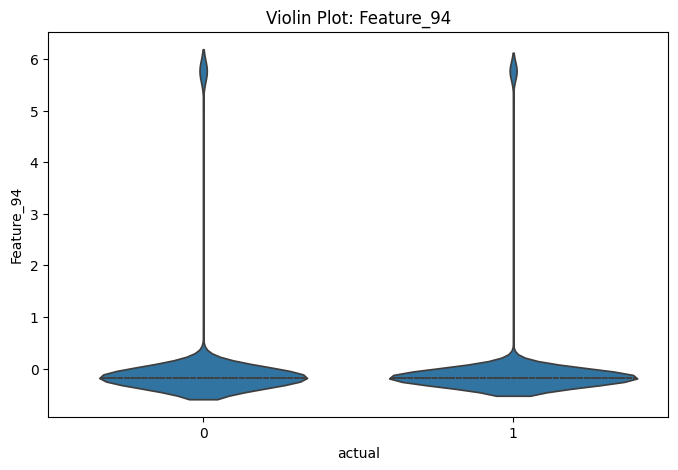

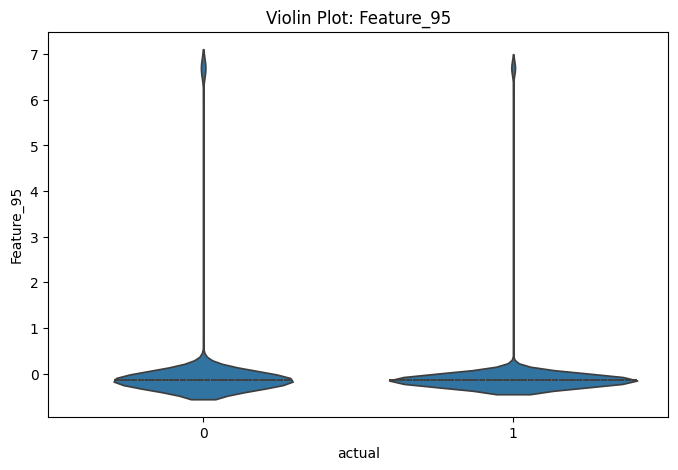

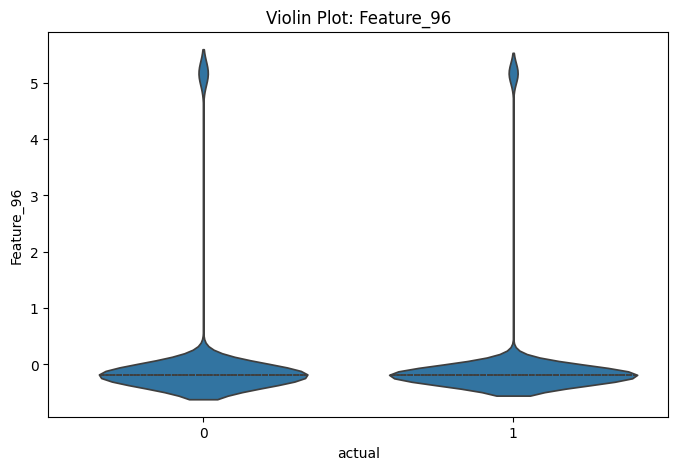

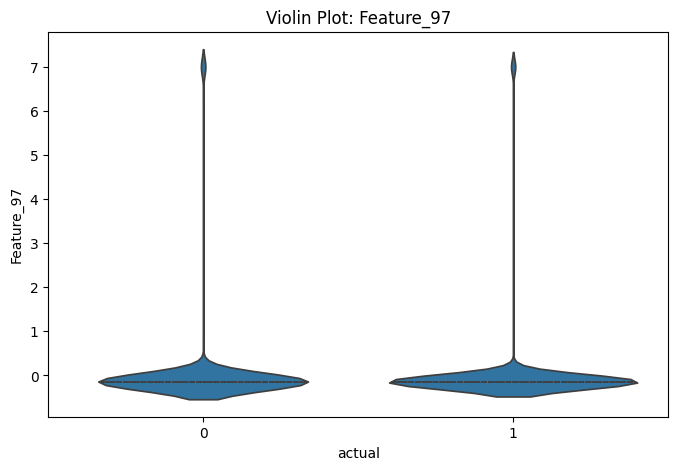

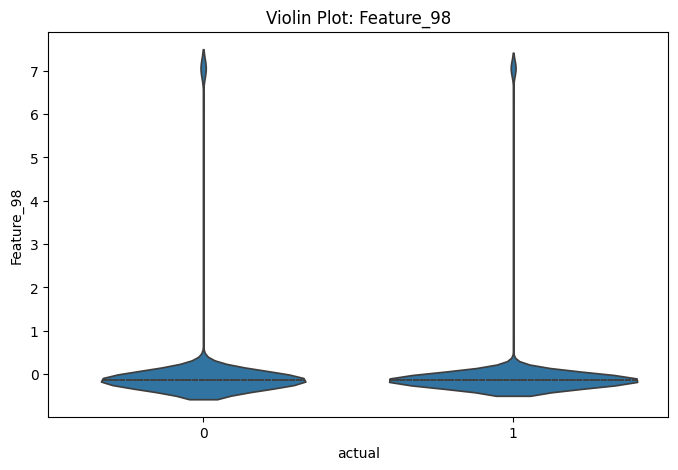

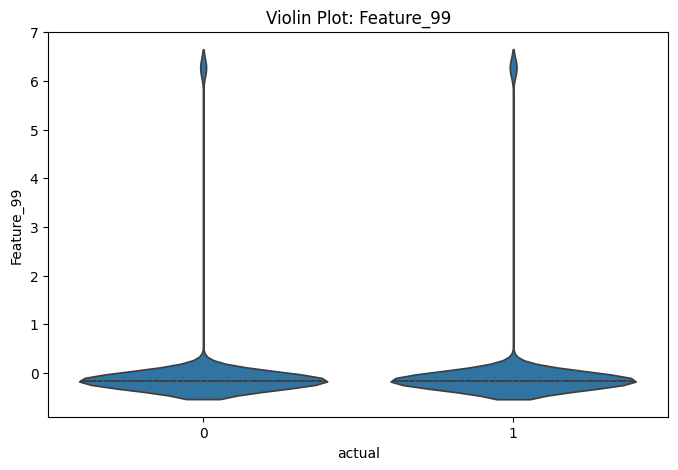

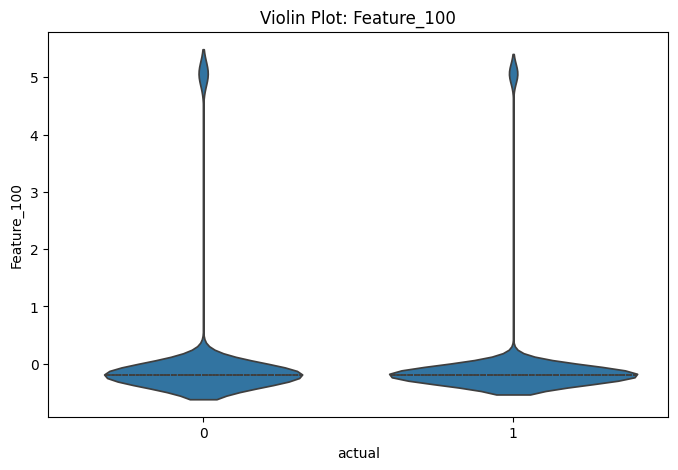

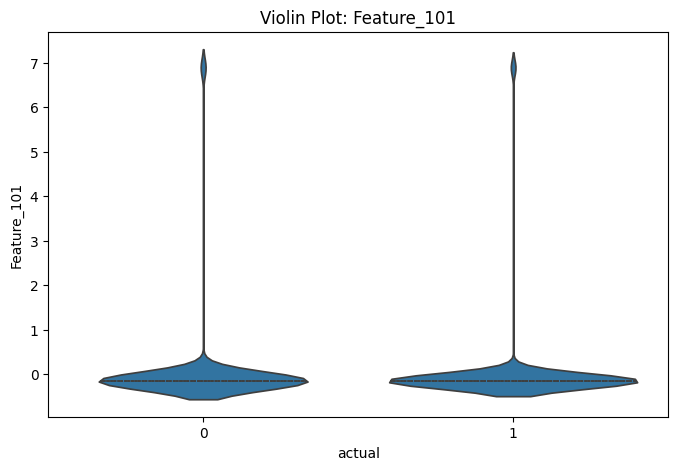

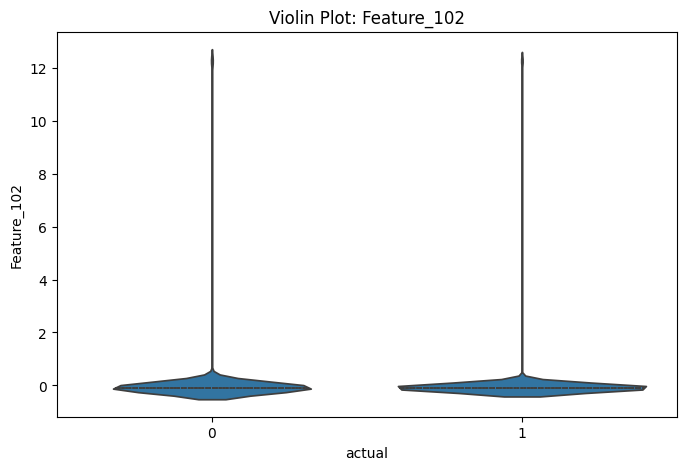

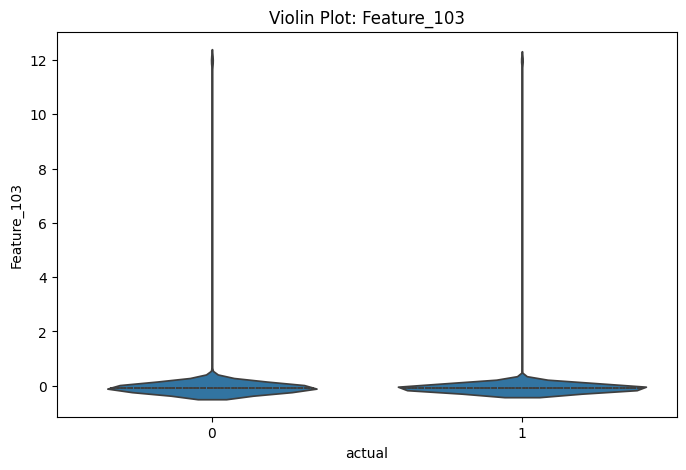

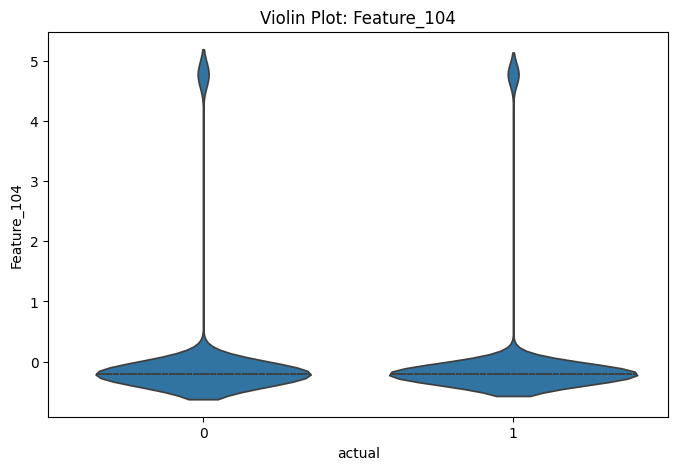

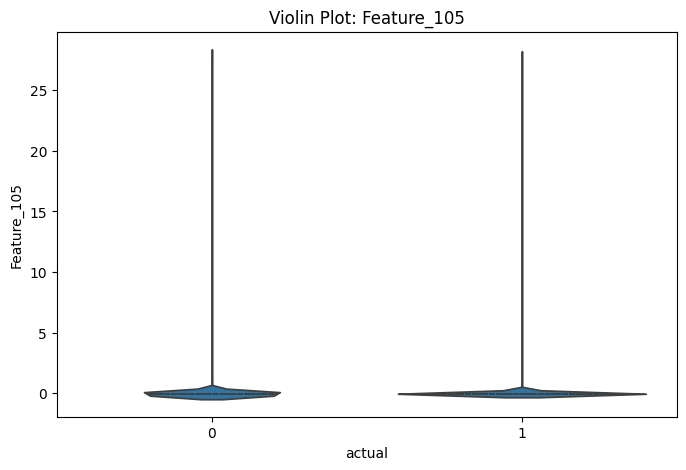

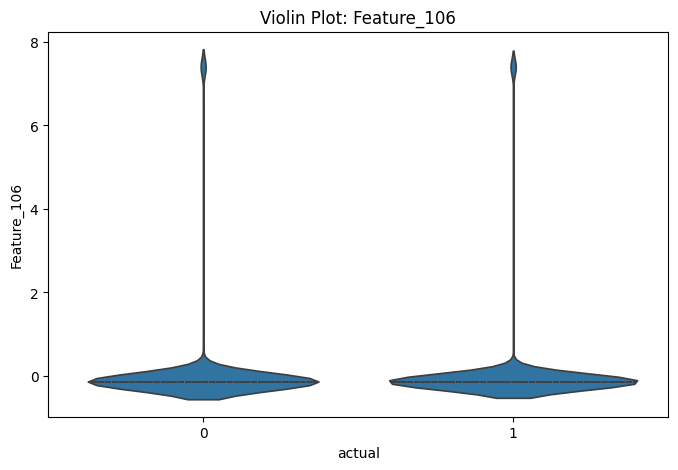

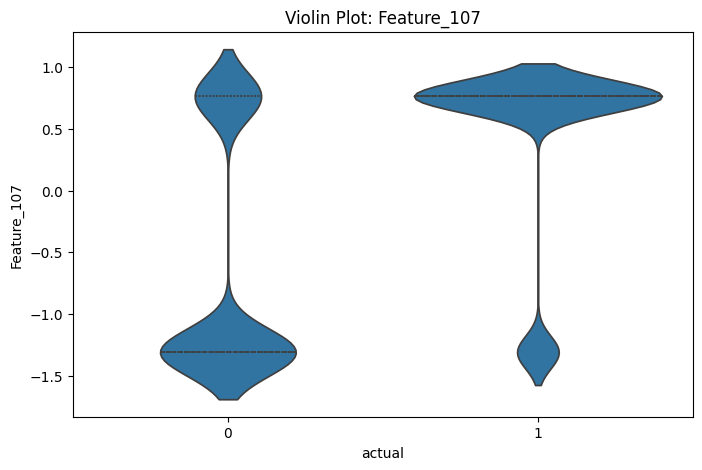

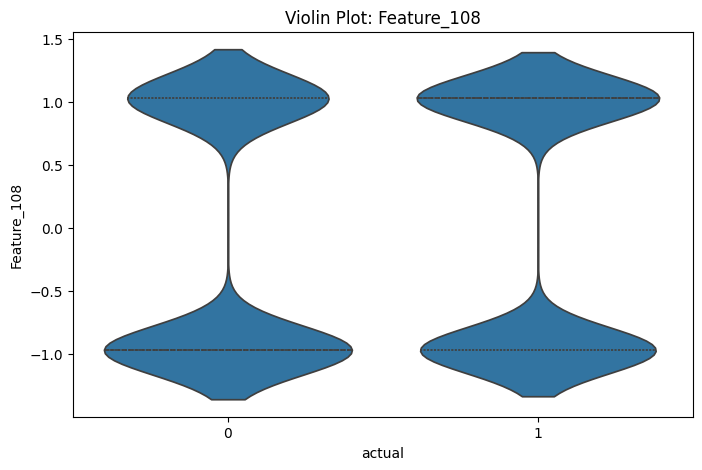

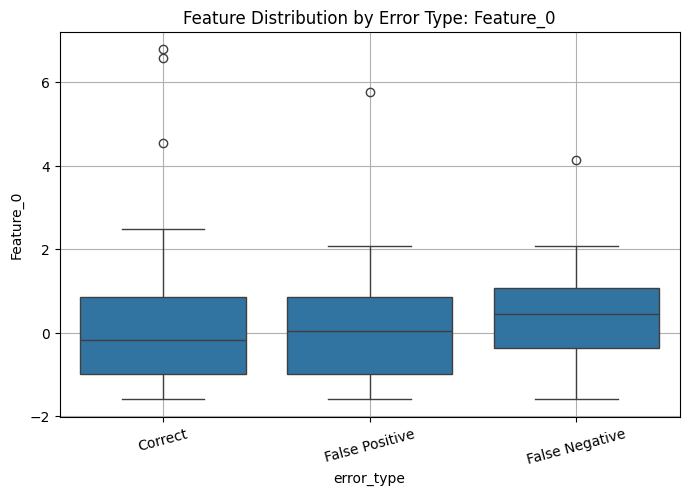

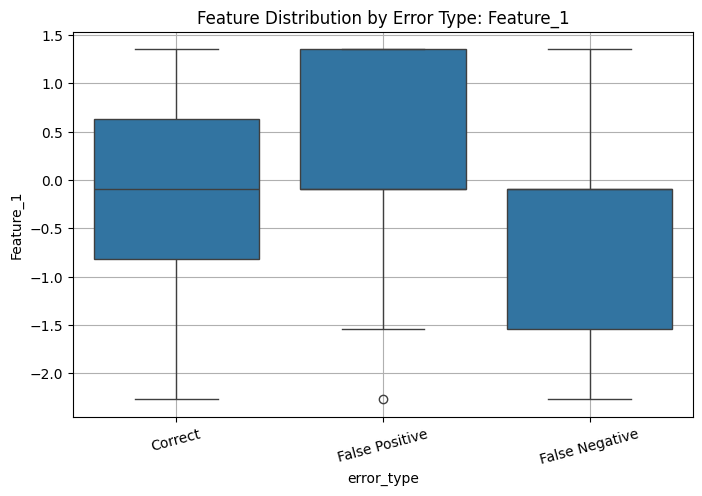

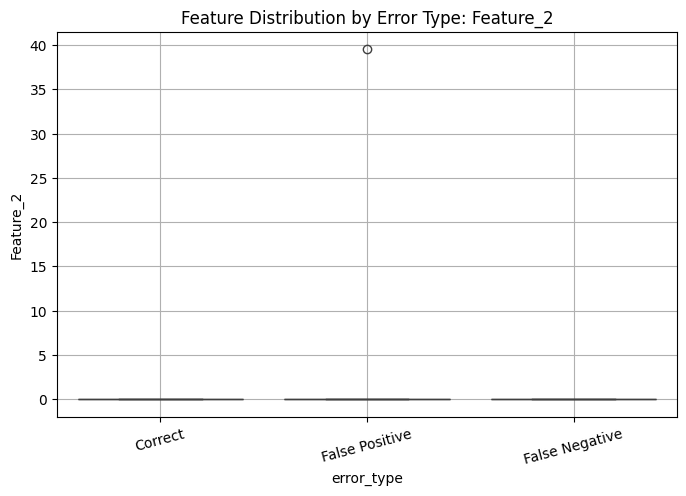

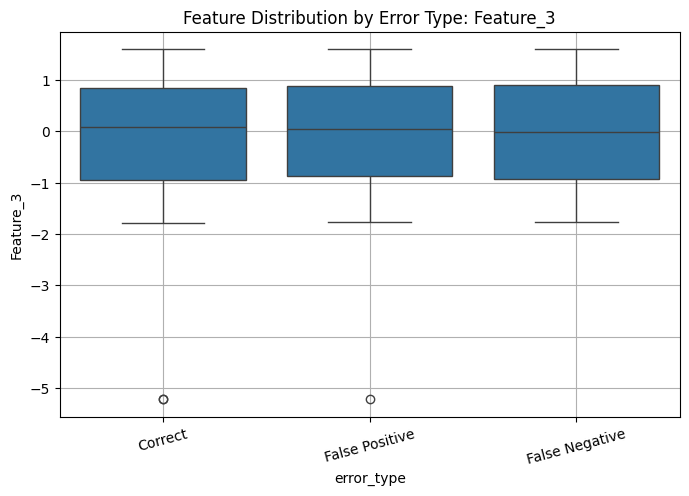

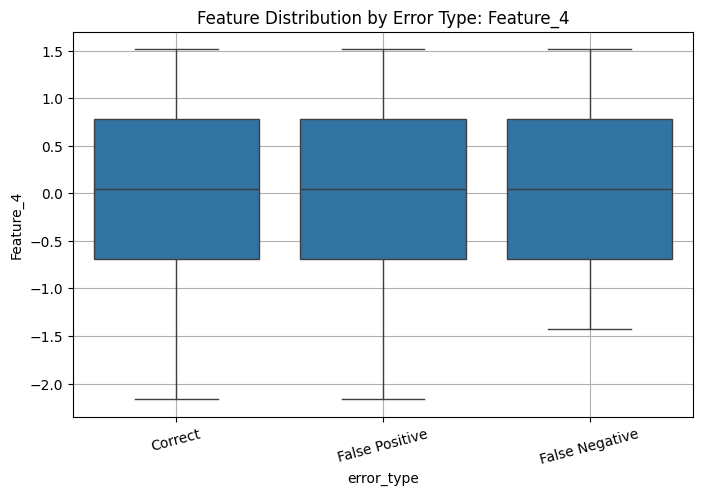

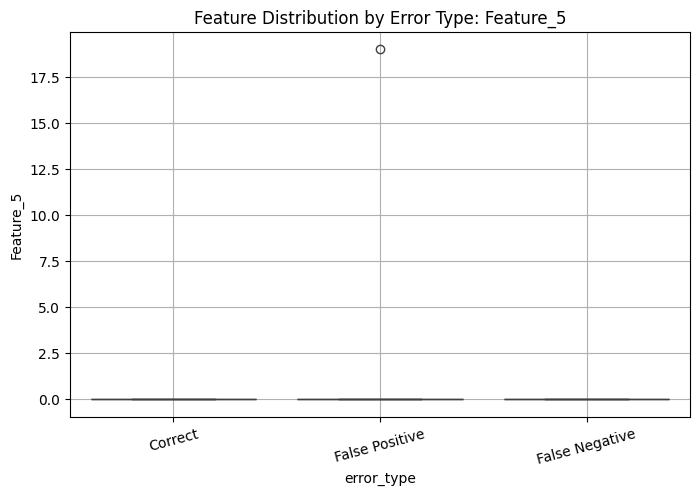

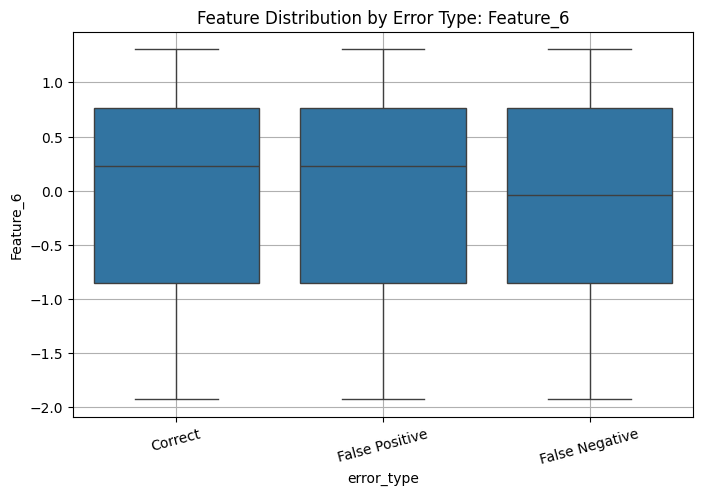

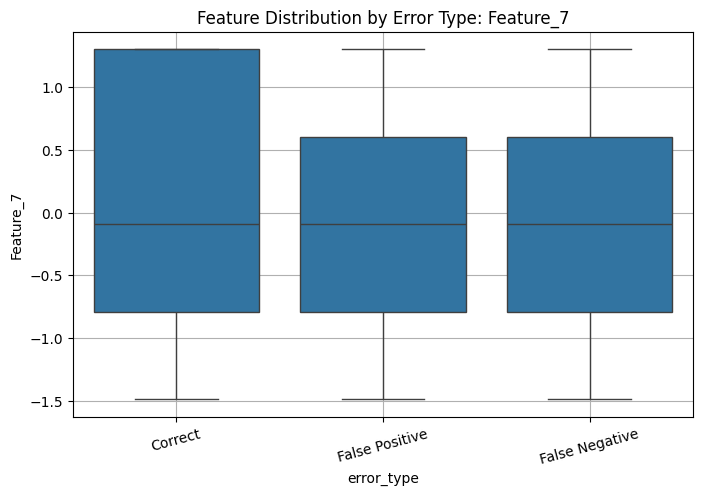

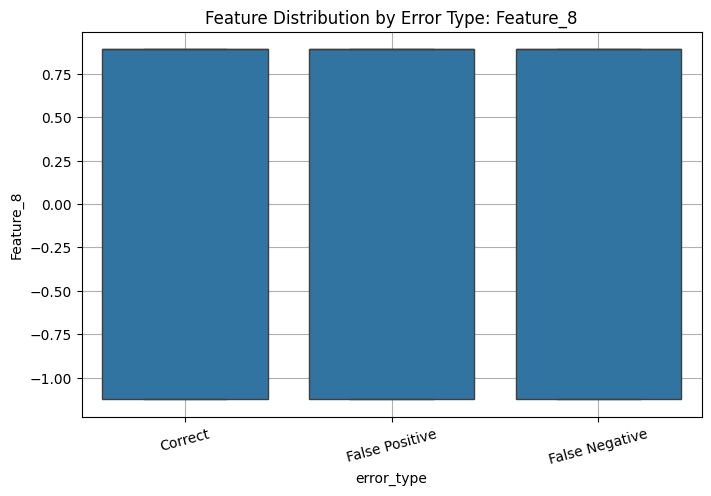

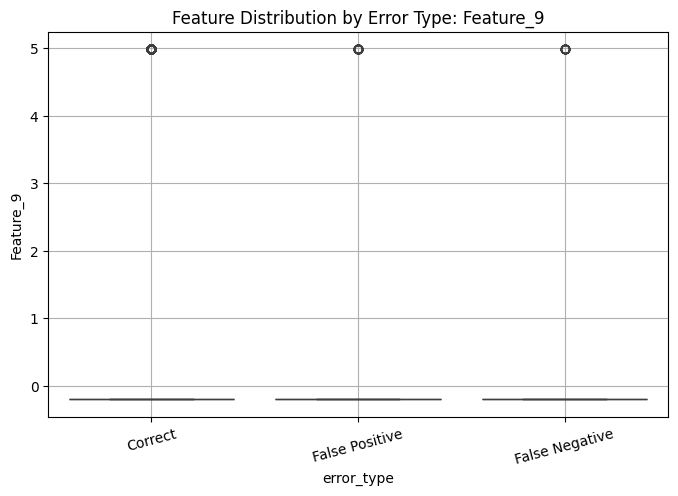

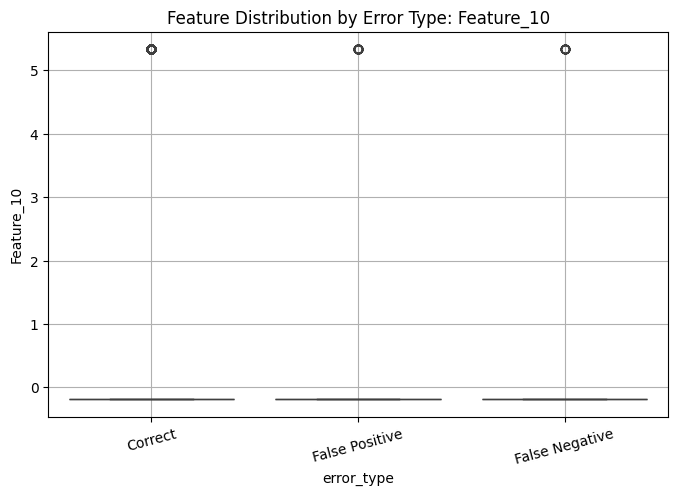

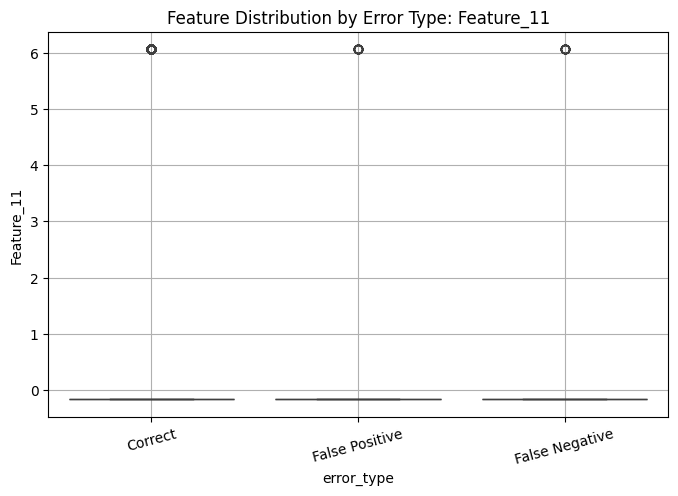

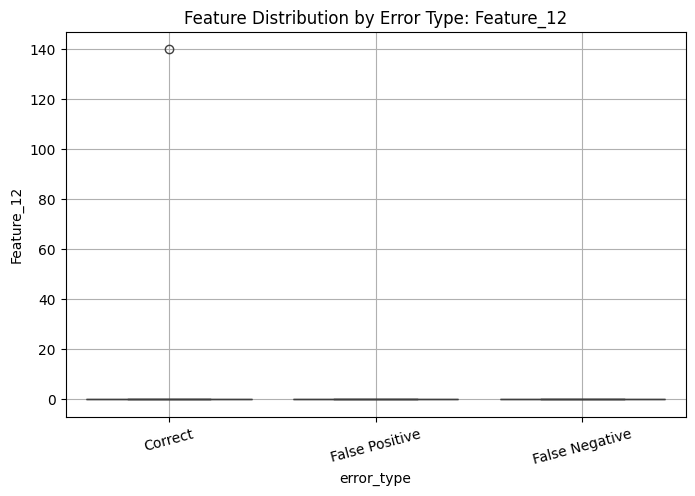

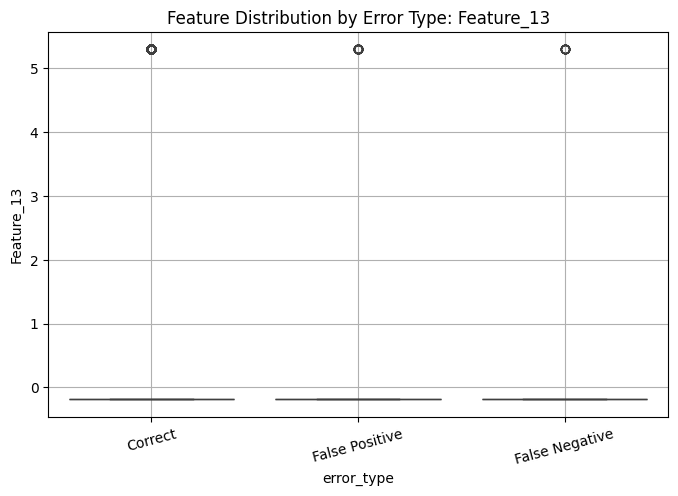

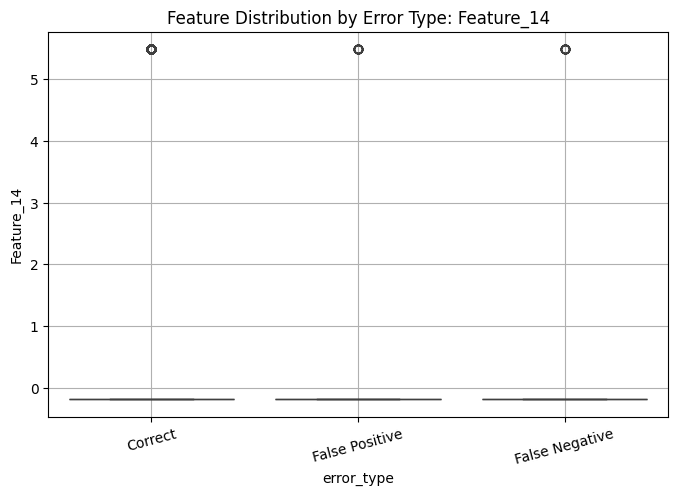

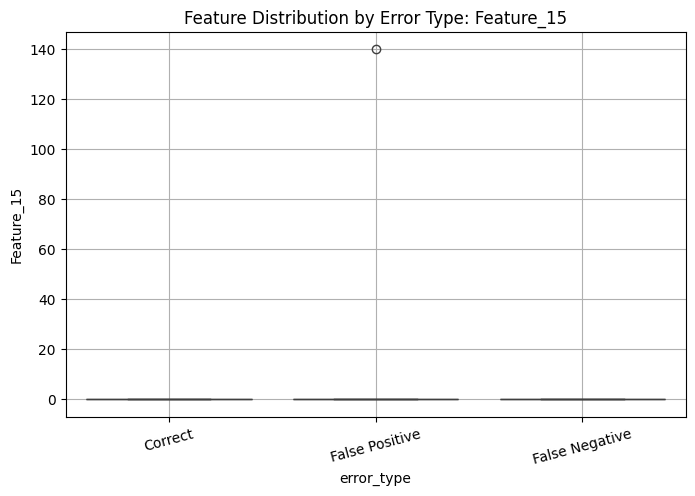

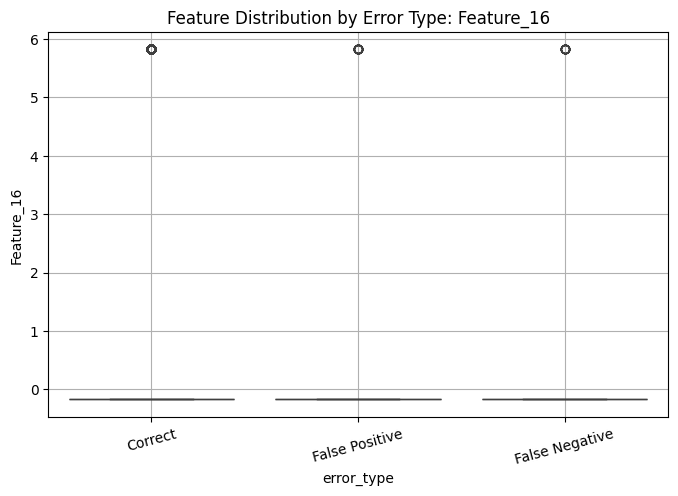

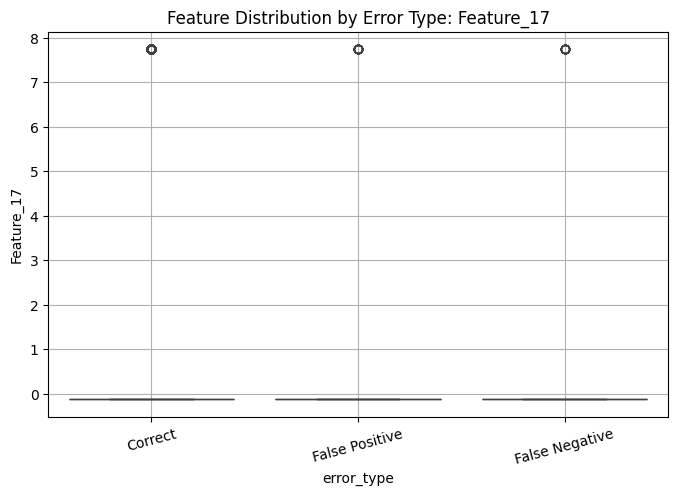

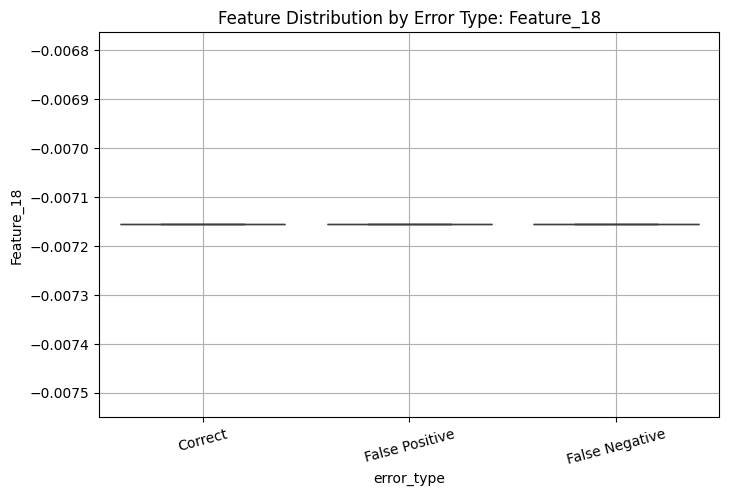

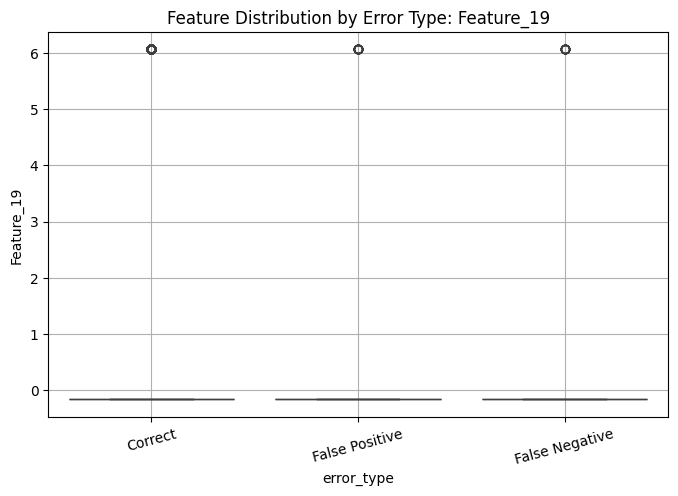

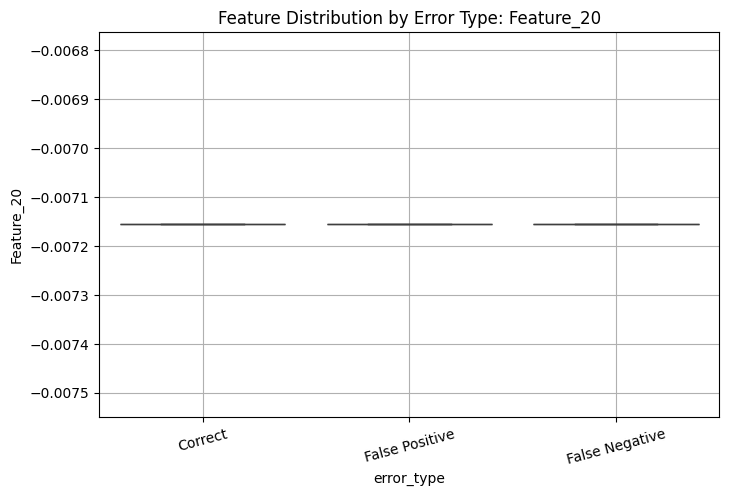

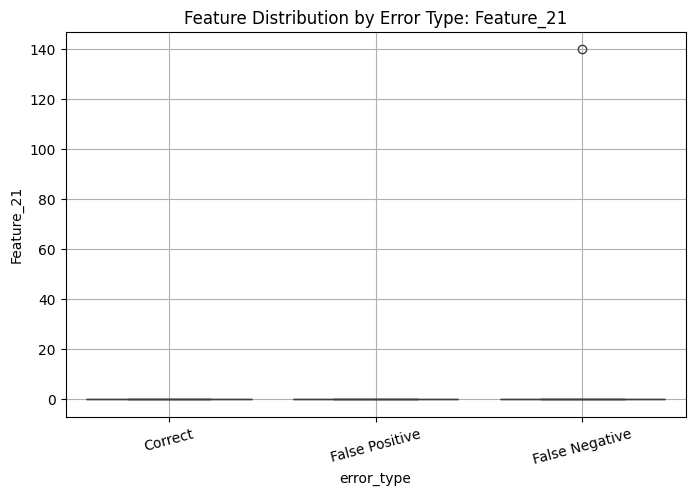

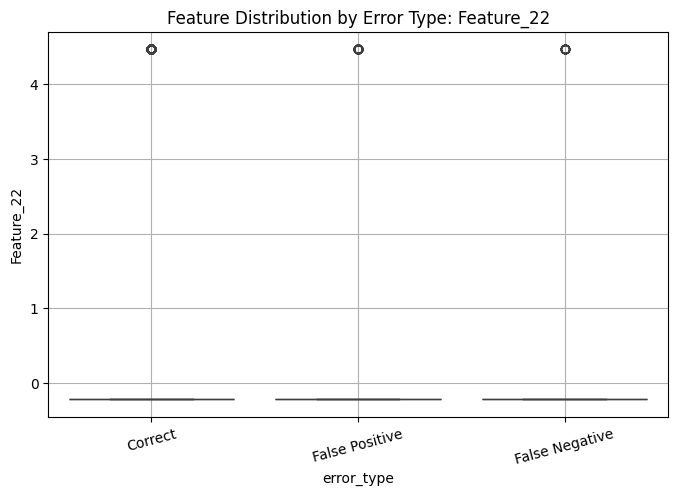

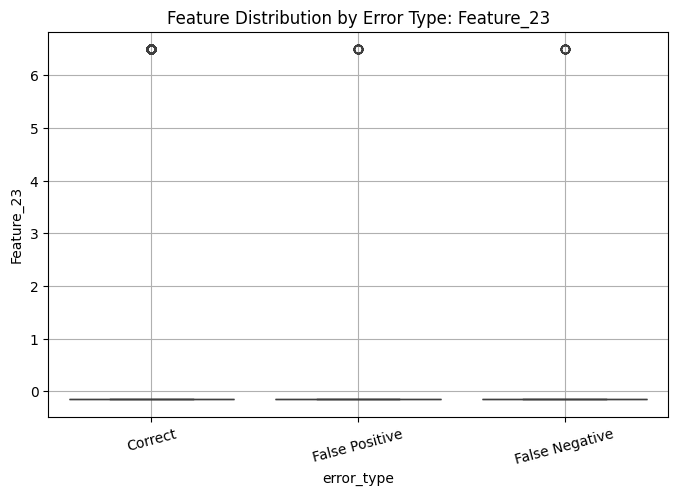

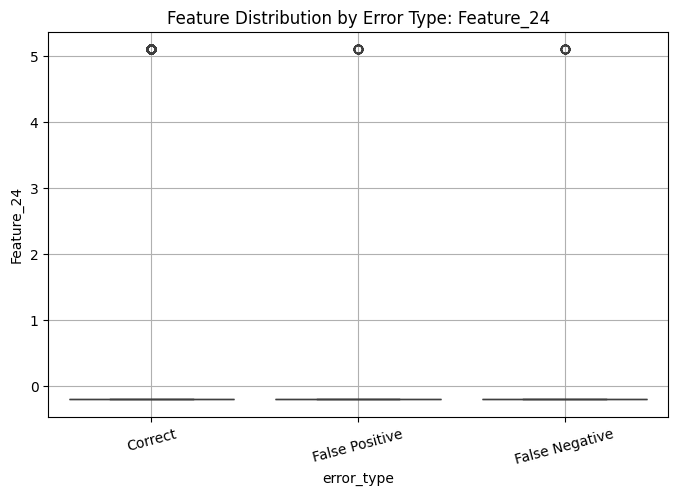

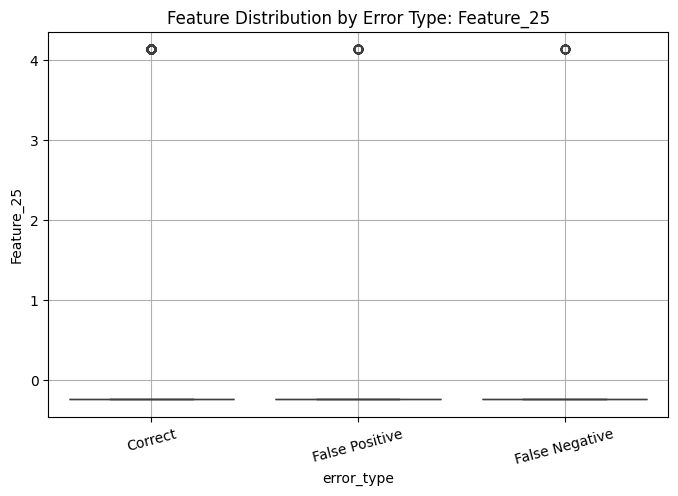

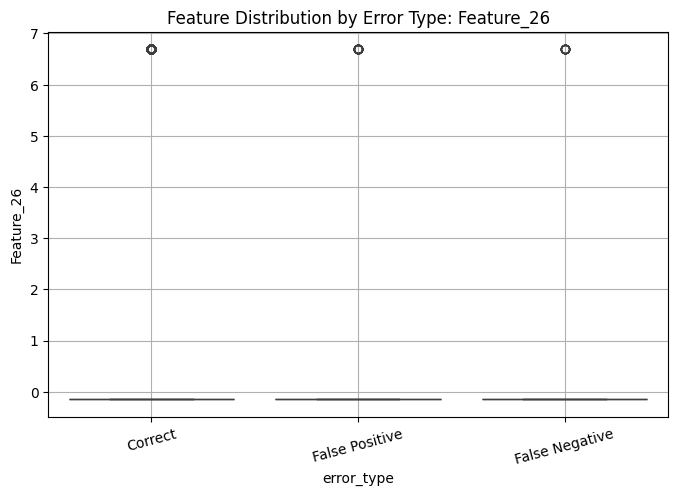

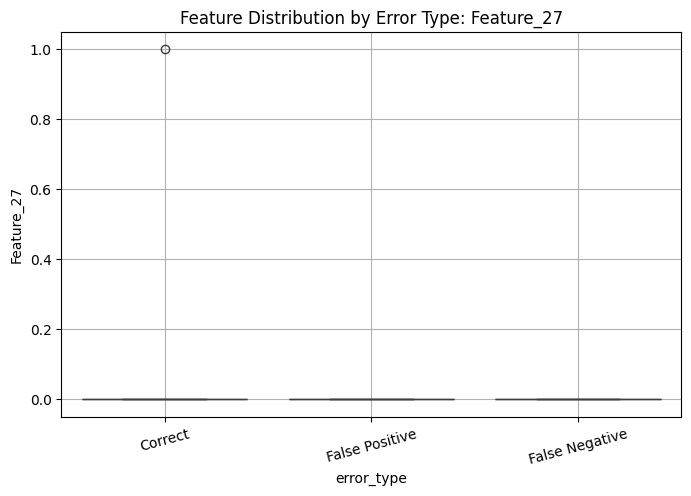

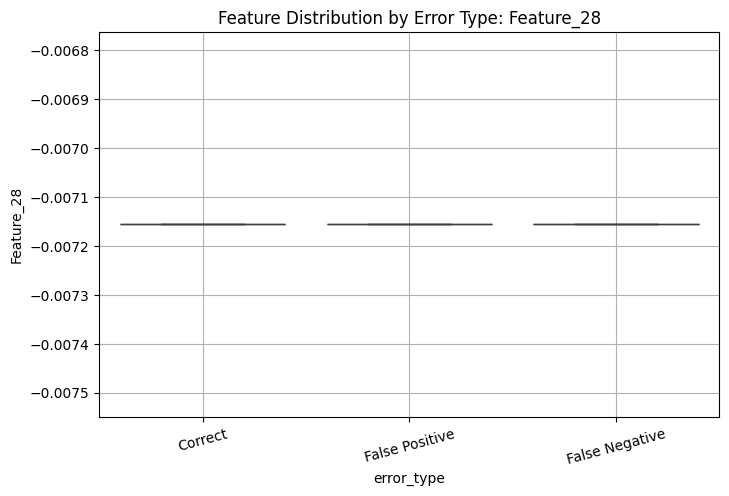

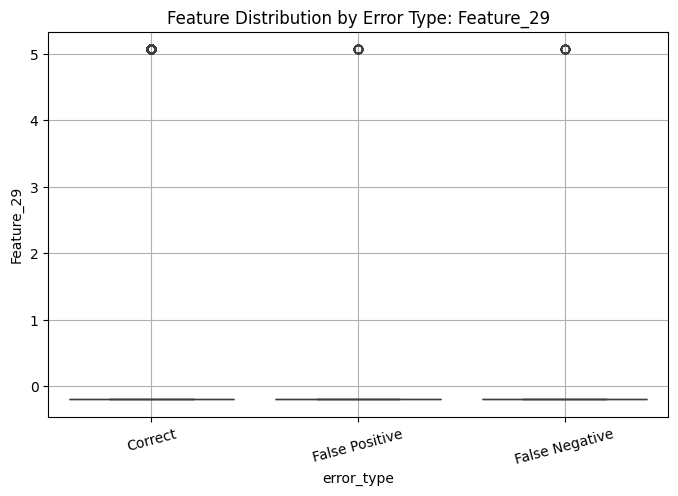

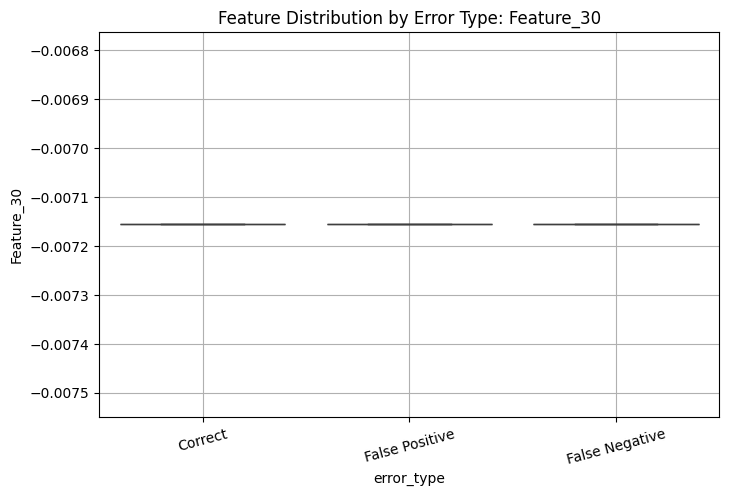

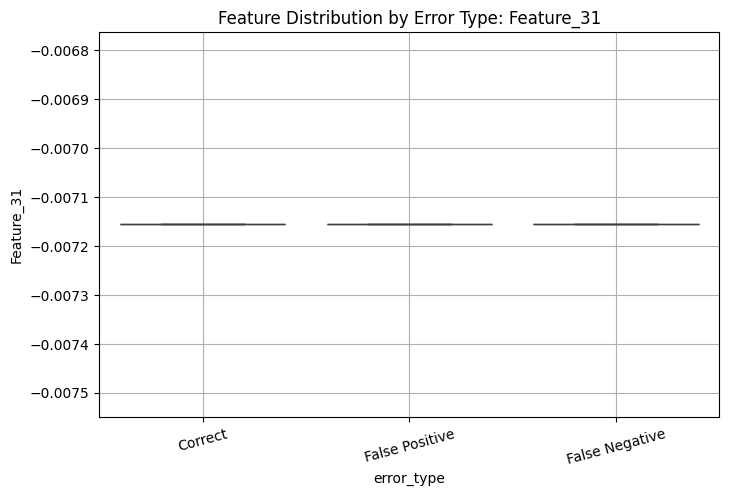

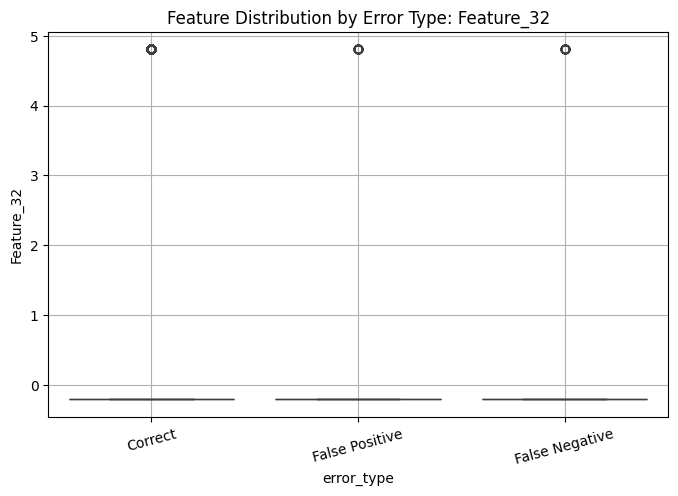

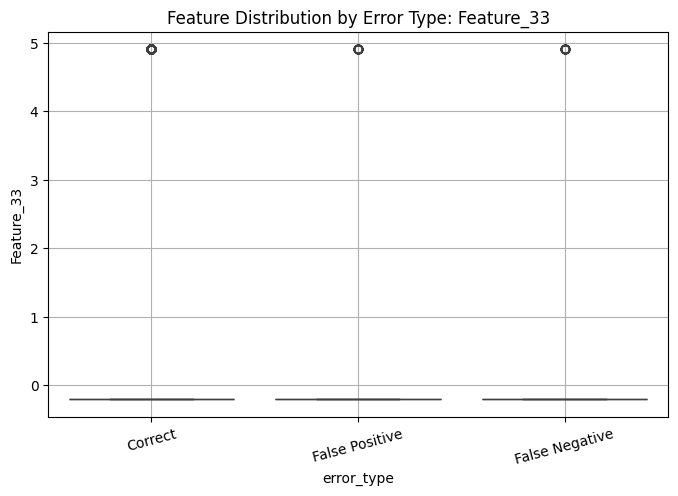

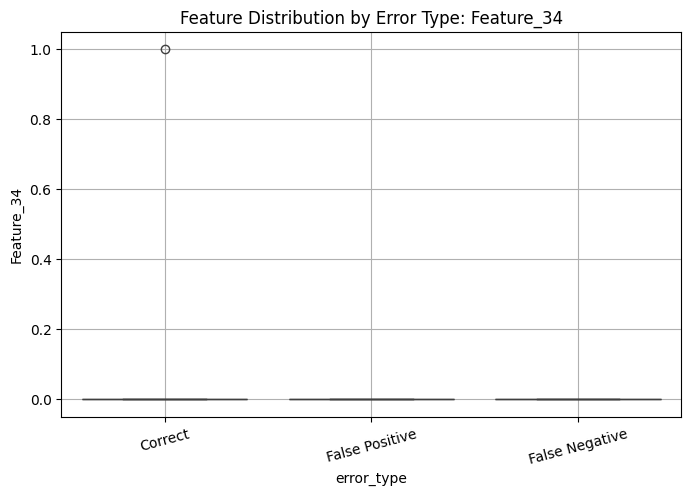

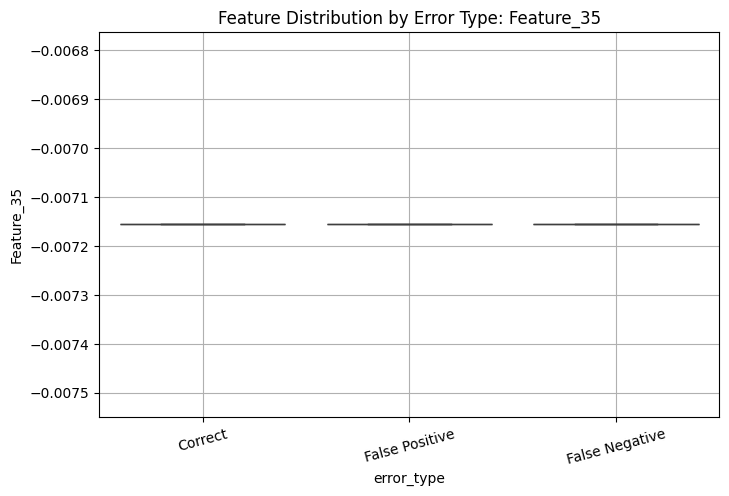

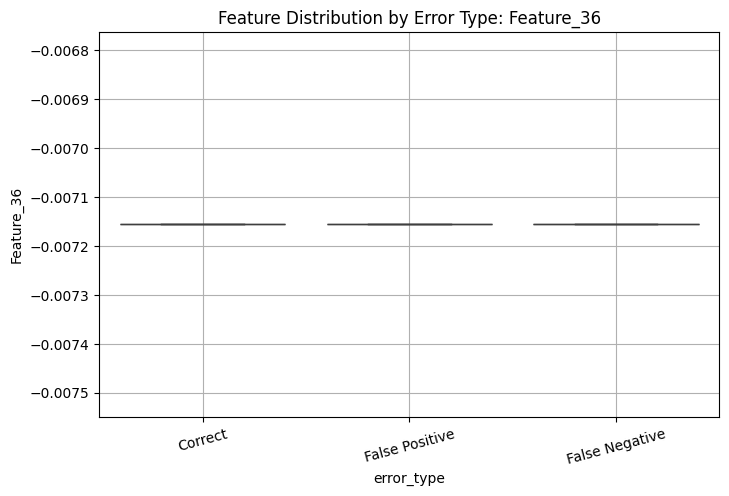

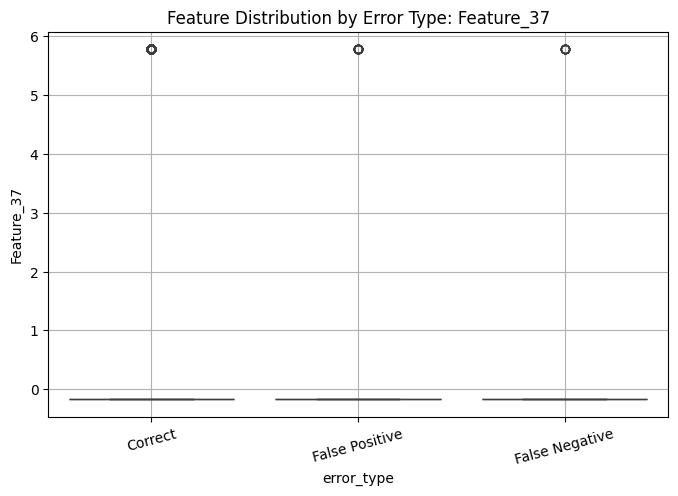

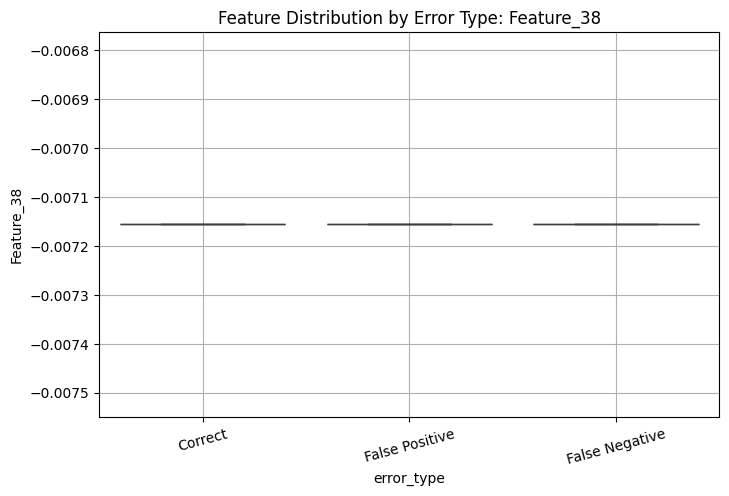

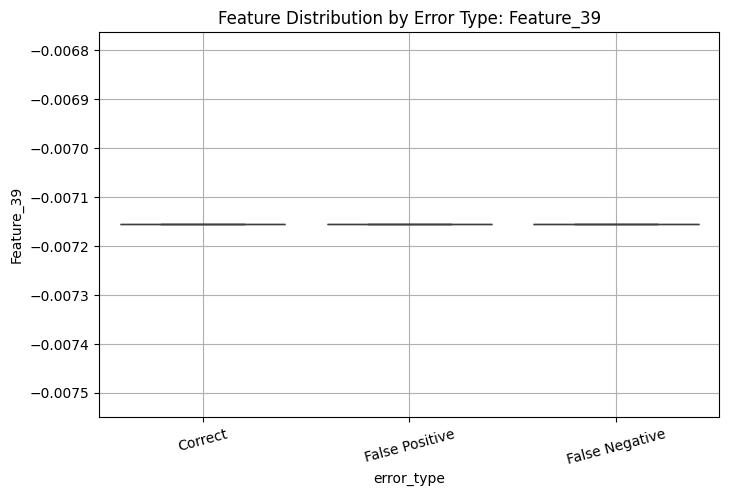

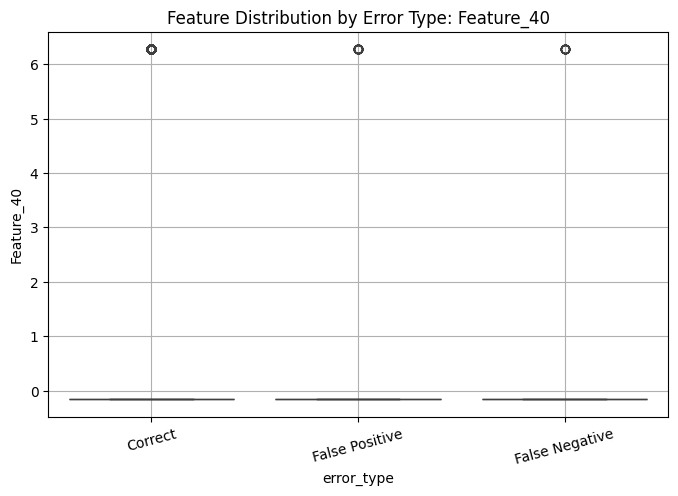

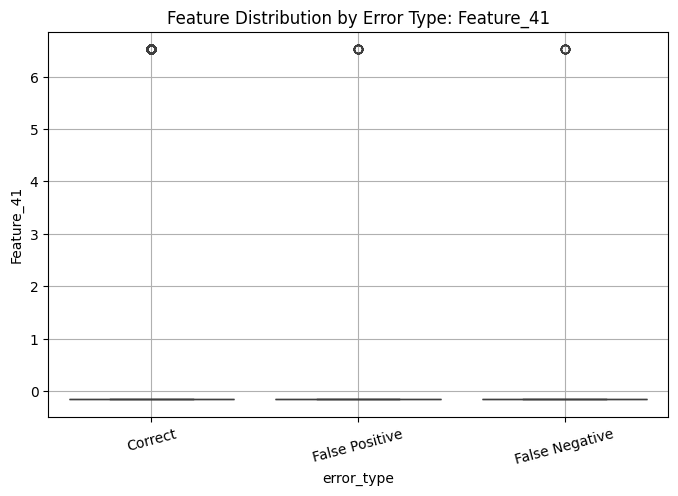

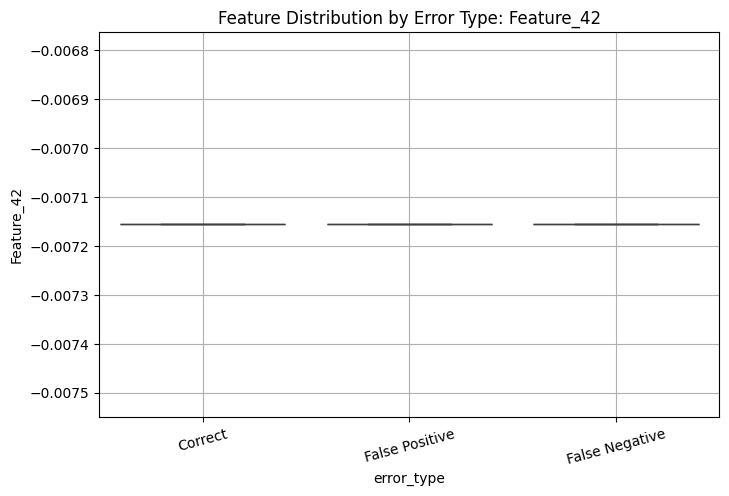

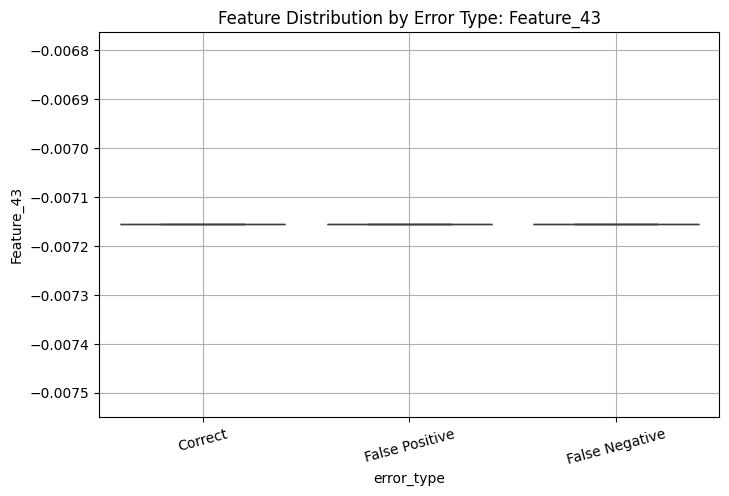

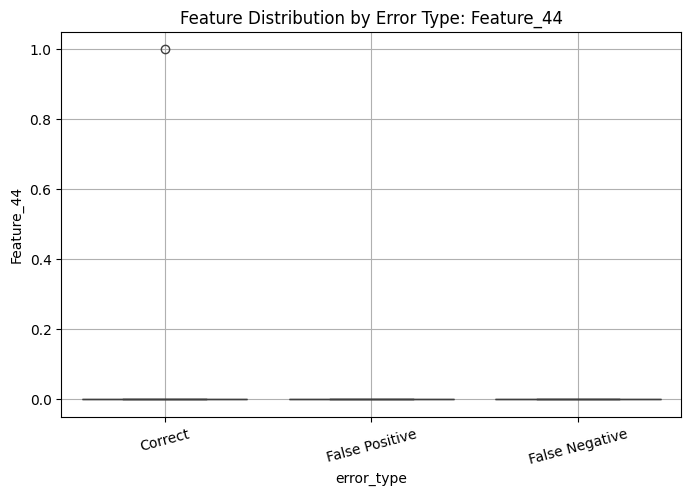

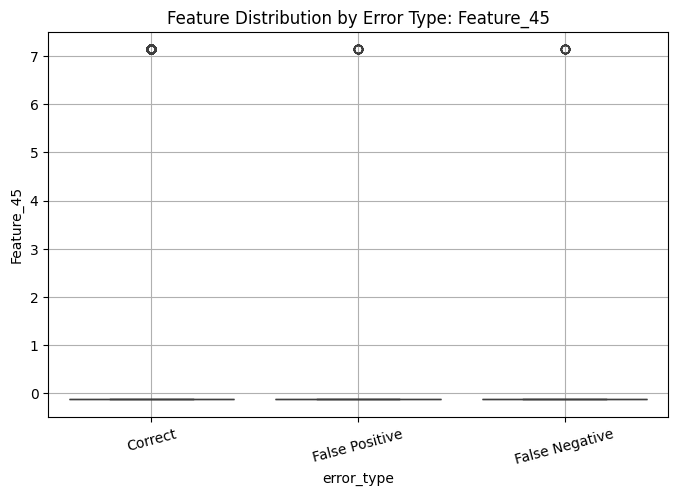

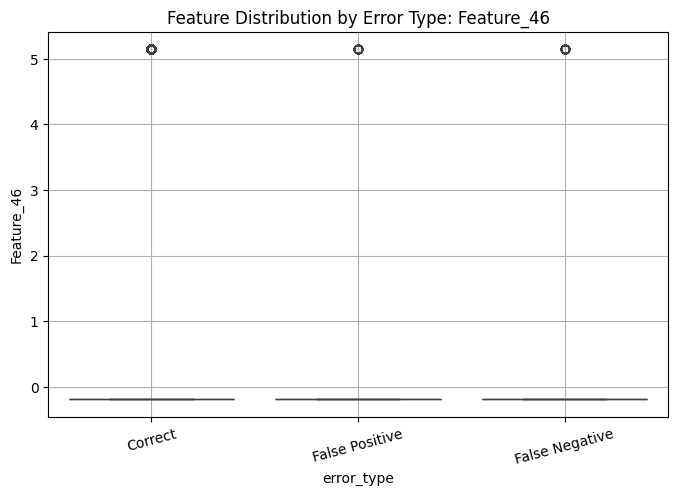

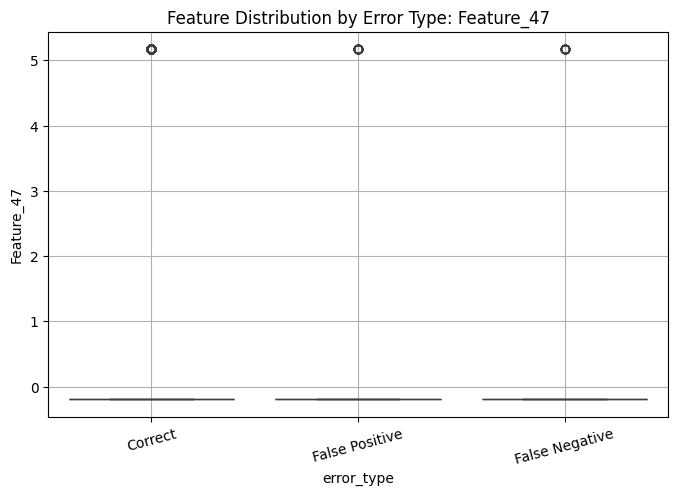

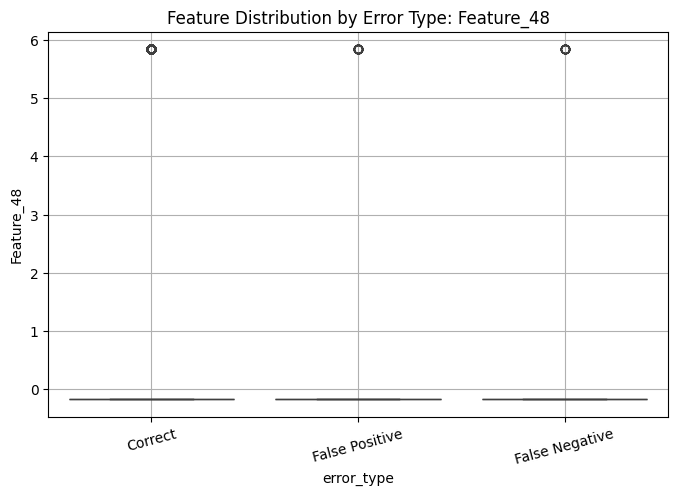

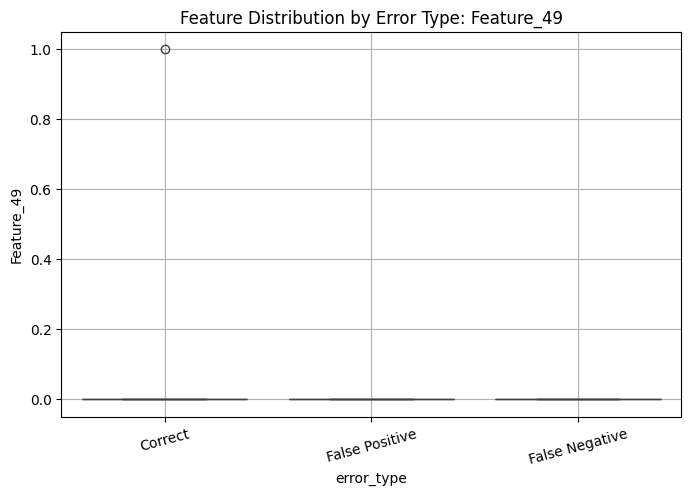

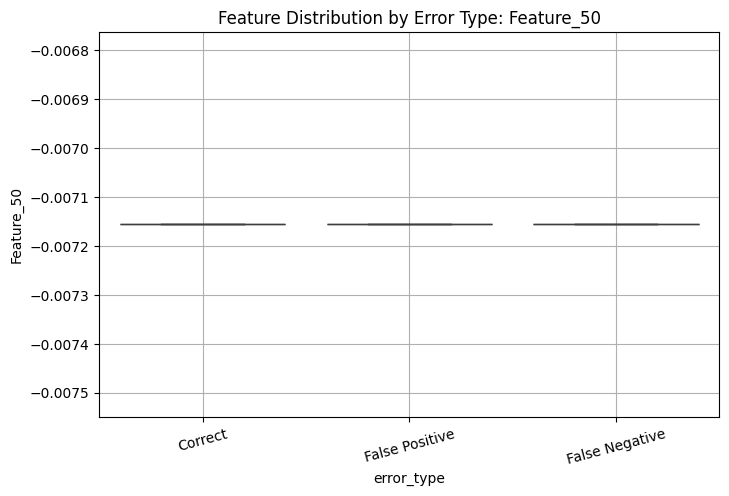

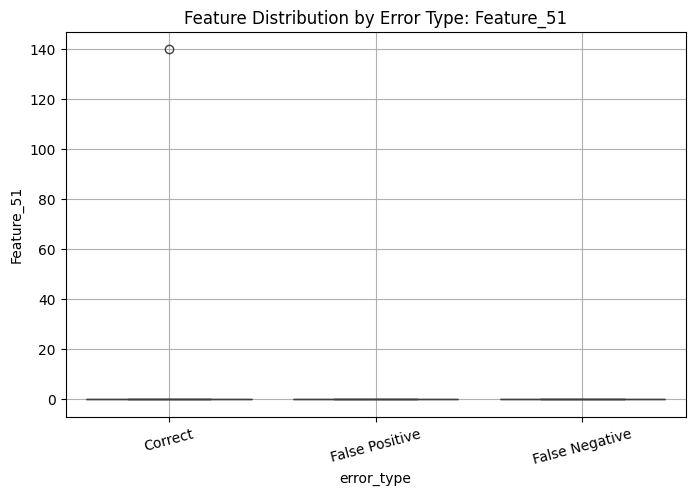

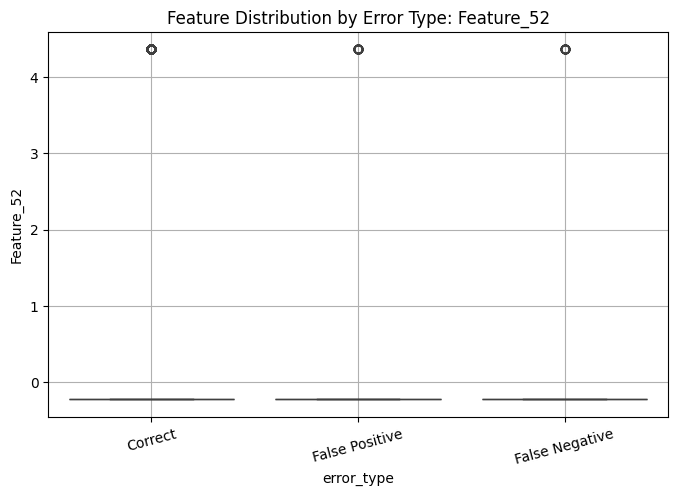

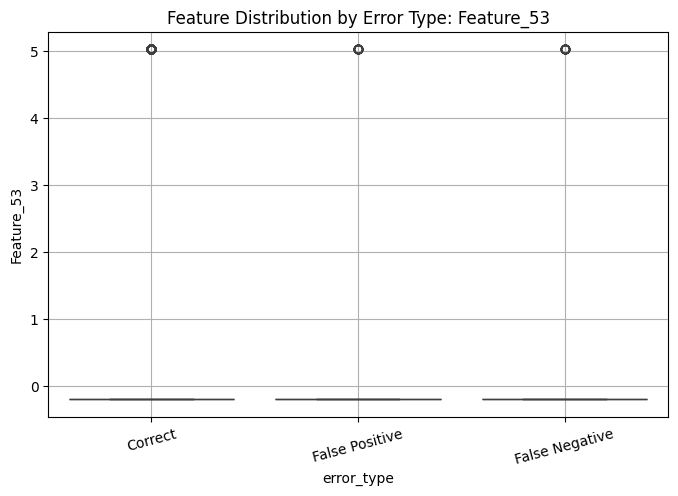

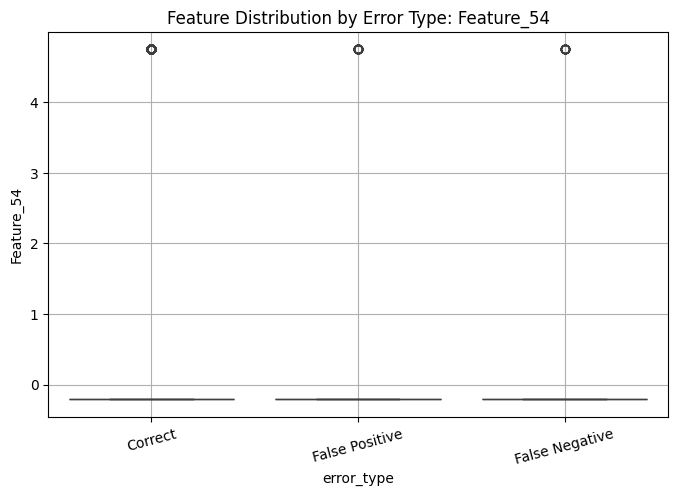

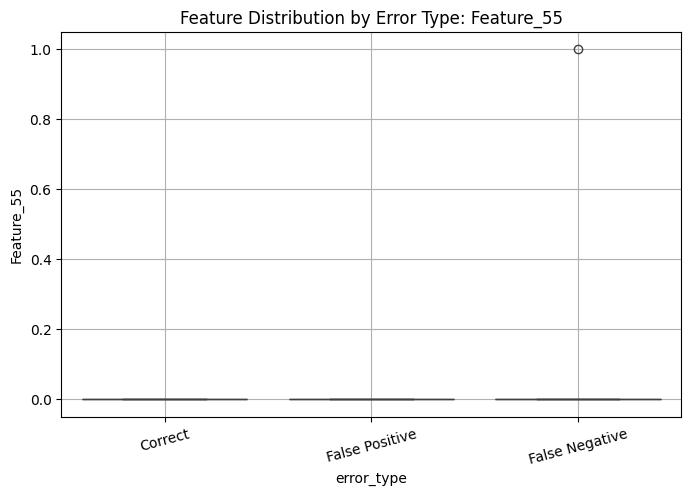

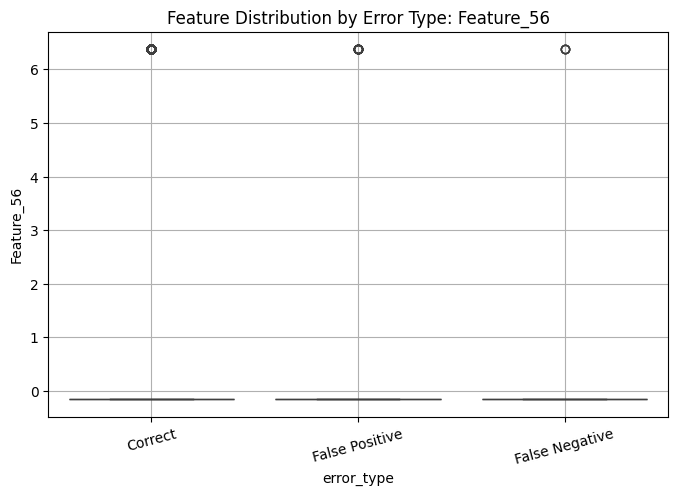

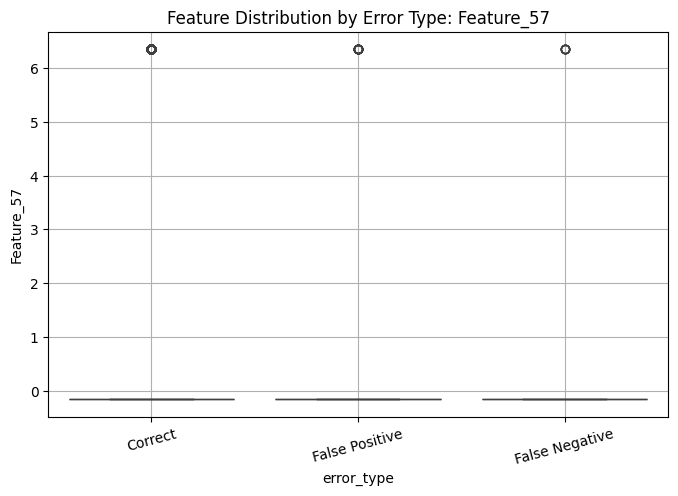

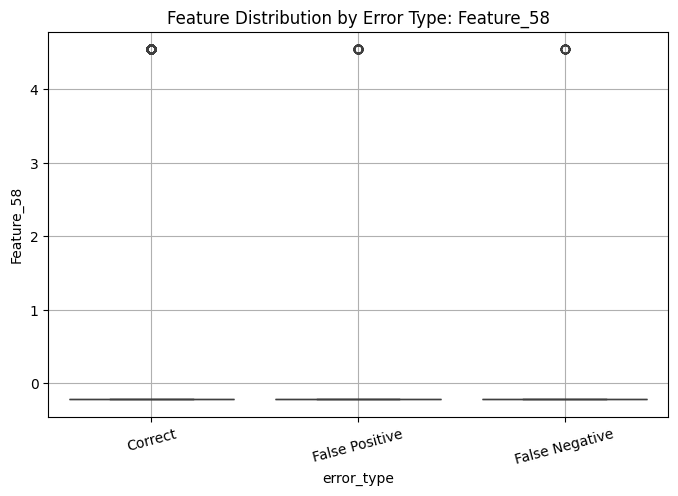

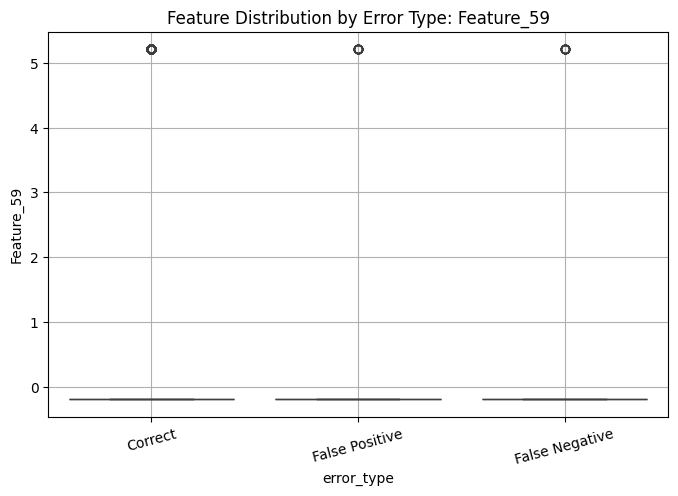

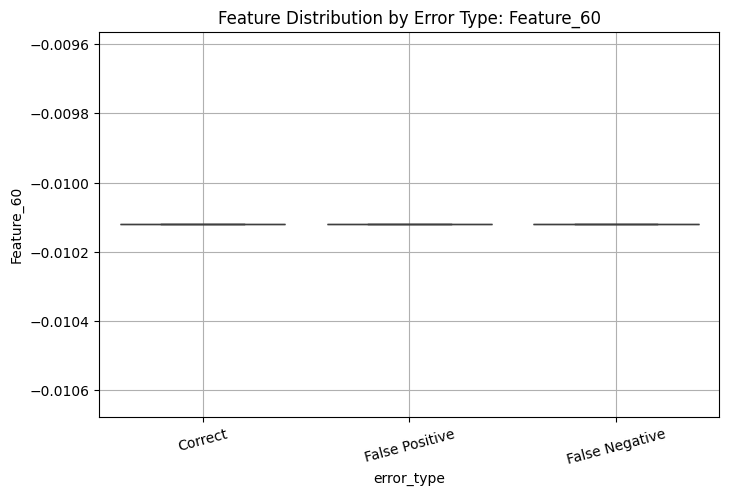

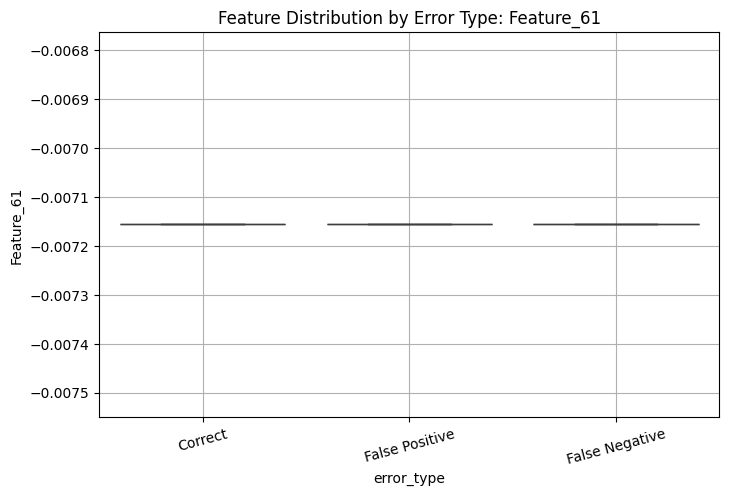

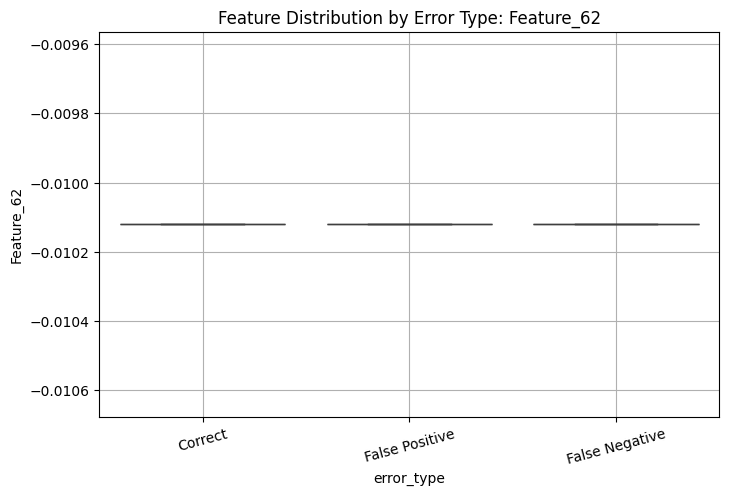

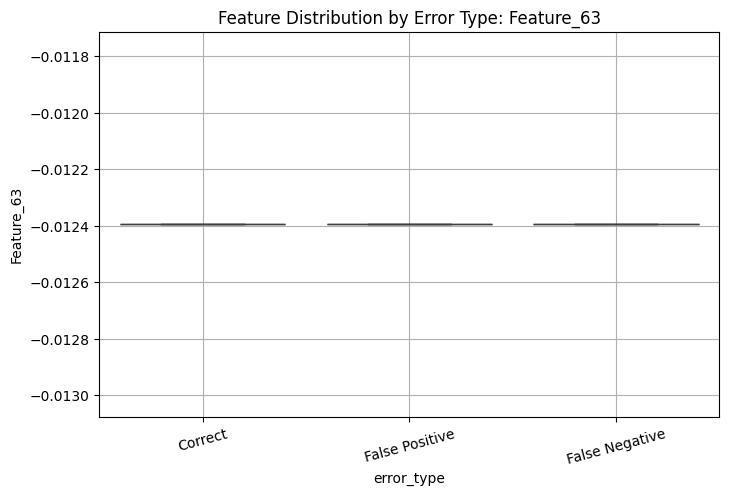

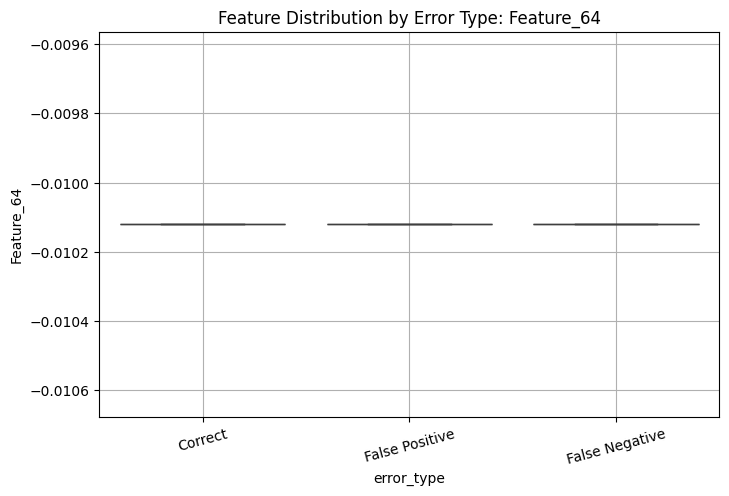

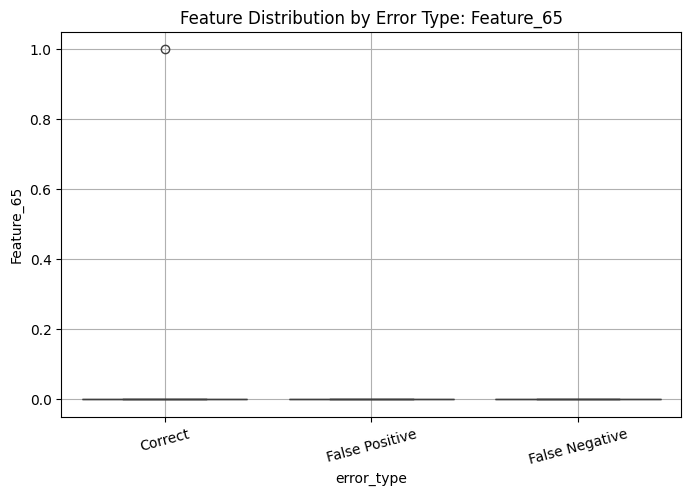

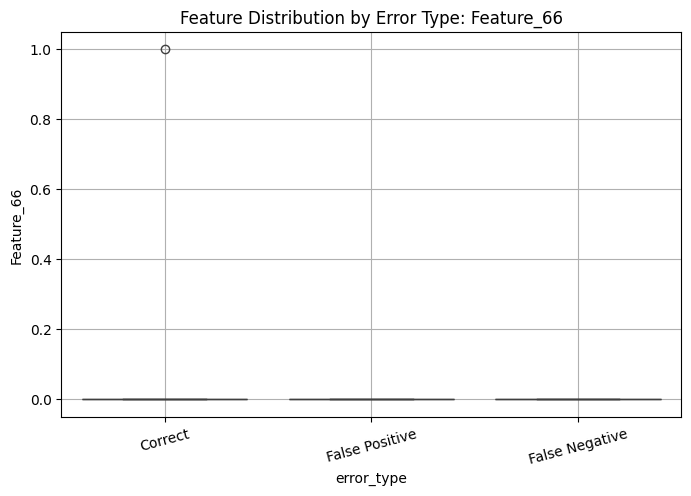

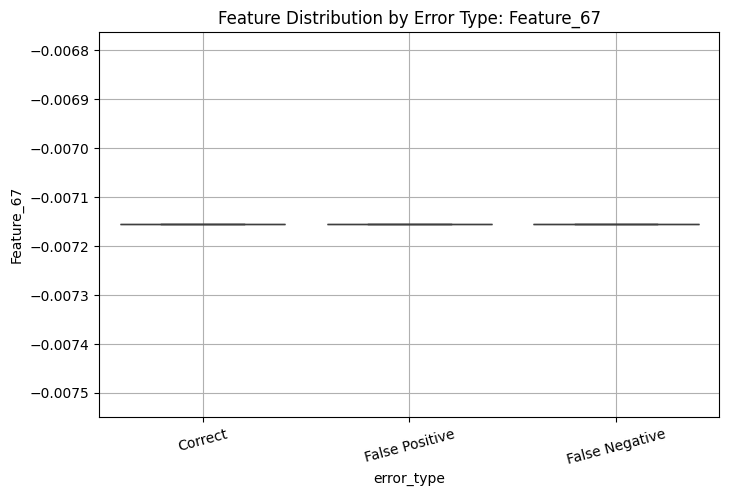

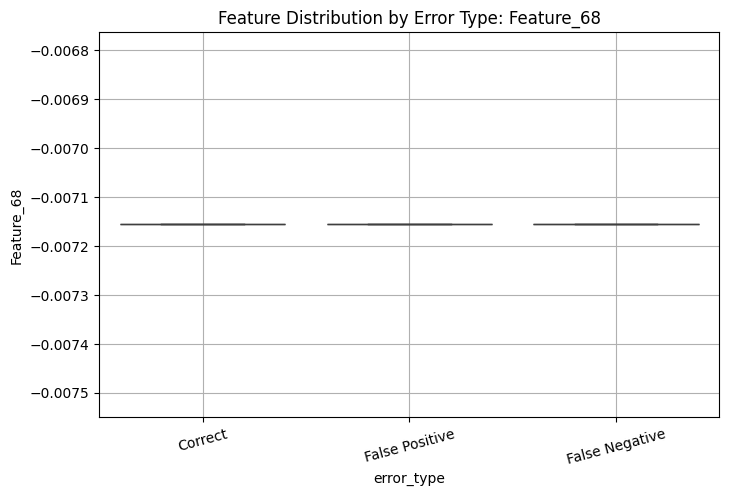

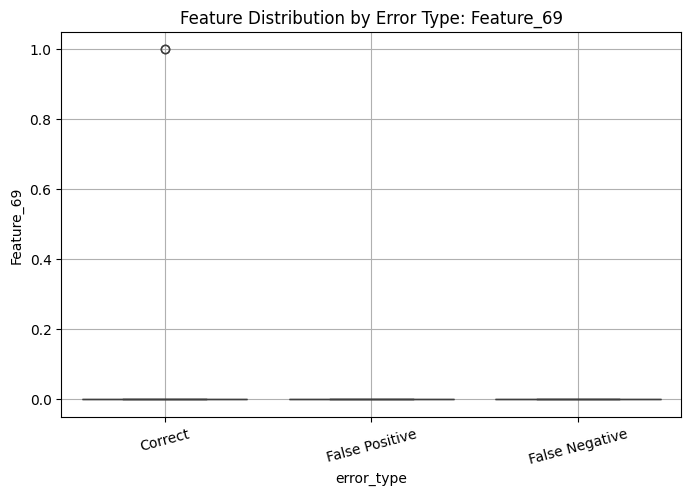

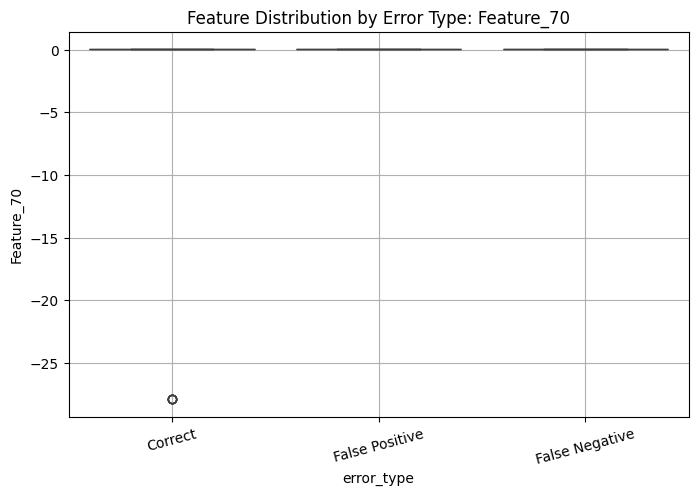

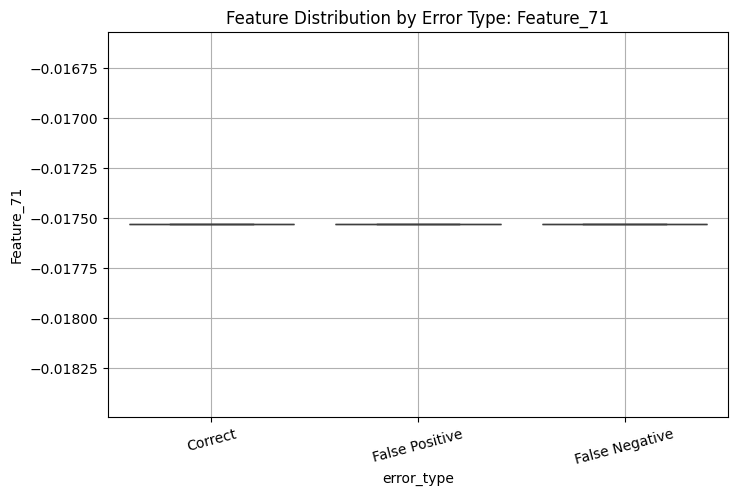

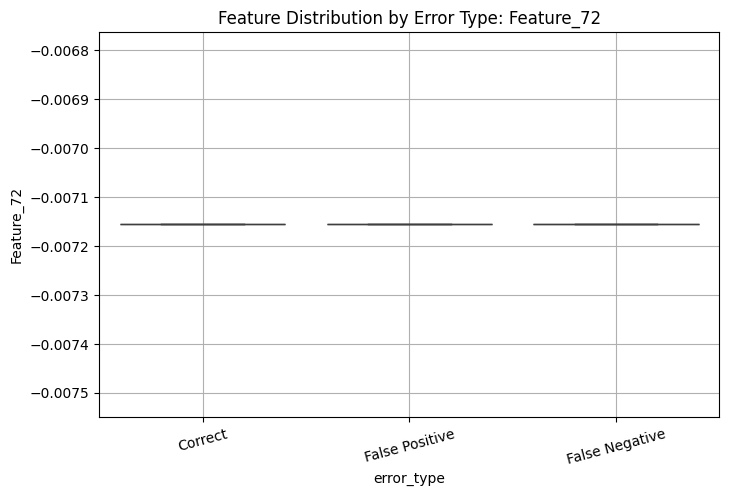

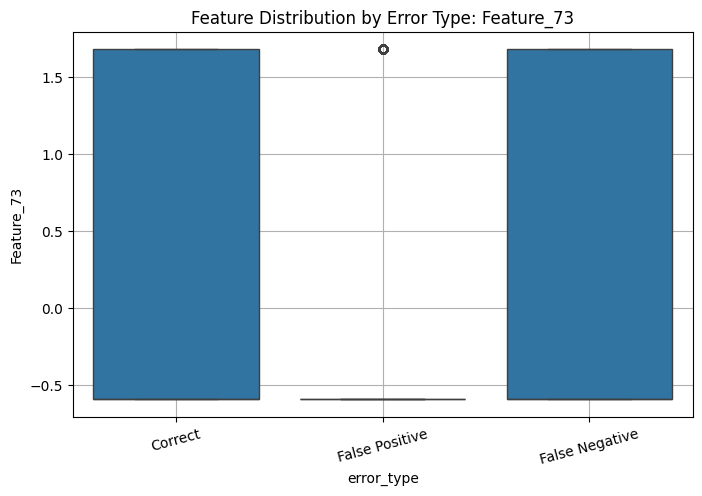

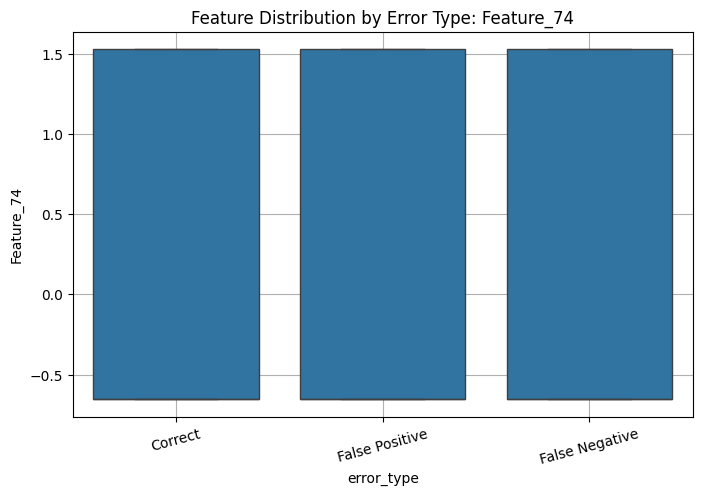

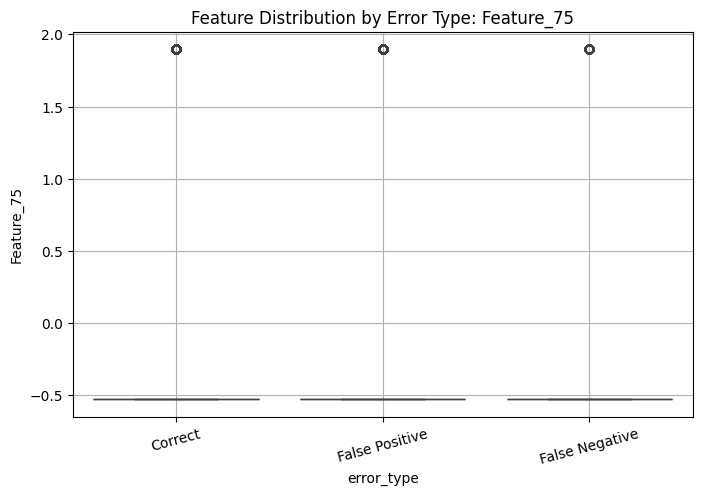

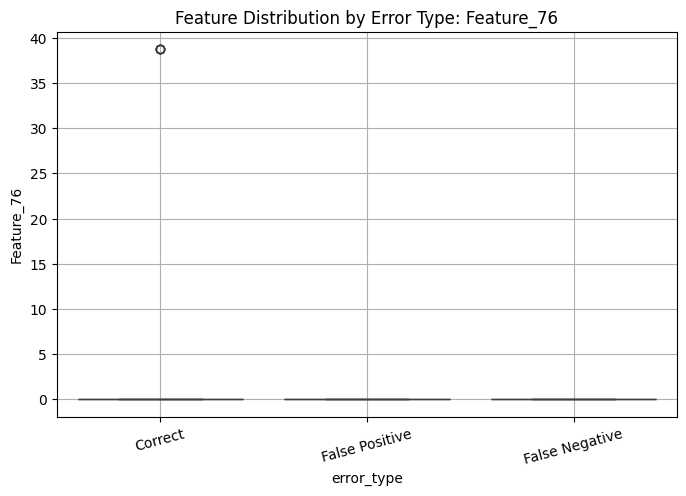

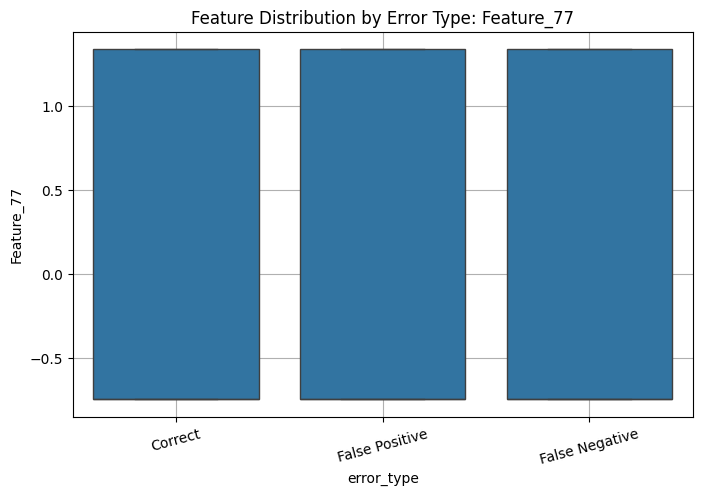

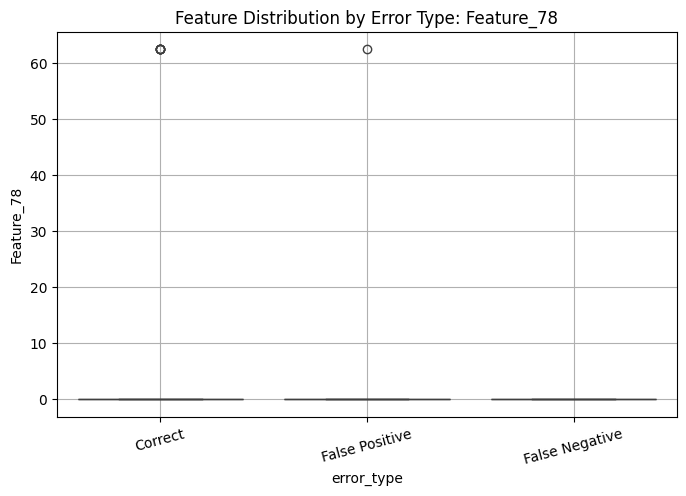

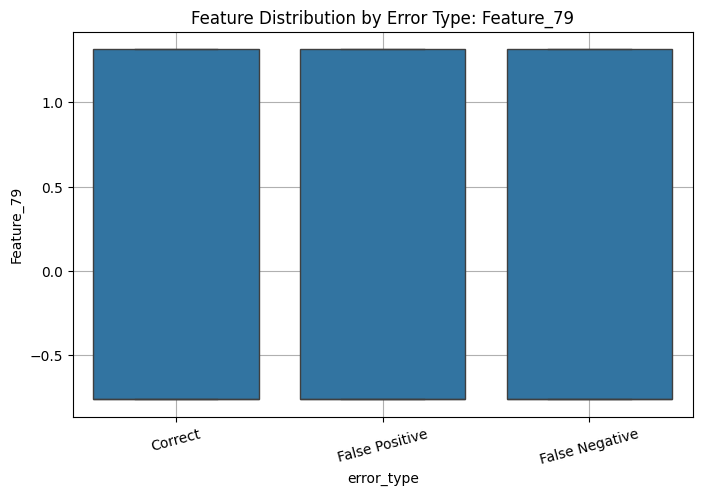

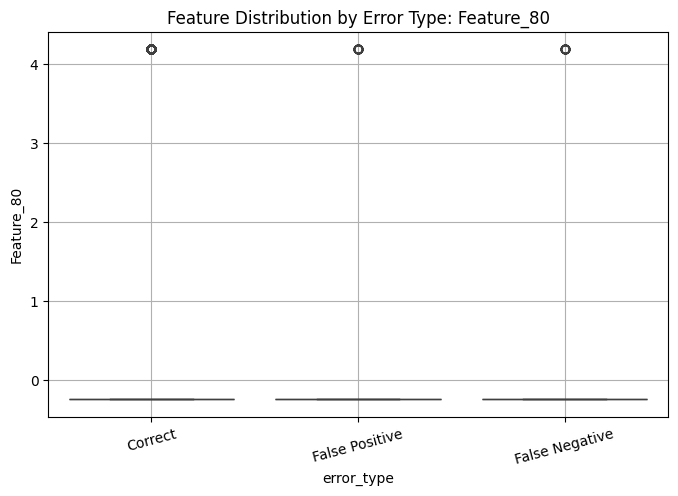

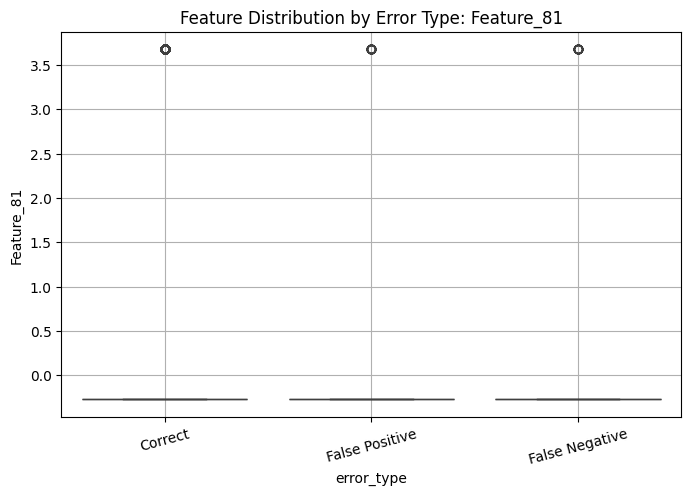

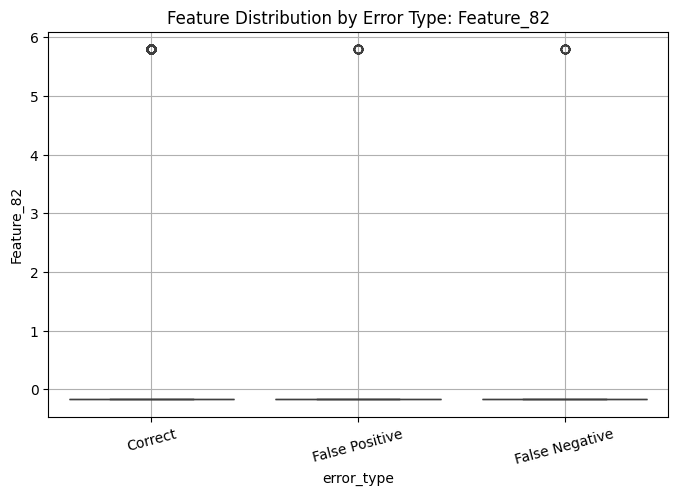

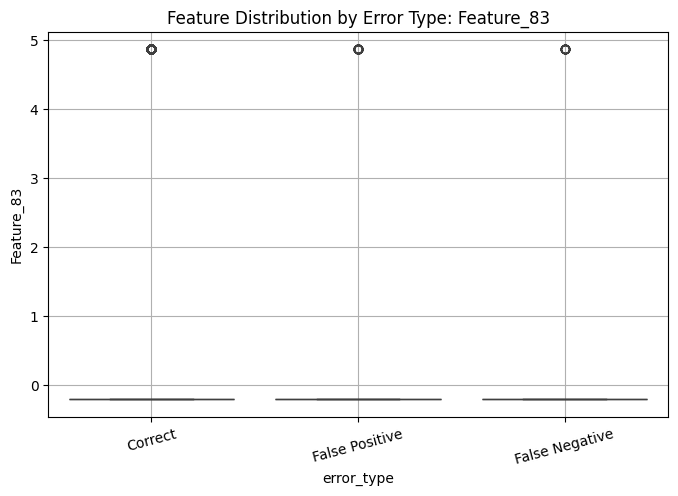

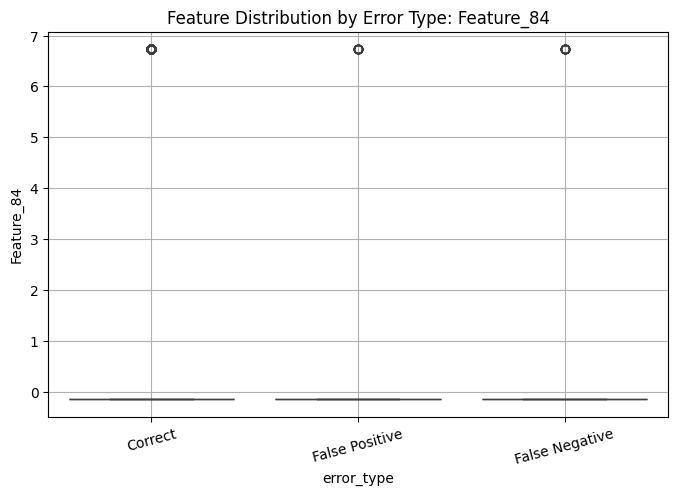

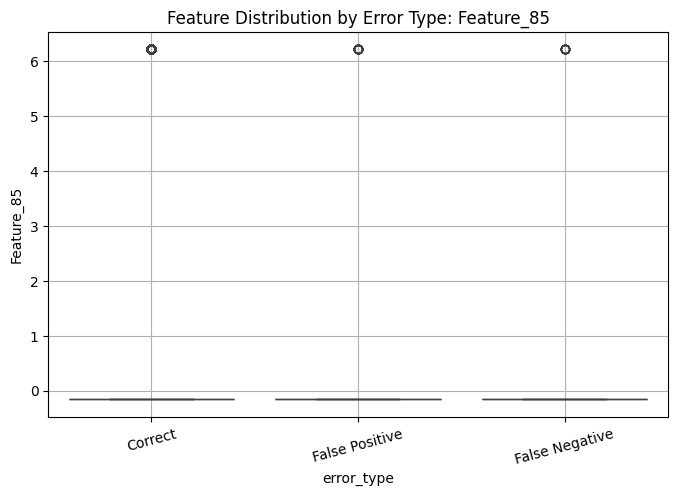

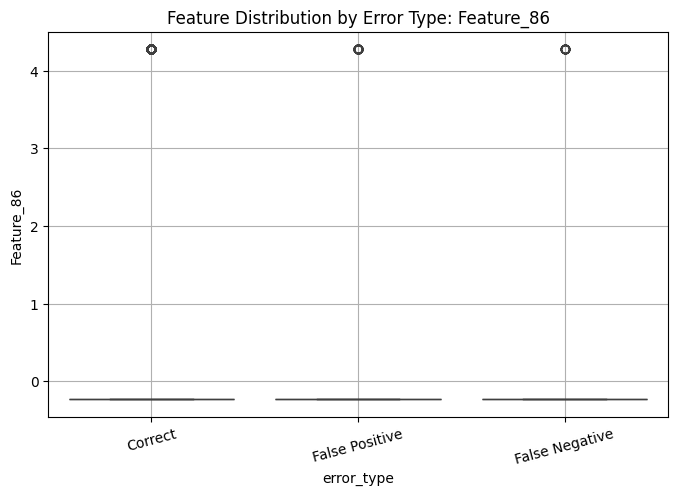

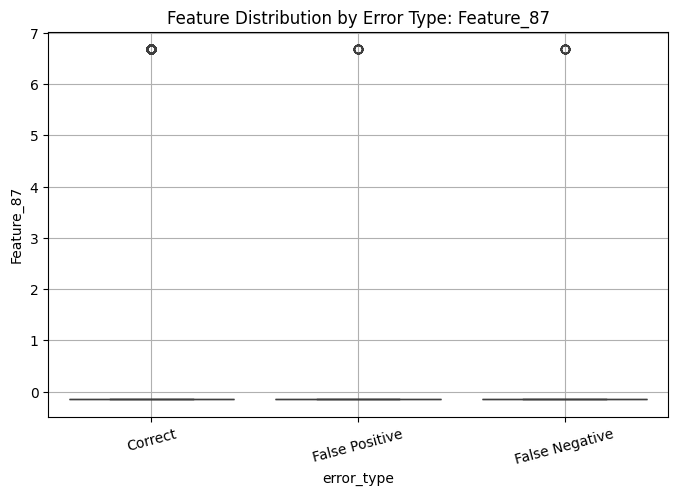

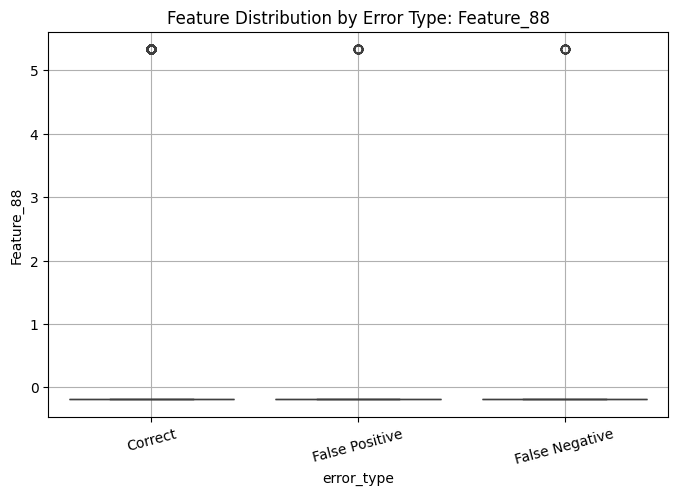

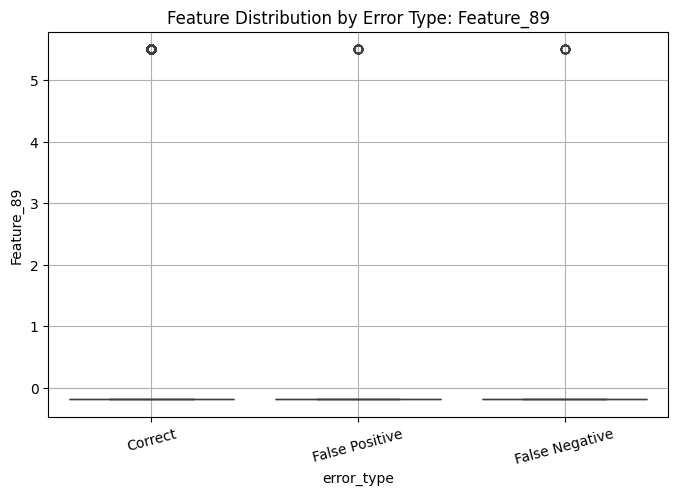

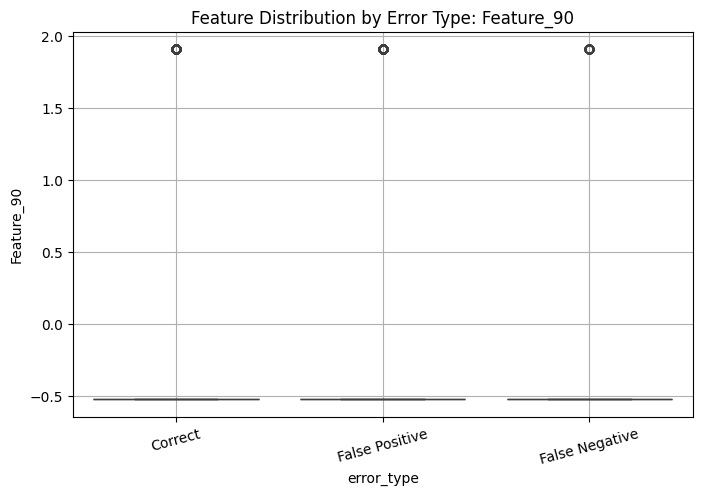

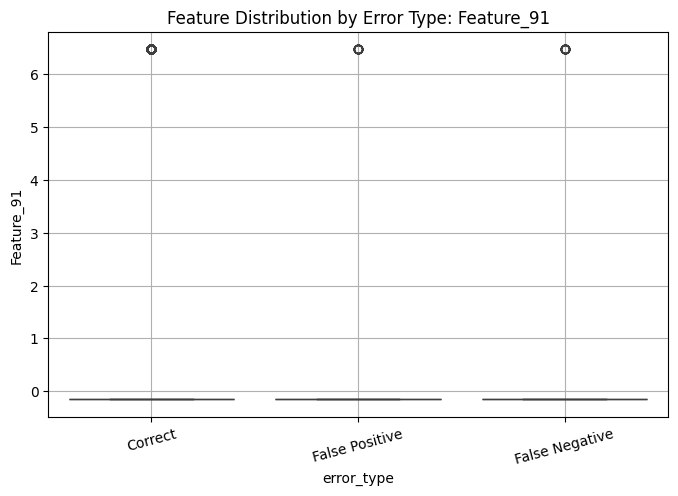

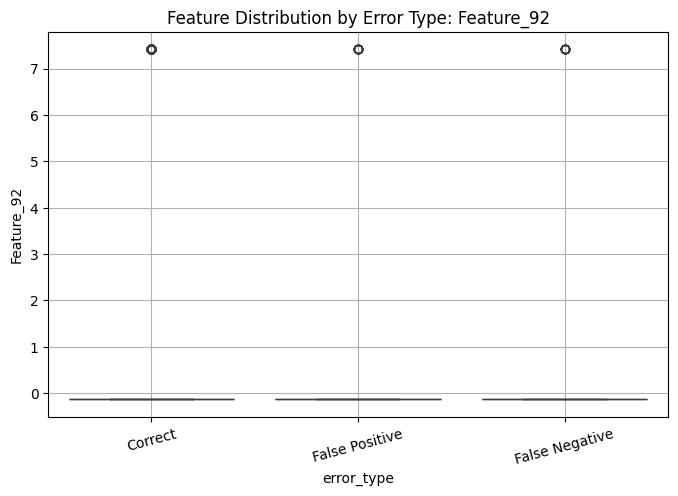

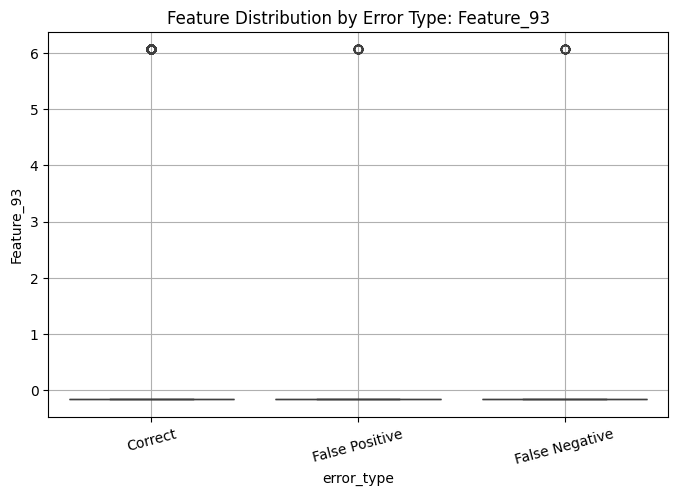

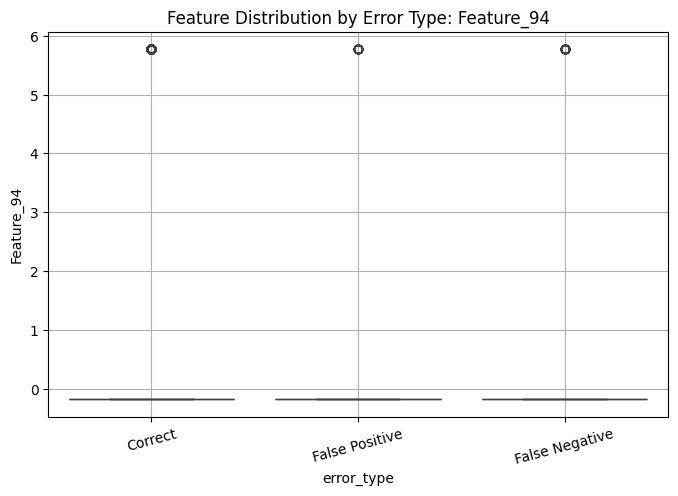

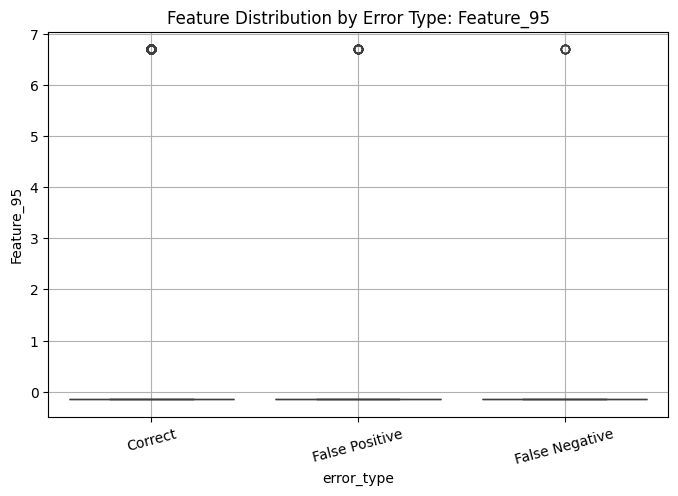

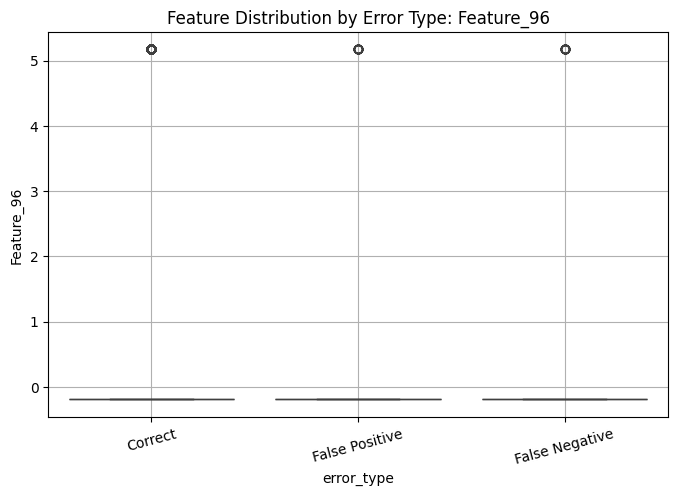

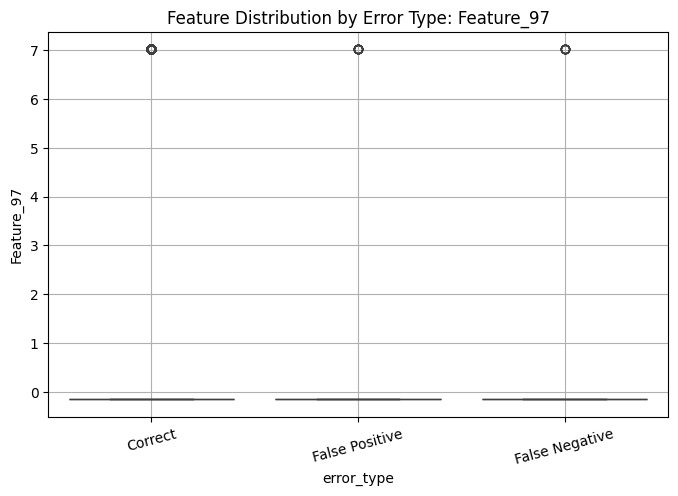

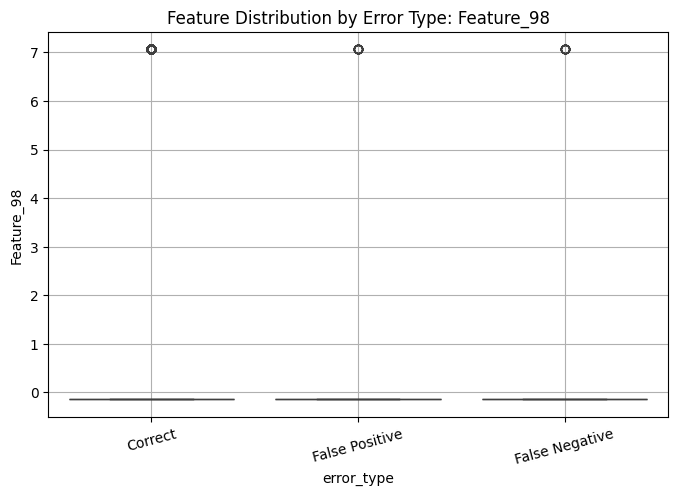

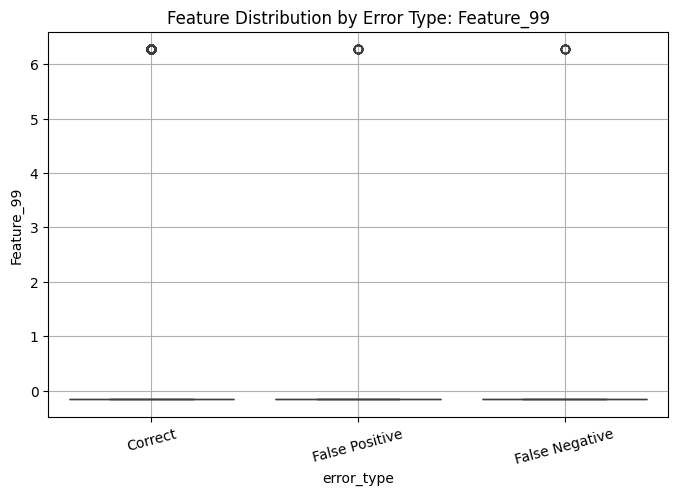

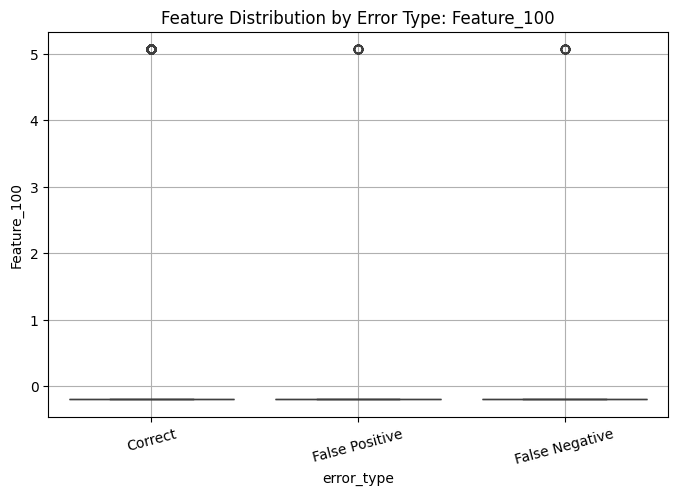

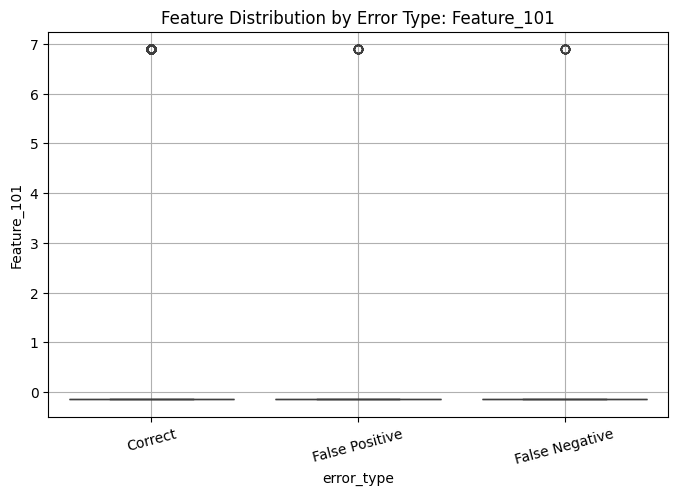

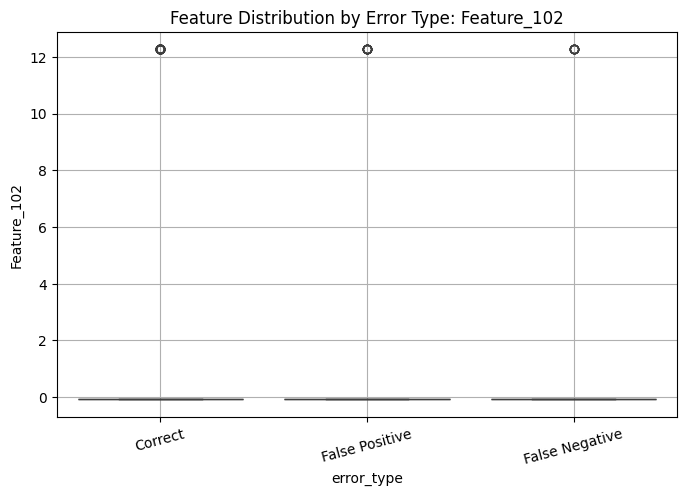

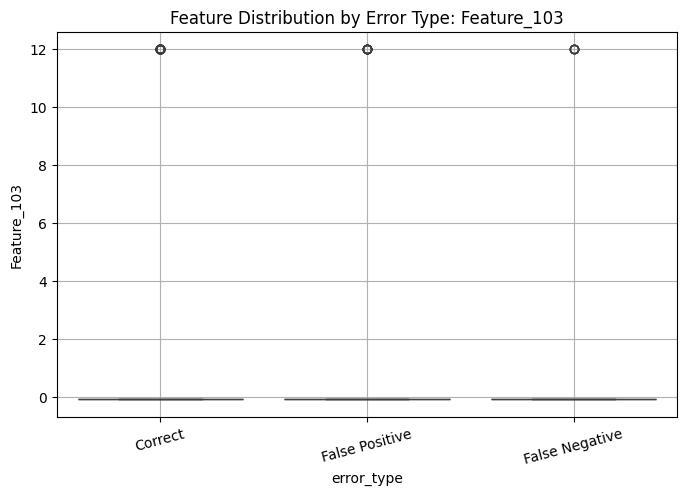

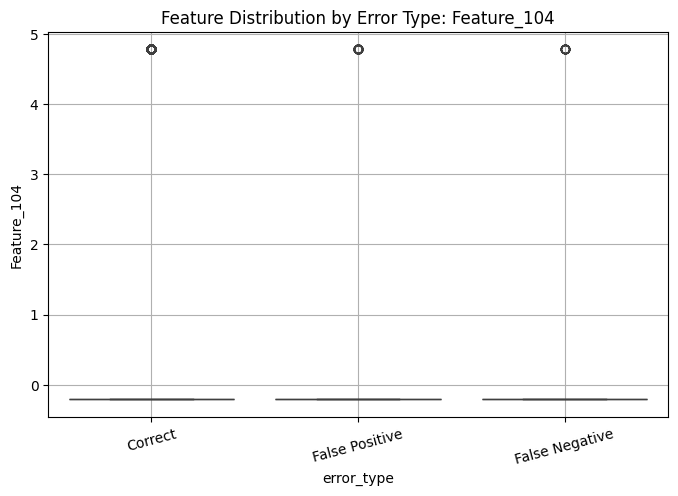

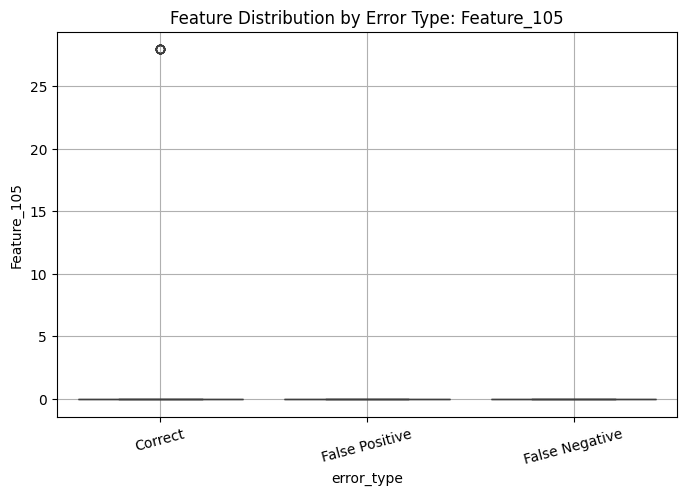

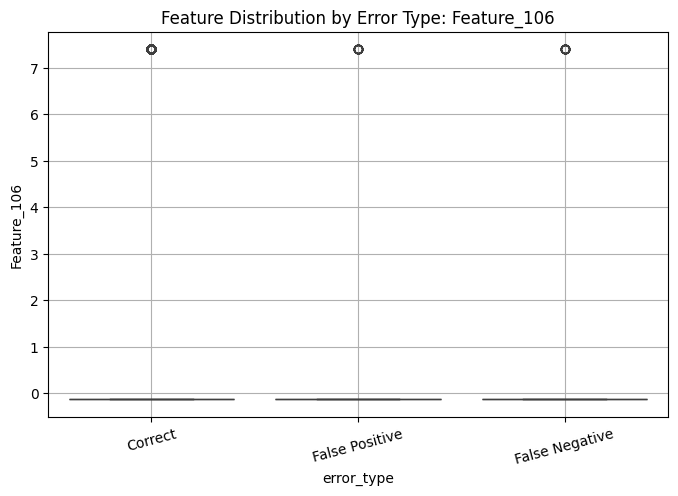

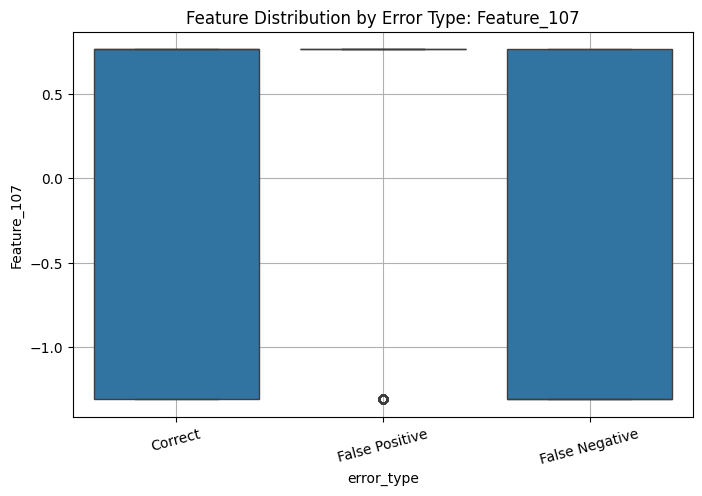

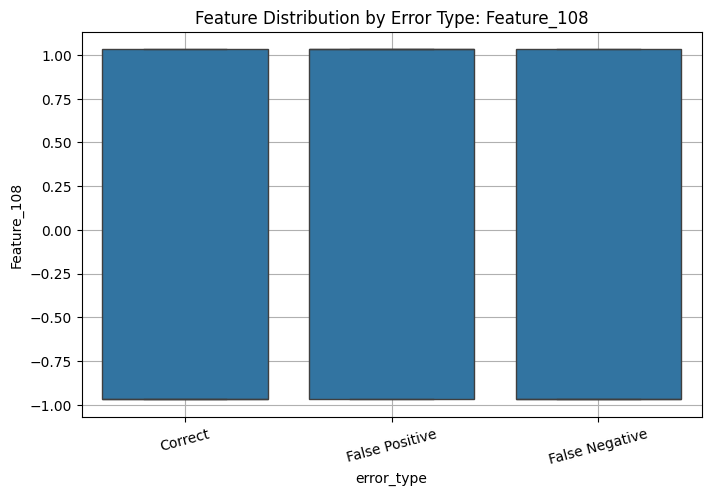

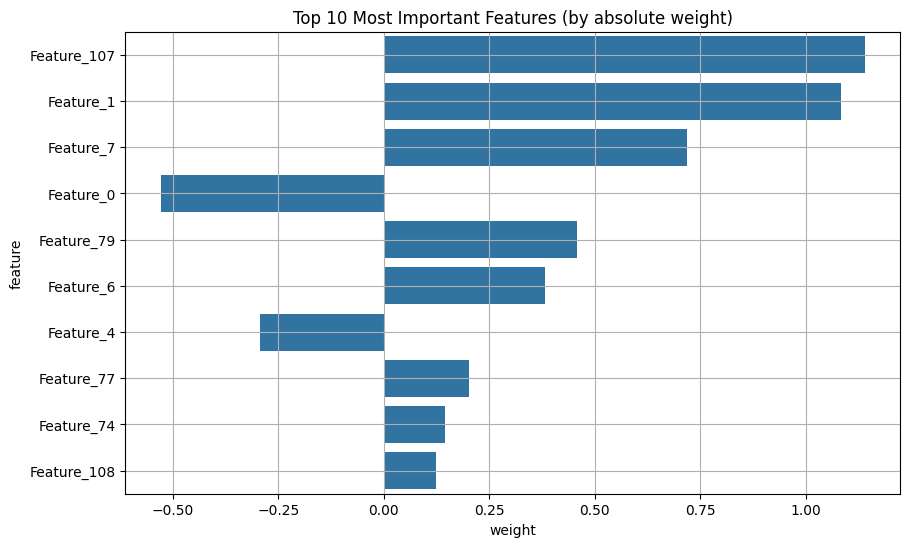

In [ ]:
# Part 1: 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if isinstance(X_test, pd.DataFrame):
    feature_names = X_test.columns
else:
    feature_names = [f"Feature_{i}" for i in range(X_test.shape[1])]


df_test = pd.DataFrame(X_test, columns=feature_names)  
df_test["actual"] = y_test
df_test["pred"] = best_model.predict(X_test)
df_test["proba"] = best_model.predict_proba(X_test)[:, list(best_model.classes_).index(1)]


for col in feature_names:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_test, x="actual", y=col)
    plt.title(f"Feature Distribution by Actual Class: {col}")
    plt.xlabel("Actual Class (0=Not Depressed, 1=Depressed)")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


for col in feature_names:
    plt.figure(figsize=(8,5))
    sns.violinplot(data=df_test, x="actual", y=col, inner="quart")
    plt.title(f"Violin Plot: {col}")
    plt.show()

# Part 2
df_test["error_type"] = "Correct"
df_test.loc[(df_test.actual == 0) & (df_test.pred == 1), "error_type"] = "False Positive"
df_test.loc[(df_test.actual == 1) & (df_test.pred == 0), "error_type"] = "False Negative"


df_test["error_type"].value_counts()


for col in feature_names:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_test, x="error_type", y=col)
    plt.title(f"Feature Distribution by Error Type: {col}")
    plt.xticks(rotation=15)
    plt.grid(True)
    plt.show()

# Part 3
coef = best_model.coef_[0]

coef_df = pd.DataFrame({
    "feature": feature_names,
    "weight": coef,
    "abs_weight": np.abs(coef)
}).sort_values("abs_weight", ascending=False)

coef_df.head(10)

# Plot Top 10 Features by Absolute Weight
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df.head(10), x="weight", y="feature")
plt.title("Top 10 Most Important Features (by absolute weight)")
plt.grid(True)
plt.show()
